# Emcee Testing

## Simple Lorentzian No Background - Works Great

In [56]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import emcee

import emtk.curves.lorentzian as lor


nsig = 10000
nbg = 5000
nbins = 50

xrange = np.array([0.001, 0.1])

clength = 90.0 # correlation length in system
kappa = 1.0 / clength
true_kappa = kappa
curv = lor.LorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])

curv.generate_test_samples(pvalues, xrange, nsig)

#sig_dist = sp.stats.halfcauchy
#signal = sig_dist.rvs(scale=kappa, loc=0.0, size=nsig)

bg = np.random.uniform(xrange[0], xrange[1], nbg)

events = curv.data
#events = np.concatenate((curv.data, bg))


[0.0001]
Generated 10000 samples using parameters [0.01111111]


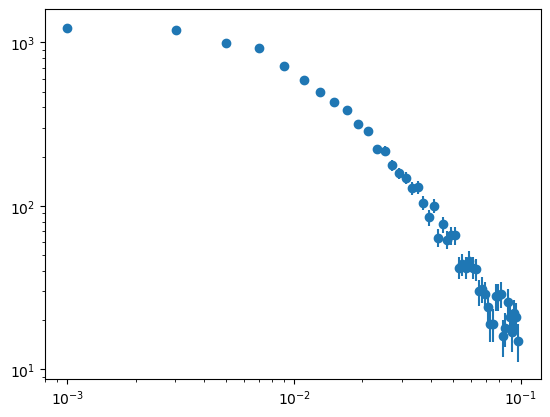

In [57]:
qmin = np.amin(events)
qmax = np.amax(events)
bins = np.linspace(qmin, qmax, nbins)
hst = np.histogram(events, bins=bins)
xvals = hst[1]
xvals = xvals[:-1]
yvals = hst[0]
evals = np.sqrt(yvals)

plt.errorbar(xvals, yvals, yerr=evals, ls='None', marker='o')
plt.yscale('log')
plt.xscale('log')

In [58]:
def log_prior(theta):
    # The main role of this function is to set 
    # parameter bounds of the bayesian search space
    kappa = theta
    
    lolim = 0.001
    hilim = 0.1
    
    if lolim < kappa < hilim:
        return 0.0
    
    return -np.inf

def pmf(xvals, theta):
    
    kappa = np.asarray(theta)
    
    result = curv.curve(kappa, dat=xvals)    
    return result


def log_likelihood(theta):
    kappa = np.asarray(theta)
    
    
    lp = log_prior(theta)
    
    if np.isinf(lp):
        return -np.inf
    
    ll = curv.llcurve(kappa)
    
    result = lp + ll
    
    if np.isnan(result):
        print("NaN result for theta, prior", theta, lp)
    
    return result


p0 = np.array([0.02])


print(log_likelihood(p0))

21800.994005432134


In [59]:
ndim, nwalkers = 1, 32

p0 = np.array(0.02)

p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location.
state = sampler.run_mcmc(p0, 100)

# Run the production chain.
sampler.reset()
sampler.run_mcmc(state, 2000, progress=True);

100%|██████████████████████████████████████████| 2000/2000 [00:04<00:00, 491.88it/s]


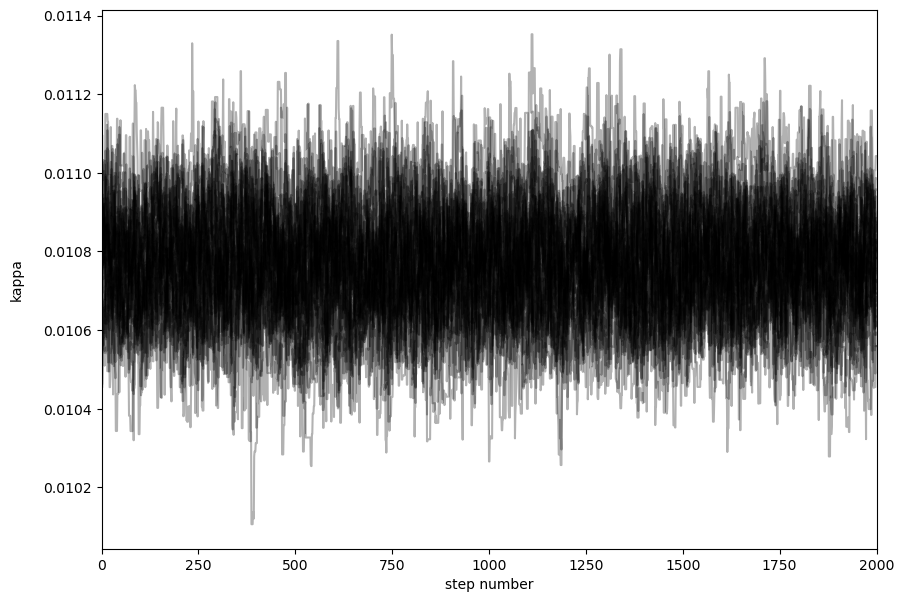

In [31]:
fig, ax = plt.subplots(1, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa"]
ax.plot(samples[:, :, 0], "k", alpha=0.3)
ax.set_xlim(0, len(samples))
ax.set_ylabel(labels[0])
ax.yaxis.set_label_coords(-0.1, 0.5)

ax.set_xlabel("step number");

Acceptance fraction 0.809390625


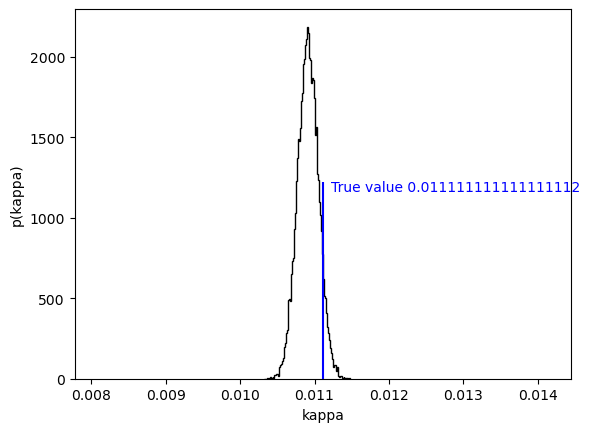

In [60]:
samples=sampler.get_chain(flat=True)

labeltxt = "True value " + str(true_kappa)

ytop = np.amax(hst[0])

hst=plt.hist(samples[:,0], 100, color='k', histtype="step")
plt.xlabel("kappa")
plt.ylabel("p(kappa)")
plt.vlines(true_kappa, 0, ytop, color='blue')
plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(true_kappa*1.01, ytop*0.95, labeltxt, color="blue")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction))

Text(0.5, 0, 'Q (Å-1)')

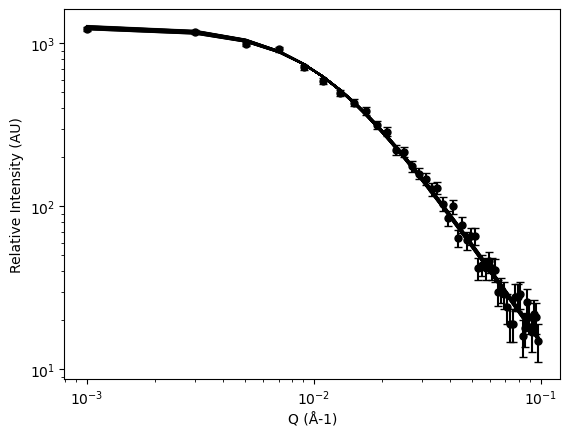

In [61]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=100)

pt_sum = np.sum(yvals)

fig, ax = plt.subplots()
for ind in inds:
    sample = flat_samples[ind]
    yplot = pmf(xvals, sample)
    ysum = np.sum(yplot)
    scale = pt_sum / ysum
    yplot = yplot * scale
    plt.plot(xvals, yplot, color='black', alpha = 0.4 )# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

plt.errorbar(xvals, yvals, yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')

## Lorentzian With Flat Background - DONE!

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import emcee

import emtk.curves.lorentzian as lor


nsig = 10000
nbg = 10000

ratio = float(nbg) / float(nsig)
nbins = 50

xrange = np.array([0.001, 0.1])

clength = 90.0 # correlation length in system
kappa = 1.0 / clength
true_kappa = kappa
curv = lor.LorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])

curv.generate_test_samples(pvalues, xrange, nsig)

curv.generate_background(xrange, ratio = ratio)

true_frac = ratio

events = curv.data

study_data = events

Loading ESS event mode toolkit (emtk)
Loading curves
Loading omega functions
[0.0001]
Generated 10000 samples using parameters [0.01111111]
Adding flat background of 10000.0 points


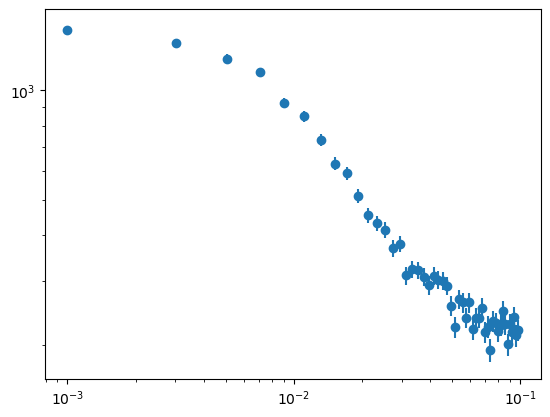

In [2]:
xmin = np.amin(events)
xmax = np.amax(events)
bins = np.linspace(xmin, xmax, nbins)
hst = np.histogram(events, bins=bins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)

plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o')
plt.yscale('log')
plt.xscale('log')

In [3]:
def log_prior(theta):
    # The main role of this function is to set 
    # parameter bounds of the bayesian search space
    kappa, logQ = theta
    
    lolim = 0.001
    hilim = 0.1
    
    if lolim < kappa < hilim and -4.0 < logQ < 1.0:# and 0.1 < sigma < 3.0:
        return 0.0
    
    return -np.inf

def bg_integral(xmin, xmax):
    # Returns the integral over the range of x values
    
    # Assume y=1 over the range
    return xmax-xmin

def cauchy_integral(xmin, xmax, kappa):
    # Returns the integral over the range of x values
    t1 = np.arctan(xmax/kappa)
    t2 = np.arctan(xmin/kappa)
    
    return (t1 - t2)/np.pi

def get_weights(xvals, theta):
    # Figure out the color weight of the point based on its *signal* likelihood
    kappa, logQ = theta
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    #bg_y = 10.0**logQ
    bgQ = 10.0**logQ
    sigQ = 1.0-bgQ
    
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals * sigQ) / bgQ
    
    #yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    
    # if yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    # then signal / weight = bg_y/bg_int + yvals/sig_int
    # which is why that looks like it fits, because it's exactly the
    # function used to generate the data
    # The background term is so small it doesn't matter (I tried taking it out)
    # This is the wrong weighting function even though it seems right
    
#   This is an extreme cut test to see if other functions are working properly
#    mask = xvals > 4.0E-02
#    yweight = np.ones_like(xvals)   
#    yweight[mask] = 0.0
    
    
    return yweight

def get_color(xvals, theta):
    # Figure out the color of the point based on its signal likelihood
    kappa, logQ = theta
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    Q = 10.0**logQ
     
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals/sig_int) / (1.0/bg_int + yvals/sig_int)
    
    color_r = np.full_like(yweight, 1.0)
    color_g = yweight
    color_b = 1.0-yweight
    
    color = np.stack((color_r, color_g, color_b), axis=1)
    
    print("yvals", yvals)
    print("Q", Q)
    print("yweight", yweight)
    
    return color
    

def pmf(xx, theta, verbose=False):
    gaus = sp.stats.norm
    
    kappa, logQ = theta
    
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)


    bgQ = 10.0**logQ
    sigQ = 1.0-bgQ
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=xx) / sig_int
    background = bgQ / bg_int
        
    term1 = signal # / yweight
    term2 = background  # / (1.0 - yweight) #* (1.0 - yweight) # ) * gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    if verbose:
        print("term 1:", term1)
        print("term 2:", term2)
    
    result = term1 + term2
    
    return result

def log_gaussian(sigma):
    xvals = curv.data
    gaus = sp.stats.norm
    
    gvals = gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    log_gvals = np.log(gvals)
    
    slog_gvals = np.sum(log_gvals)
    
    return slog_gvals
    

def log_likelihood(theta, testing=False):
    kappa, logQ = theta
    
    if testing:
        verbose=True
        study_data = x_hist
    else:
        verbose=False
        study_data = events
    
    lp = log_prior(theta)
    
    if np.isinf(lp):
        return -np.inf
    
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)


    bgQ = 10.0**logQ
    sigQ = 1.0-bgQ
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=study_data) / sig_int
    background = bgQ / bg_int
    

    #weights = (sig_Q/sig_int) / (bgQ/bg_int + sig_Q/sig_int)

    weights = get_weights(study_data, theta)
            
    inv_weights = 1.0/weights   
    
    bg_weights = 1.0 - weights
    
    inv_bg_weights = 1.0/bg_weights
    
    log_weights = np.log(weights)
    log_bg_weights = np.log(bg_weights) 
    ll = np.log(signal)
    lbg = np.log(background)
    
    weighted_ll = ll #+ log_weights
    weighted_lbg = lbg #+ log_bg_weights#*0.3 #* (1.0-weights)
    
    weighted_ll_sum = np.sum( np.logaddexp(weighted_ll, weighted_lbg))
    
    #ll = curv.llcurve(np.array([kappa]))
    #if np.isnan(ll):
    #    print("NaN result for theta, prior", theta, lp)

    # bg in this case is a wide gaussian, if it's wide enough it's flat
    # also, Q=0 is zero background (never happens because logQ is of course 
    # on a log scale
    ##lbg = logQ + log_gaussian(sigma)
    
    result = lp + weighted_ll_sum#, arg1, lbg
    
    if np.isnan(result):
        verbose=True
    
    if verbose:
        print("bg_int", bg_int)
        print("sig_int", sig_int)
    
        print("xvals", study_data)
        print("xrange", xmin, xmax)
    
        print("signal", signal)
        print("bgQ", background)
        
        print("weights", weights)
        print("bg_weights", 1.0-weights)
        
        print("inv weights", inv_weights)
        print("inv bg weights", inv_bg_weights)
        
        print("sig / wt", signal/weights)
        print("bg / bgwt", background/(1.0-weights))
        
        print("weighted ll", weighted_ll)
        print("weighted lbg", weighted_lbg)
    
    return result


p0 = np.array([0.01, -0.5])

print(cauchy_integral(xmin, xmax, 0.01))

p_correct_fit = np.array([0.01111, -0.001])

#pmf(xvals, p_wrong_fit, verbose=True)

print(log_likelihood(p_correct_fit, testing=True))


0.43654349330306796
bg_int 0.09899065508307518
sig_int 0.4362009121166676
xvals [0.00100008 0.0030203  0.00504052 0.00706073 0.00908095 0.01110117
 0.01312139 0.0151416  0.01716182 0.01918204 0.02120226 0.02322247
 0.02524269 0.02726291 0.02928313 0.03130334 0.03332356 0.03534378
 0.037364   0.03938421 0.04140443 0.04342465 0.04544486 0.04746508
 0.0494853  0.05150552 0.05352573 0.05554595 0.05756617 0.05958639
 0.0616066  0.06362682 0.06564704 0.06766726 0.06968747 0.07170769
 0.07372791 0.07574813 0.07776834 0.07978856 0.08180878 0.083829
 0.08584921 0.08786943 0.08988965 0.09190987 0.09393008 0.0959503
 0.09797052]
xrange 0.0010000809739575932 0.09999073605703278
signal [0.14985126 0.14066938 0.12527862 0.10760434 0.090562   0.07559282
 0.063079   0.05286736 0.0446127  0.03794666 0.03254342 0.02813626
 0.02451447 0.02151421 0.01900876 0.01690003 0.0151118  0.01358453
 0.01227136 0.01113514 0.01014623 0.00928079 0.00851949 0.00784657
 0.0072491  0.00671637 0.00623949 0.00581103 0.005

In [4]:
ndim, nwalkers = 2, 32

p0 = np.array([0.02, -0.5])

p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location.
state = sampler.run_mcmc(p0, 100)

# Run the production chain.
sampler.reset()
sampler.run_mcmc(state, 200, progress=True);

/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_1592/2150101808.py:163: RuntimeWarning: invalid value encountered in log
  log_bg_weights = np.log(bg_weights)
100%|█████████████████████████████████████████| 200/200 [00:15<00:00, 13.11it/s]


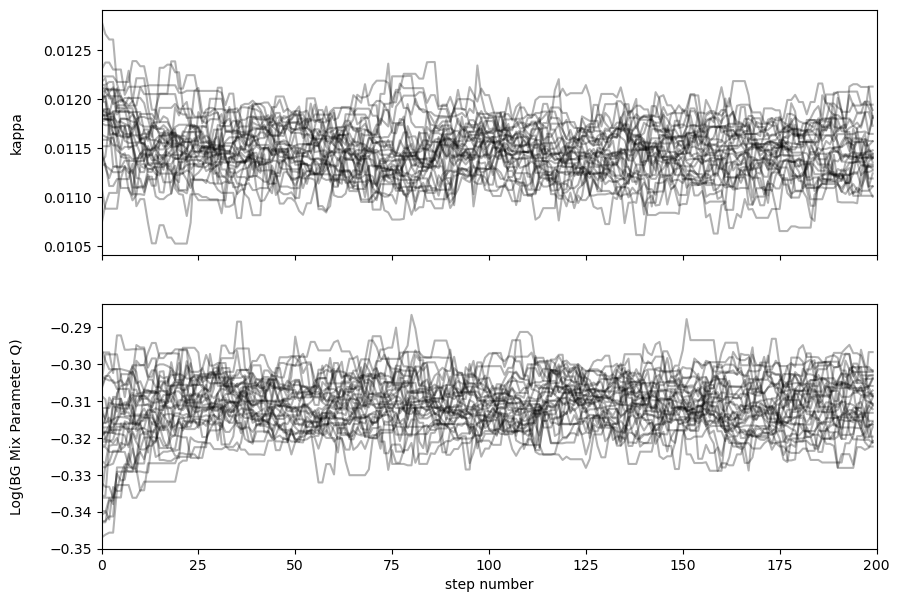

In [5]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa", "Log(BG Mix Parameter Q)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

Text(0.5, 0, 'Q (Å-1)')

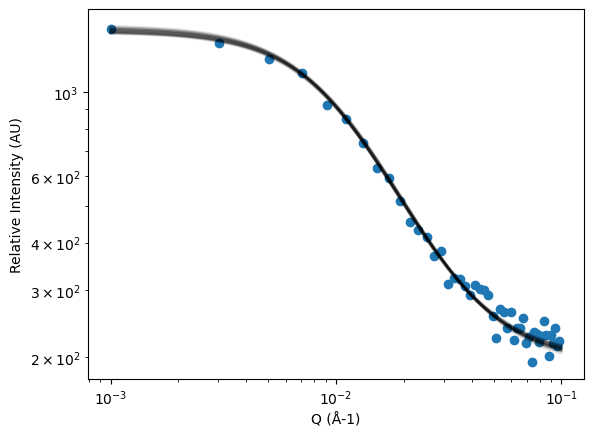

In [6]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(y_hist)

xfit_min = np.min(x_hist)
xfit_max = np.max(x_hist)
x_fit = np.linspace(xmin, xmax, 1000)

fig, ax = plt.subplots()
for ind in inds:
    sample = flat_samples[ind]
    y_fit = pmf(x_fit, sample)
    y_check = pmf(x_hist, sample)
    ysum = np.sum(y_check)
    scale = pt_sum / ysum
    y_fit = y_fit * scale
    plt.plot(x_fit, y_fit, color='black', alpha = 0.1)# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
sct=plt.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
#cbar = fig.colorbar(sct)
#cbar.ax.set_ylabel('Point Signal Weight')


Acceptance fraction 0.72390625 (should be high)
kappa estimate       : 0.011486675505473238  (true value = 0.011111111111111112 )
kappa std.dev.       : 0.0002858806680996972


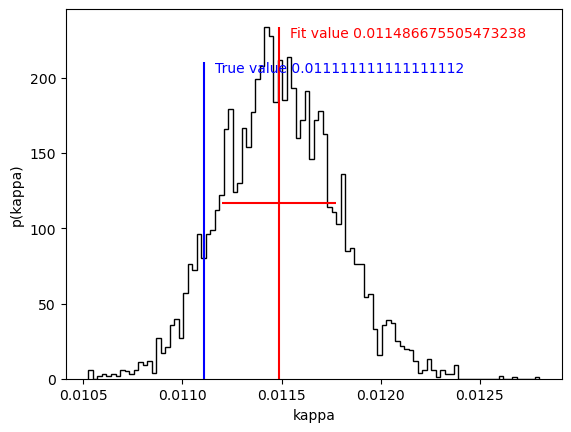

In [7]:
samples=sampler.get_chain(flat=True)

kappa_mean = np.mean(samples[:,0])
kappa_stddev = np.std(samples[:,0])

barmin = kappa_mean - kappa_stddev
barmax = kappa_mean + kappa_stddev

mix_mean = np.mean(samples[:,1])
mix_stddev= np.std(samples[:,1])

bg_fraction = 10.0**mix_mean


truetxt = "True value " + str(true_kappa)
fittxt = "Fit value " + str(kappa_mean)

hst=plt.hist(samples[:,0], 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("kappa")
plt.ylabel("p(kappa)")
plt.vlines(true_kappa, 0, ytop*0.9, color='blue')
plt.vlines(kappa_mean, 0, ytop, color="red")
plt.hlines(y=ytop*0.5, xmin=barmin, xmax=barmax, color="red")
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(true_kappa*1.005, ytop*0.87, truetxt, color="blue")
plt.text(kappa_mean*1.005, ytop*0.97, fittxt, color="red")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be high)")

print("kappa estimate       :", kappa_mean, " (true value =", true_kappa,")")
print("kappa std.dev.       :", kappa_stddev)

Background fraction    : 0.4885947473397355 (true value = 0.5 )
Background frac std.dev: 0.008305937156910878
Acceptance fraction 0.72390625 (should be high)


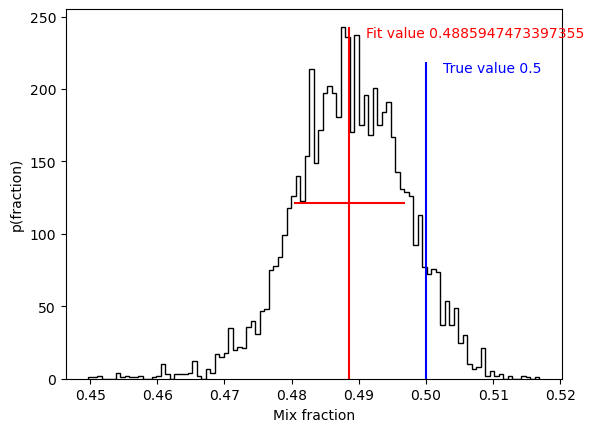

In [8]:
frac = 10.0**mix_mean
frac_stddev = frac * np.log(10.0)*mix_stddev

print("Background fraction    :", frac, "(true value =", nbg/(nbg+nsig), ")")
print("Background frac std.dev:", frac_stddev)

frac_samples = 10.0**samples[:,1]

barmin = frac - frac_stddev
barmax = frac + frac_stddev

tru_frac = nbg / (nsig+nbg)

truetxt = "True value " + str(tru_frac)
fittxt = "Fit value " + str(frac)

hst=plt.hist(frac_samples, 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("Mix fraction")
plt.ylabel("p(fraction)")
plt.vlines(tru_frac, 0, ytop*0.9, color='blue')
plt.vlines(frac, 0, ytop, color="red")
plt.hlines(y=ytop*0.5, xmin=barmin, xmax=barmax, color="red")
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(tru_frac*1.005, ytop*0.87, truetxt, color="blue")
plt.text(frac*1.005, ytop*0.97, fittxt, color="red")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be high)")



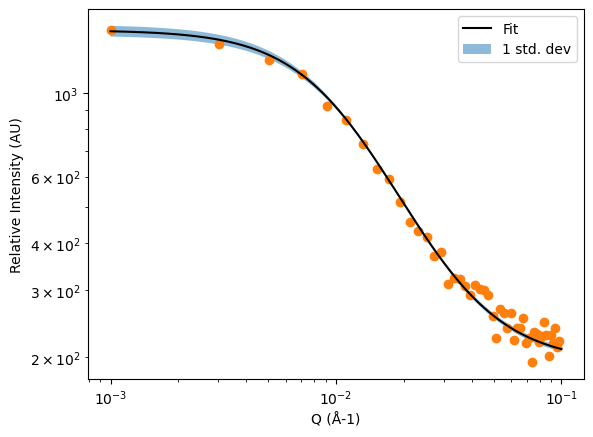

In [9]:

def perms(x_pts, means, devs):
    p1 = np.copy(means)
    p2 = np.copy(means)
    p3 = np.copy(means)
    
    p4 = np.copy(means)
    
    p5 = np.copy(means)
    p6 = np.copy(means)
    p7 = np.copy(means)
    
    p1 = p1 - devs
    p2[0] = p2[0] - devs[0]
    p3[1] = p3[1] - devs[1]
    
    p5[0] = p5[0] + devs[0]
    p6[1] = p6[1] + devs[1]
    p7 = p7 + devs
    
    y1 = pmf(x_pts, p1)
    y2 = pmf(x_pts, p2)
    y3 = pmf(x_pts, p3)
    y4 = pmf(x_pts, p4)
    y5 = pmf(x_pts, p5)
    y6 = pmf(x_pts, p6)
    y7 = pmf(x_pts, p7)
    
    arrays = np.array([y1, y2, y3, y4, y5, y6, y7])
    
    top = np.copy(y1)
    bot = np.copy(y1)
    
    
    for p in range(0, y1.size):
            top[p] = np.amax(arrays[:,p])
            bot[p] = np.amin(arrays[:,p])
    
    return top, bot
    
    

mean_pars = np.array([kappa_mean, mix_mean])
stddevs = np.array([kappa_stddev, mix_stddev])




flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(y_hist)

xfit_min = np.min(x_hist)
xfit_max = np.max(x_hist)
x_fit = np.linspace(xmin, xmax, 1000)

band_top, band_bottom = perms(x_fit, mean_pars, stddevs)


fig, ax = plt.subplots()


y_fit = pmf(x_fit, mean_pars)
y_check = pmf(x_hist, mean_pars)
ysum = np.sum(y_check)
scale = pt_sum / ysum
y_fit = y_fit * scale

band_bottom = band_bottom * scale
band_top = band_top * scale

plt.plot(x_fit, y_fit, color='black', label = "Fit")
plt.fill_between(x_fit, band_bottom, band_top, alpha=0.5, label="1 std. dev")


#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
sct=plt.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
plt.legend()
#cbar = fig.colorbar(sct)
#cbar.ax.set_ylabel('Point Signal Weight')

## Same Again with Beta-Distribution Weighting Hyperparameter

In [37]:
def log_prior(theta):
    # The main role of this function is to set 
    # parameter bounds of the bayesian search space
    kappa, alpha, beta = theta
    
    lolim = 0.001
    hilim = 0.1
    
    if lolim < kappa < hilim and 1.0 <= alpha <= 5.0 and 1.0 <= beta <= 5.0:# and 0.1 < sigma < 3.0:
        return 0.0
    
    return -np.inf

def bg_integral(xmin, xmax):
    # Returns the integral over the range of x values
    
    # Assume y=1 over the range
    return xmax-xmin

def cauchy_integral(xmin, xmax, kappa):
    # Returns the integral over the range of x values
    t1 = np.arctan(xmax/kappa)
    t2 = np.arctan(xmin/kappa)
    
    return (t1 - t2)/np.pi

def get_weights(xvals, theta):
    # Figure out the color weight of the point based on its *signal* likelihood
    kappa, alpha, beta = theta
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    # Mode of beta distribution
    Q = (alpha - 1.0) / (alpha + beta - 2.0)
    
    #bg_y = 10.0**logQ
    bgQ = Q
    sigQ = 1.0-bgQ
    
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals * sigQ) / bgQ
    
    #yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    
    # if yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    # then signal / weight = bg_y/bg_int + yvals/sig_int
    # which is why that looks like it fits, because it's exactly the
    # function used to generate the data
    # The background term is so small it doesn't matter (I tried taking it out)
    # This is the wrong weighting function even though it seems right
    
#   This is an extreme cut test to see if other functions are working properly
#    mask = xvals > 4.0E-02
#    yweight = np.ones_like(xvals)   
#    yweight[mask] = 0.0
    
    
    return yweight

def get_color(xvals, theta):
    # Figure out the color of the point based on its signal likelihood
    kappa, logQ = theta
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    Q = 10.0**logQ
     
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals/sig_int) / (1.0/bg_int + yvals/sig_int)
    
    color_r = np.full_like(yweight, 1.0)
    color_g = yweight
    color_b = 1.0-yweight
    
    color = np.stack((color_r, color_g, color_b), axis=1)
    
    print("yvals", yvals)
    print("Q", Q)
    print("yweight", yweight)
    
    return color
    

def pmf(xx, theta, verbose=False):
    gaus = sp.stats.norm
    
    kappa, alpha, beta = theta
    
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)


    # Mode of beta distribution
    Q = (alpha - 1.0) / (alpha + beta - 2.0)
    
    #bg_y = 10.0**logQ
    bgQ = Q
    sigQ = 1.0-bgQ
    
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=xx) / sig_int
    background = bgQ / bg_int
        
    term1 = signal # / yweight
    term2 = background  # / (1.0 - yweight) #* (1.0 - yweight) # ) * gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    if verbose:
        print("term 1:", term1)
        print("term 2:", term2)
    
    result = term1 + term2
    
    return result

def log_gaussian(sigma):
    xvals = curv.data
    gaus = sp.stats.norm
    
    gvals = gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    log_gvals = np.log(gvals)
    
    slog_gvals = np.sum(log_gvals)
    
    return slog_gvals
    

def log_likelihood(theta, testing=False):
    kappa, alpha, beta = theta
    
    if testing:
        verbose=True
        study_data = x_hist
    else:
        verbose=False
        study_data = events
    
    lp = log_prior(theta)
    
    if np.isinf(lp):
        return -np.inf
    
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)

    # Mode of beta distribution
    Q = (alpha - 1.0) / (alpha + beta - 2.0)
    
    #bg_y = 10.0**logQ
    bgQ = Q
    sigQ = 1.0-bgQ
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=study_data) / sig_int
    background = bgQ / bg_int
    

    #weights = (sig_Q/sig_int) / (bgQ/bg_int + sig_Q/sig_int)

    weights = get_weights(study_data, theta)
            
    inv_weights = 1.0/weights   
    
    bg_weights = 1.0 - weights
    
    inv_bg_weights = 1.0/bg_weights
    
    log_weights = np.log(weights)
    log_bg_weights = np.log(bg_weights) 
    ll = np.log(signal)
    lbg = np.log(background)
    
    weighted_ll = ll #+ log_weights
    weighted_lbg = lbg #+ log_bg_weights#*0.3 #* (1.0-weights)
    
    weighted_ll_sum = np.sum( np.logaddexp(weighted_ll, weighted_lbg))
    
    #ll = curv.llcurve(np.array([kappa]))
    #if np.isnan(ll):
    #    print("NaN result for theta, prior", theta, lp)

    # bg in this case is a wide gaussian, if it's wide enough it's flat
    # also, Q=0 is zero background (never happens because logQ is of course 
    # on a log scale
    ##lbg = logQ + log_gaussian(sigma)
    
    result = lp + weighted_ll_sum#, arg1, lbg
    
    if np.isnan(result):
        verbose=True
    
    if verbose:
        print("kappa", kappa)
        print("alpha", alpha)
        print("beta", beta)
        print("alpha-1", alpha-1.0)
        print("alpha + beta - 2", alpha + beta - 2.0)
        print("sigQ", sigQ)
        print("bgQ", bgQ)
        print("bg_int", bg_int)
        print("sig_int", sig_int)
    
        print("xvals", study_data)
        print("xrange", xmin, xmax)
    
        print("signal", signal)
        print("bgQ", background)
        
        print("weights", weights)
        print("bg_weights", 1.0-weights)
        
        print("inv weights", inv_weights)
        print("inv bg weights", inv_bg_weights)
        
        print("sig / wt", signal/weights)
        print("bg / bgwt", background/(1.0-weights))
        
        print("weighted ll", weighted_ll)
        print("weighted lbg", weighted_lbg)
    
    return result


p0 = np.array([0.01, 2.0, 2.0])

print(cauchy_integral(xmin, xmax, 0.01))

p_correct_fit = np.array([0.01111, 2.0 ,2.0])

#pmf(xvals, p_wrong_fit, verbose=True)

print(log_likelihood(p_correct_fit, testing=True))


0.4365459858741066
kappa 0.01111
alpha 2.0
beta 2.0
alpha-1 1.0
alpha + beta - 2 2.0
sigQ 0.5
bgQ 0.5
bg_int 0.09899415181725156
sig_int 0.4362033847372798
xvals [0.00100004 0.00302033 0.00504061 0.0070609  0.00908119 0.01110148
 0.01312177 0.01514206 0.01716235 0.01918264 0.02120292 0.02322321
 0.0252435  0.02726379 0.02928408 0.03130437 0.03332466 0.03534495
 0.03736524 0.03938552 0.04140581 0.0434261  0.04544639 0.04746668
 0.04948697 0.05150726 0.05352755 0.05554783 0.05756812 0.05958841
 0.0616087  0.06362899 0.06564928 0.06766957 0.06968986 0.07171014
 0.07373043 0.07575072 0.07777101 0.0797913  0.08181159 0.08383188
 0.08585217 0.08787246 0.08989274 0.09191303 0.09393332 0.09595361
 0.0979739 ]
xrange 0.001000036411281329 0.09999418822853288
signal [32.57710402 30.58093784 27.23490216 23.3924411  19.68740671 16.43312193
 13.71266084 11.49270958  9.69820756  8.24907109  7.07446312  6.11639598
  5.32906317  4.67684648  4.13219523  3.6737865   3.28505281  2.95304709
  2.66758279  2

/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_1715/1680127029.py:174: RuntimeWarning: invalid value encountered in log
  log_bg_weights = np.log(bg_weights)


In [38]:
ndim, nwalkers = 3, 32

#p0 = np.array([0.02, -0.5])

p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location.
state = sampler.run_mcmc(p0, 100)

# Run the production chain.
sampler.reset()
sampler.run_mcmc(state, 500, progress=True);

/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_1715/1680127029.py:174: RuntimeWarning: invalid value encountered in log
  log_bg_weights = np.log(bg_weights)
100%|█████████████████████████████████████████| 500/500 [00:21<00:00, 23.71it/s]


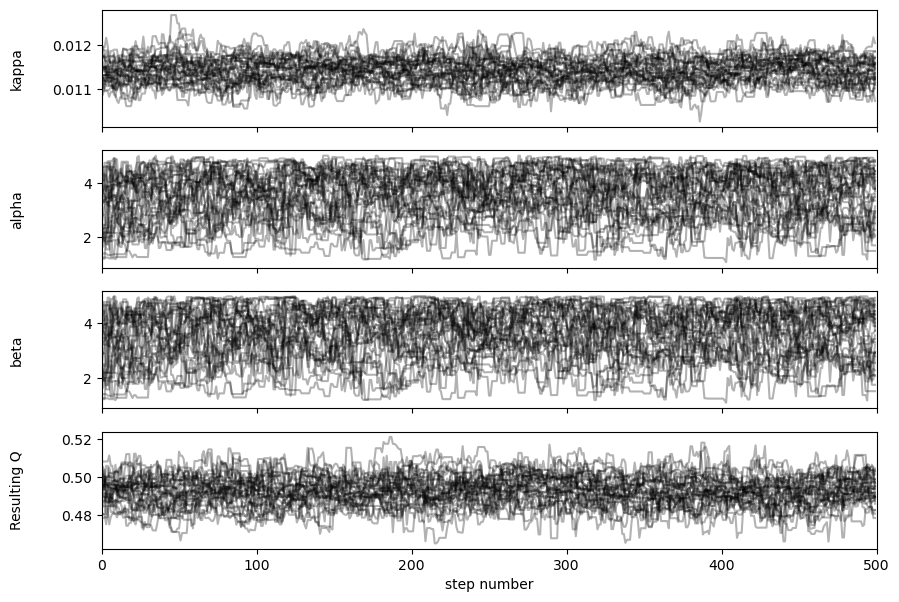

In [39]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa", "alpha", "beta", "Resulting Q"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

ax = axes[3]

alphas=samples[:,:,1]
betas=samples[:,:,2]

qs = (alphas - 1.0) / (alphas + betas - 2.0)

ax.plot(qs, "k", alpha=0.3)
ax.set_ylabel(labels[3])
ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number");

Text(0.5, 0, 'Q (Å-1)')

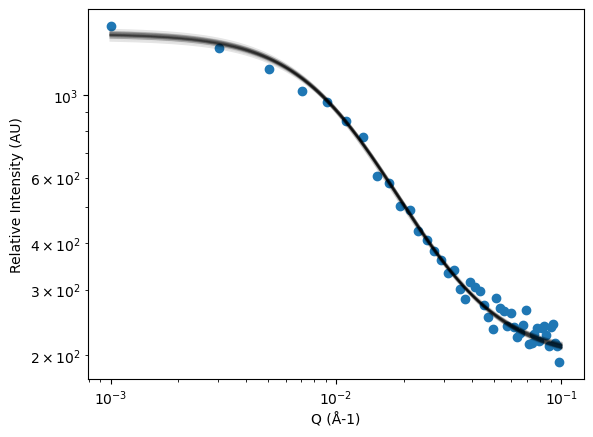

In [40]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(y_hist)

xfit_min = np.min(x_hist)
xfit_max = np.max(x_hist)
x_fit = np.linspace(xmin, xmax, 1000)

fig, ax = plt.subplots()
for ind in inds:
    sample = flat_samples[ind]
    y_fit = pmf(x_fit, sample)
    y_check = pmf(x_hist, sample)
    ysum = np.sum(y_check)
    scale = pt_sum / ysum
    y_fit = y_fit * scale
    plt.plot(x_fit, y_fit, color='black', alpha = 0.1)# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
sct=plt.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
#cbar = fig.colorbar(sct)
#cbar.ax.set_ylabel('Point Signal Weight')

Acceptance fraction 0.6034999999999999 (should be high)
kappa estimate       : 0.011401957171257516  (true value = 0.011111111111111112 )
kappa std.dev.       : 0.0002696487531339724


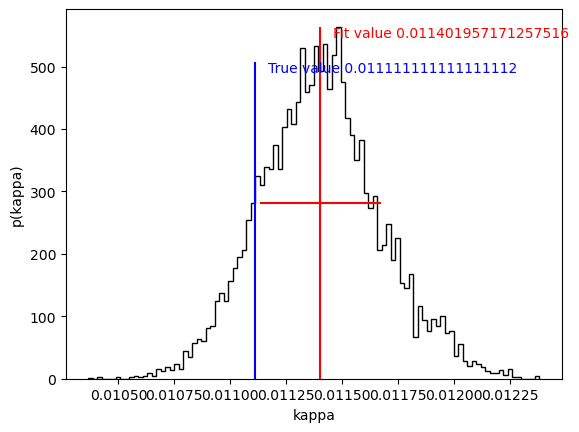

In [31]:
samples=sampler.get_chain(flat=True)

kappa_mean = np.mean(samples[:,0])
kappa_stddev = np.std(samples[:,0])

barmin = kappa_mean - kappa_stddev
barmax = kappa_mean + kappa_stddev

bg_fraction = 10.0**mix_mean


truetxt = "True value " + str(true_kappa)
fittxt = "Fit value " + str(kappa_mean)

hst=plt.hist(samples[:,0], 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("kappa")
plt.ylabel("p(kappa)")
plt.vlines(true_kappa, 0, ytop*0.9, color='blue')
plt.vlines(kappa_mean, 0, ytop, color="red")
plt.hlines(y=ytop*0.5, xmin=barmin, xmax=barmax, color="red")
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(true_kappa*1.005, ytop*0.87, truetxt, color="blue")
plt.text(kappa_mean*1.005, ytop*0.97, fittxt, color="red")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be high)")

print("kappa estimate       :", kappa_mean, " (true value =", true_kappa,")")
print("kappa std.dev.       :", kappa_stddev)

Background level    : 0.49292096884298703 (true value = 0.5 )
Background level std.dev: 0.007334964610395713
Acceptance fraction 0.6034999999999999 (should be high)


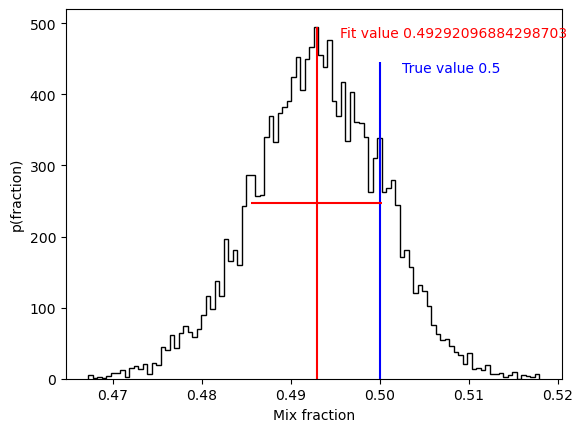

In [35]:
alphas = samples[:,1]
betas = samples[:,2]

qs = (alphas - 1.0) / (alphas + betas - 2.0)


q_mean = np.mean(qs)
q_std_dev = np.std(qs)

print("Background level    :", q_mean, "(true value =", nbg/(nbg+nsig), ")")
print("Background level std.dev:", q_std_dev)

barmin = q_mean - q_std_dev
barmax = q_mean + q_std_dev

truetxt = "True value 0.5"
fittxt = "Fit value " + str(q_mean)

hst=plt.hist(qs, 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("Mix fraction")
plt.ylabel("p(fraction)")
plt.vlines(0.5, 0, ytop*0.9, color='blue')
plt.vlines(q_mean, 0, ytop, color="red")
plt.hlines(y=ytop*0.5, xmin=barmin, xmax=barmax, color="red")
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(0.5*1.005, ytop*0.87, truetxt, color="blue")
plt.text(frac*1.005, ytop*0.97, fittxt, color="red")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be high)")

## Same Again Using Dirichlet Distribution (General Case) 

In [90]:
def log_prior(theta):
    # The main role of this function is to set 
    # parameter bounds of the bayesian search space
    kappa, a1, a2 = theta
    
    alpha = np.array([a1, a2])
    
    lolim = 0.001
    hilim = 0.1
    
    if lolim < kappa < hilim and\
    np.all(1.0 < alpha) and\
    np.all(alpha < 5.0):
        return 0.0
    
    return -np.inf

def bg_integral(xmin, xmax):
    # Returns the integral over the range of x values
    
    # Assume y=1 over the range
    return xmax-xmin

def cauchy_integral(xmin, xmax, kappa):
    # Returns the integral over the range of x values
    t1 = np.arctan(xmax/kappa)
    t2 = np.arctan(xmin/kappa)
    
    return (t1 - t2)/np.pi

def get_weights(xvals, theta):
    # Figure out the color weight of the point based on its *signal* likelihood
    kappa, a1, a2 = theta
    
    alpha = np.array([a1, a2])
    K = 2
    
    alpha0 = np.sum(alpha)
    x_mode = (alpha - 1.0) / (alpha0 - K)
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    
    #bg_y = 10.0**logQ
    bgQ = x_mode[0]
    sigQ = x_mode[1]
    
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals * sigQ) / bgQ
    
    #yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    
    # if yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    # then signal / weight = bg_y/bg_int + yvals/sig_int
    # which is why that looks like it fits, because it's exactly the
    # function used to generate the data
    # The background term is so small it doesn't matter (I tried taking it out)
    # This is the wrong weighting function even though it seems right
    
#   This is an extreme cut test to see if other functions are working properly
#    mask = xvals > 4.0E-02
#    yweight = np.ones_like(xvals)   
#    yweight[mask] = 0.0
    
    
    return yweight

def get_color(xvals, theta):
    # Figure out the color of the point based on its signal likelihood
    kappa, logQ = theta
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    Q = 10.0**logQ
     
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals/sig_int) / (1.0/bg_int + yvals/sig_int)
    
    color_r = np.full_like(yweight, 1.0)
    color_g = yweight
    color_b = 1.0-yweight
    
    color = np.stack((color_r, color_g, color_b), axis=1)
    
    print("yvals", yvals)
    print("Q", Q)
    print("yweight", yweight)
    
    return color
    

def pmf(xx, theta, verbose=False):
    gaus = sp.stats.norm
    
    kappa, a1, a2 = theta
    
    alpha = np.array([a1, a2])
    K = 2
    
    alpha0 = np.sum(alpha)
    x_mode = (alpha - 1.0) / (alpha0 - K)
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)

    
    #bg_y = 10.0**logQ
    bgQ = x_mode[0]
    sigQ = x_mode[1]
    
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=xx) / sig_int
    background = bgQ / bg_int
        
    term1 = signal # / yweight
    term2 = background  # / (1.0 - yweight) #* (1.0 - yweight) # ) * gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    if verbose:
        print("term 1:", term1)
        print("term 2:", term2)
    
    result = term1 + term2
    
    return result

def log_gaussian(sigma):
    xvals = curv.data
    gaus = sp.stats.norm
    
    gvals = gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    log_gvals = np.log(gvals)
    
    slog_gvals = np.sum(log_gvals)
    
    return slog_gvals
    

def log_likelihood(theta, testing=False):
    kappa, a1, a2 = theta
    
    alpha = np.array([a1, a2])
    K = 2
    
    alpha0 = np.sum(alpha)
    x_mode = (alpha - 1.0) / (alpha0 - K)
    
    if testing:
        verbose=True
        study_data = x_hist
    else:
        verbose=False
        study_data = events
    
    lp = log_prior(theta)
    
    if np.isinf(lp):
        return -np.inf
    
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)

    
    #bg_y = 10.0**logQ
    bgQ = x_mode[0]
    sigQ = x_mode[1]
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=study_data) / sig_int
    background = bgQ / bg_int
    

    #weights = (sig_Q/sig_int) / (bgQ/bg_int + sig_Q/sig_int)

    weights = get_weights(study_data, theta)
            
    inv_weights = 1.0/weights   
    
    bg_weights = 1.0 - weights
    
    inv_bg_weights = 1.0/bg_weights
    
    log_weights = np.log(weights)
    log_bg_weights = np.log(bg_weights) 
    ll = np.log(signal)
    lbg = np.log(background)
    
    weighted_ll = ll #+ log_weights
    weighted_lbg = lbg #+ log_bg_weights#*0.3 #* (1.0-weights)
    
    weighted_ll_sum = np.sum( np.logaddexp(weighted_ll, weighted_lbg))
    
    #ll = curv.llcurve(np.array([kappa]))
    #if np.isnan(ll):
    #    print("NaN result for theta, prior", theta, lp)

    # bg in this case is a wide gaussian, if it's wide enough it's flat
    # also, Q=0 is zero background (never happens because logQ is of course 
    # on a log scale
    ##lbg = logQ + log_gaussian(sigma)
    
    result = lp + weighted_ll_sum#, arg1, lbg
    
    if np.isnan(result):
        verbose=True
    
    if verbose:
        print("kappa", kappa)
        print("alpha", alpha)
        print("sigQ", sigQ)
        print("bgQ", bgQ)
        print("bg_int", bg_int)
        print("sig_int", sig_int)
    
        print("xvals", study_data)
        print("xrange", xmin, xmax)
    
        print("signal", signal)
        print("bgQ", background)
        
        print("weights", weights)
        print("bg_weights", 1.0-weights)
        
        print("inv weights", inv_weights)
        print("inv bg weights", inv_bg_weights)
        
        print("sig / wt", signal/weights)
        print("bg / bgwt", background/(1.0-weights))
        
        print("weighted ll", weighted_ll)
        print("weighted lbg", weighted_lbg)
    
    return result


p0 = np.array([0.01, 2.0, 2.0])

print(cauchy_integral(xmin, xmax, 0.01))

p_correct_fit = np.array([0.01111, 2.0 ,2.0])

#pmf(xvals, p_wrong_fit, verbose=True)

print(log_likelihood(p_correct_fit, testing=True))


0.4365414923383469
kappa 0.01111
alpha [2. 2.]
sigQ 0.5
bgQ 0.5
bg_int 0.09897959887709501
sig_int 0.4361983843289776
xvals [0.00100003 0.00302003 0.00504002 0.00706001 0.00908    0.01109999
 0.01311998 0.01513998 0.01715997 0.01917996 0.02119995 0.02321994
 0.02523994 0.02725993 0.02927992 0.03129991 0.0333199  0.03533989
 0.03735989 0.03937988 0.04139987 0.04341986 0.04543985 0.04745985
 0.04947984 0.05149983 0.05351982 0.05553981 0.0575598  0.0595798
 0.06159979 0.06361978 0.06563977 0.06765976 0.06967976 0.07169975
 0.07371974 0.07573973 0.07775972 0.07977971 0.08179971 0.0838197
 0.08583969 0.08785968 0.08987967 0.09189967 0.09391966 0.09593965
 0.09795964]
xrange 0.0010000333942449834 0.09997963227133999
signal [32.57747905 30.5817065  27.23631566 23.39441358 19.68970084 16.43551144
 13.71499126 11.49489604  9.70021369  8.25088933  7.07610102  6.11786801
  5.33038614  4.67803718  4.13326933  3.6747581   3.28593433  2.95384937
  2.66831523  2.4212577   2.2062303   2.01804802  1.85

/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_1715/706524700.py:188: RuntimeWarning: invalid value encountered in log
  log_bg_weights = np.log(bg_weights)


In [91]:
ndim, nwalkers = 3, 32

#p0 = np.array([0.02, -0.5])

p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location.
state = sampler.run_mcmc(p0, 100)

# Run the production chain.
sampler.reset()
sampler.run_mcmc(state, 500, progress=True);

/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_1715/706524700.py:188: RuntimeWarning: invalid value encountered in log
  log_bg_weights = np.log(bg_weights)
100%|█████████████████████████████████████████████| 500/500 [00:10<00:00, 48.96it/s]


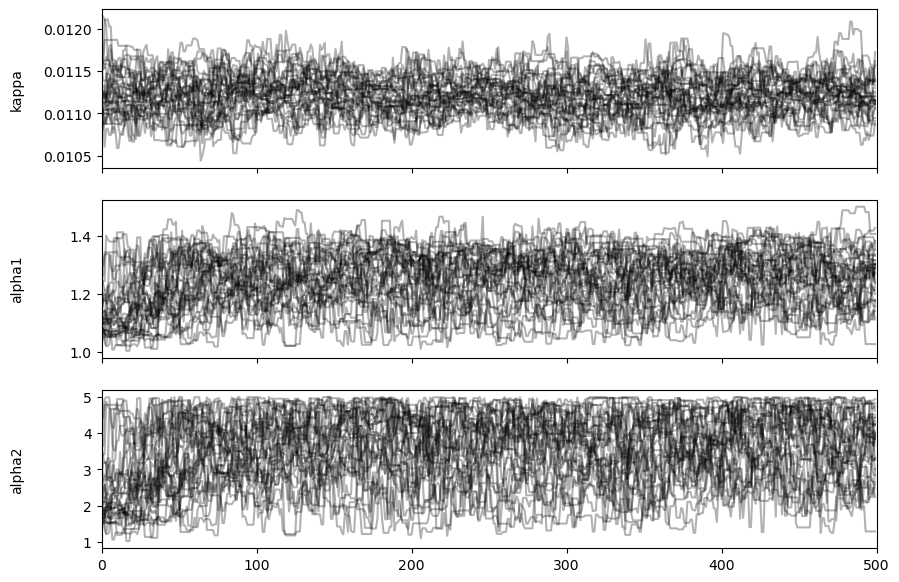

In [92]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa", "alpha1", "alpha2"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


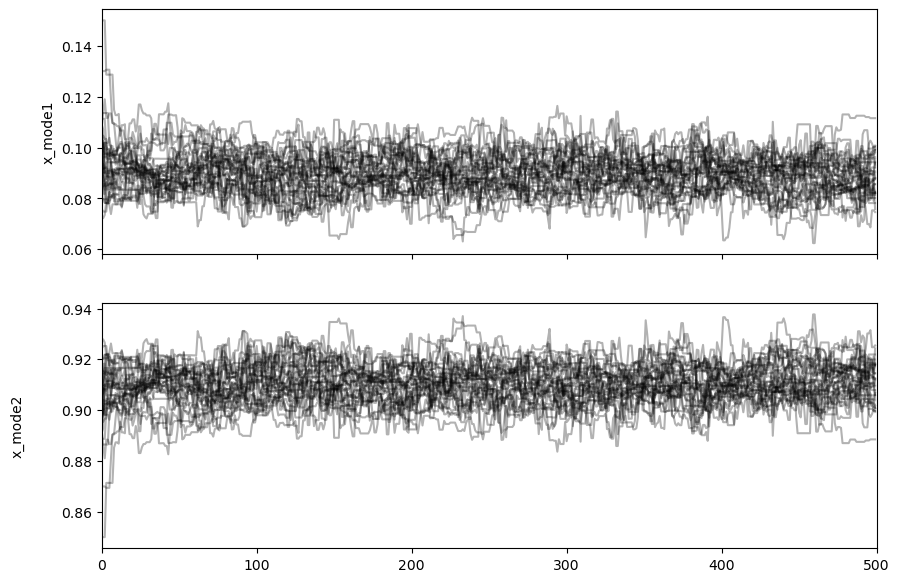

In [93]:
a1=samples[:, :, 1]
a2=samples[:, :, 2]

alpha0 = a1 + a2

x_mode0 = (a1 - 1.0)/(alpha0 - 2.0)
x_mode1 = (a2 - 1.0)/(alpha0 - 2.0)


fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["x_mode1", "x_mode2"]
ax = axes[0]
ax.plot(x_mode0, "k", alpha=0.3)
ax.set_xlim(0, len(x_mode0))
ax.set_ylabel(labels[0])

ax = axes[1]
ax.plot(x_mode1, "k", alpha=0.3)
ax.set_xlim(0, len(x_mode1))
ax.set_ylabel(labels[1])
ax.yaxis.set_label_coords(-0.1, 0.5)



Text(0.5, 0, 'Q (Å-1)')

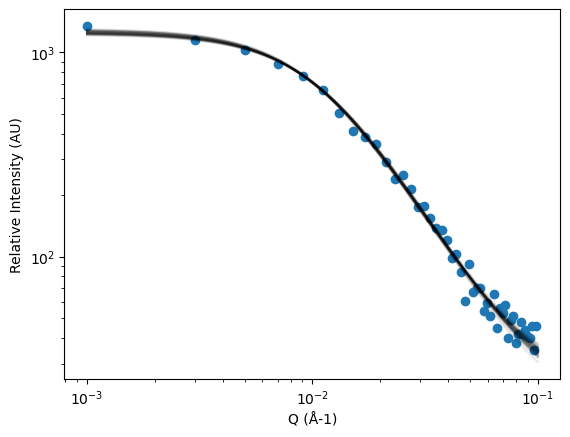

In [94]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(y_hist)

xfit_min = np.min(x_hist)
xfit_max = np.max(x_hist)
x_fit = np.linspace(xmin, xmax, 1000)

fig, ax = plt.subplots()
for ind in inds:
    sample = flat_samples[ind]
    y_fit = pmf(x_fit, sample)
    y_check = pmf(x_hist, sample)
    ysum = np.sum(y_check)
    scale = pt_sum / ysum
    y_fit = y_fit * scale
    plt.plot(x_fit, y_fit, color='black', alpha = 0.1)# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
sct=plt.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
#cbar = fig.colorbar(sct)
#cbar.ax.set_ylabel('Point Signal Weight')

Acceptance fraction 0.5943125 (should be high)
kappa estimate       : 0.01121647613126825  (true value = 0.011111111111111112 )
kappa std.dev.       : 0.00022857911481776093


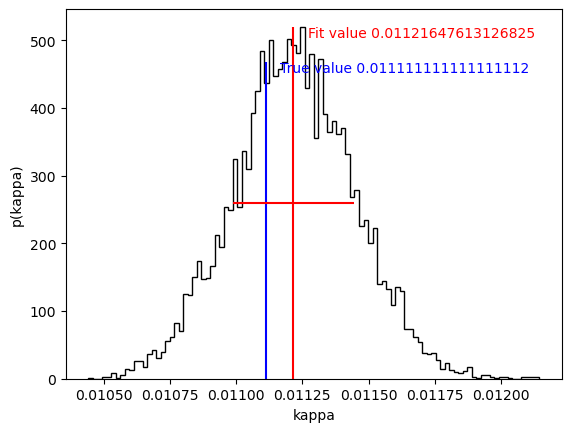

In [95]:
samples=sampler.get_chain(flat=True)

kappa_mean = np.mean(samples[:,0])
kappa_stddev = np.std(samples[:,0])

barmin = kappa_mean - kappa_stddev
barmax = kappa_mean + kappa_stddev

bg_fraction = 10.0**mix_mean


truetxt = "True value " + str(true_kappa)
fittxt = "Fit value " + str(kappa_mean)

hst=plt.hist(samples[:,0], 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("kappa")
plt.ylabel("p(kappa)")
plt.vlines(true_kappa, 0, ytop*0.9, color='blue')
plt.vlines(kappa_mean, 0, ytop, color="red")
plt.hlines(y=ytop*0.5, xmin=barmin, xmax=barmax, color="red")
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(true_kappa*1.005, ytop*0.87, truetxt, color="blue")
plt.text(kappa_mean*1.005, ytop*0.97, fittxt, color="red")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be high)")

print("kappa estimate       :", kappa_mean, " (true value =", true_kappa,")")
print("kappa std.dev.       :", kappa_stddev)

## Dirichlet Mixing of Lorentzian with Porod (Systematic) Background

In [126]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import emcee

import emtk.curves.lorentzian as lor


class Porod:
    # Slightly modified so that alpha is actually the power of the pdf
    # This kind of follows the same modification as the wikipedia page on power laws

    def pdf(self, x, xmin, alpha):
        return ((alpha-1.0) / xmin) * (x/xmin)**(-alpha)
    
    def cdf(self, x, xmin, alpha):
        return 1.0 - (x/xmin)**(1.0-alpha)
    
    def quantile(self, p, xmin, alpha):
        return xmin * (1.0-p)**(1.0 / (1.0-alpha))
    
    def rvs(self, xmin, alpha, size=1):
        flat = np.random.uniform(size=size)
        return self.quantile(flat, xmin, alpha)


nsig = 20000
nbg = 2000

ratio = float(nbg) / float(nsig)
nbins = 50

xmin=0.001
xmax=0.01
xrange = np.array([xmin, xmax])


clength = 90.0 # correlation length in system
kappa = 1.0 / clength
true_kappa = kappa
curv = lor.LorentzianCurve()
pvalues = np.array([kappa])

curv.generate_test_samples(pvalues, xrange, nsig)

porodobj = Porod()

porod_alpha = 4.0
bg = porod.rvs(xmin=xrange[0], alpha=porod_alpha, size=nbg)#porod.rvs(xmin=0.001, alpha=porod_alpha, size=nbg)

events = curv.data

events = np.concatenate((events, bg))

np.random.shuffle(events)

#curv.plot_fit()

study_data = events

print("cdf check: integrate up to max Q")
print(porodobj.cdf(x=0.1, xmin=0.001, alpha=porod_alpha))

print("Quantile check:")
qt = porodobj.quantile(p=0.5, xmin=0.001, alpha=porod_alpha)
print(qt)
cf = porodobj.cdf(x=qt, xmin=0.001, alpha=porod_alpha)
print(cf, "vs 0.5")

[0.0001]
Generated 20000 samples using parameters [0.01111111]
cdf check: integrate up to max Q
0.999999
Quantile check:
0.0012599210498948732
0.5 vs 0.5


0.9988861809986067


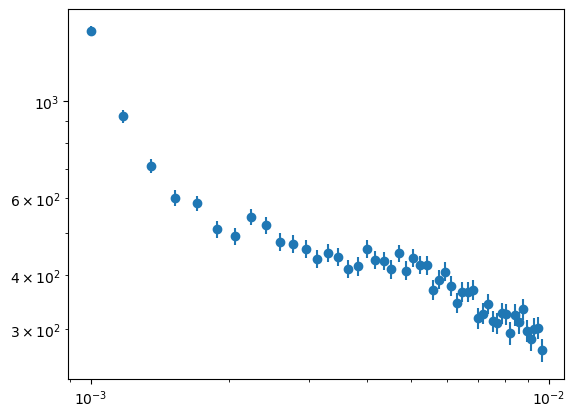

In [127]:
xmin = np.amin(study_data)

slic=(xmax-xmin)/(nbins+1)

hbins = np.arange(xmin, xmax, slic)


hst = np.histogram(study_data, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)

y_line = porodobj.pdf(x_hist, xmin=0.001, alpha=porod_alpha)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
y_int = porodobj.cdf(x=np.amax(x_hist), xmin=0.001, alpha=porod_alpha)
print(y_int)

yscale = y_hist[0] / y_line[0]

y_line = y_line * yscale


plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o')
#plt.plot(x_hist, y_line)
plt.yscale('log')
plt.xscale('log')




In [123]:
def log_prior(theta):
    # The main role of this function is to set 
    # parameter bounds of the bayesian search space
    kappa, a1, a2 = theta
    
    alpha = np.array([a1, a2])
    
    lolim = 0.001
    hilim = 0.1
    
    if lolim < kappa < hilim and\
    np.all(1.0 < alpha) and\
    np.all(alpha < 10.0):
        return 0.0
    
    return -np.inf

def porod_integral(xmin, xmax, alpha):\
    return 1.0 - (xmin / xmax)**(alpha-1.0)
    
def porod_pmf(xvals, alpha, xmin=None):
    xvals = np.asarray(xvals)

    if xmin==None:
        xmin = np.amin(xvals)

    return ((alpha-1.0)/xmin) * ((xvals/xmin) ** (-alpha))


def bg_integral(xmin, xmax):
    # Returns the integral over the range of x values
    
    # Assume y=1 over the range
    return xmax-xmin

def cauchy_integral(xmin, xmax, kappa):
    # Returns the integral over the range of x values
    t1 = np.arctan(xmax/kappa)
    t2 = np.arctan(xmin/kappa)
    
    return (t1 - t2)/np.pi

def get_weights(xvals, theta):
    # Figure out the color weight of the point based on its *signal* likelihood
    kappa, a1, a2 = theta
    
    xmin = np.amin(xvals)
    
    alpha = np.array([a1, a2])
    K = 2
    
    alpha0 = np.sum(alpha)
    x_mode = (alpha - 1.0) / (alpha0 - K)
    
    bg_int = porodobj.pdf(xmax, xmin=xmin, alpha=porod_alpha)#porod_integral(xmin, xmax, porod_alpha)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    
    #bg_y = 10.0**logQ
    bgQ = x_mode[0]
    sigQ = x_mode[1]
    
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    porodweight = porodobj.pdf(xvals, xmin=xmin, alpha=porod_alpha)#porod_pmf(xvals, xmin=xmin, alpha = porod_alpha)
    
    yweight = (yvals * sigQ) / (porodweight * bgQ)
    
    #yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    
    # if yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    # then signal / weight = bg_y/bg_int + yvals/sig_int
    # which is why that looks like it fits, because it's exactly the
    # function used to generate the data
    # The background term is so small it doesn't matter (I tried taking it out)
    # This is the wrong weighting function even though it seems right
    
#   This is an extreme cut test to see if other functions are working properly
#    mask = xvals > 4.0E-02
#    yweight = np.ones_like(xvals)   
#    yweight[mask] = 0.0
    
    
    return yweight

def get_color(xvals, theta):
    # Figure out the color of the point based on its signal likelihood
    kappa, logQ = theta
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    Q = 10.0**logQ
     
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals/sig_int) / (1.0/bg_int + yvals/sig_int)
    
    color_r = np.full_like(yweight, 1.0)
    color_g = yweight
    color_b = 1.0-yweight
    
    color = np.stack((color_r, color_g, color_b), axis=1)
    
    print("yvals", yvals)
    print("Q", Q)
    print("yweight", yweight)
    
    return color
    

def pmf(xx, theta, verbose=False):
    gaus = sp.stats.norm
    
    kappa, a1, a2 = theta
    
    alpha = np.array([a1, a2])
    K = 2
    
    alpha0 = np.sum(alpha)
    x_mode = (alpha - 1.0) / (alpha0 - K)
    
    bg_int = porodobj.cdf(xmax, xmin=xmin, alpha=porod_alpha)#porod_integral(xmin, xmax, 4.0)    
    sig_int = cauchy_integral(xmin, xmax, kappa)

    
    #bg_y = 10.0**logQ
    bgQ = x_mode[0]
    sigQ = x_mode[1]
    
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=xx) / sig_int
    background = bgQ * porodobj.pdf(xx, xmin=xmin, alpha=porod_alpha)#porod_pmf(xvals=xx, xmin=xmin, alpha=porod_alpha)
    
    term1 = signal # / yweight
    term2 = background  # / (1.0 - yweight) #* (1.0 - yweight) # ) * gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    if verbose:
        print("term 1:", term1)
        print("term 2:", term2)
    
    result = term1 + term2
    
    return result

def log_gaussian(sigma):
    xvals = curv.data
    gaus = sp.stats.norm
    
    gvals = gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    log_gvals = np.log(gvals)
    
    slog_gvals = np.sum(log_gvals)
    
    return slog_gvals
    

def log_likelihood(theta, testing=False):
    kappa, a1, a2 = theta
    
    alpha = np.array([a1, a2])
    K = 2
    
    alpha0 = np.sum(alpha)
    x_mode = (alpha - 1.0) / (alpha0 - K)
    
    if testing:
        verbose=True
        study_data = x_hist
    else:
        verbose=False
        study_data = events
    
    lp = log_prior(theta)
    
    if np.isinf(lp):
        return -np.inf
    
    
    bg_int = porod.cdf(xmax, xmin=xmin, alpha=porod_alpha)#porod_integral(xmin, xmax, porod_alpha)    
    sig_int = cauchy_integral(xmin, xmax, kappa)

    
    #bg_y = 10.0**logQ
    bgQ = x_mode[0]
    sigQ = x_mode[1]
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=study_data) / sig_int
    background = bgQ * porod.pdf(study_data, xmin=xmin, alpha=porod_alpha)#porod_pmf(xvals=study_data, xmin=xmin, alpha = porod_alpha)

    #weights = (sig_Q/sig_int) / (bgQ/bg_int + sig_Q/sig_int)

    weights = get_weights(study_data, theta)
            
    inv_weights = 1.0/weights   
    
    bg_weights = 1.0 - weights
    
    inv_bg_weights = 1.0/bg_weights
    
    log_weights = np.log(weights)
    log_bg_weights = np.log(bg_weights) 
    ll = np.log(signal)
    lbg = np.log(background)
    
    weighted_ll = ll #+ log_weights
    weighted_lbg = lbg #+ log_bg_weights#*0.3 #* (1.0-weights)
    
    weighted_ll_sum = np.sum( np.logaddexp(weighted_ll, weighted_lbg))
    
    #ll = curv.llcurve(np.array([kappa]))
    #if np.isnan(ll):
    #    print("NaN result for theta, prior", theta, lp)

    # bg in this case is a wide gaussian, if it's wide enough it's flat
    # also, Q=0 is zero background (never happens because logQ is of course 
    # on a log scale
    ##lbg = logQ + log_gaussian(sigma)
    
    result = lp + weighted_ll_sum#, arg1, lbg
    
    if np.isnan(result):
        verbose=True
    
    if verbose:
        print("kappa", kappa)
        print("alpha", alpha)
        print("sigQ", sigQ)
        print("bgQ", bgQ)
        print("bg_int", bg_int)
        print("sig_int", sig_int)
    
        print("xvals", study_data)
        print("xrange", xmin, xmax)
    
        print("signal", signal)
        print("bgQ", background)
        
        print("weights", weights)
        print("bg_weights", 1.0-weights)
        
        print("inv weights", inv_weights)
        print("inv bg weights", inv_bg_weights)
        
        print("sig / wt", signal/weights)
        print("bg / bgwt", background/(1.0-weights))
        
        print("weighted ll", weighted_ll)
        print("weighted lbg", weighted_lbg)
    
    return result


p0 = np.array([0.01, 2.0, 10.0])

print(cauchy_integral(xmin, xmax, 0.01))

p_correct_fit = np.array([0.01111, 2.0 ,2.0])

#pmf(xvals, p_wrong_fit, verbose=True)

print(log_likelihood(p_correct_fit, testing=True))


0.2182716284791064
kappa 0.01111
alpha [2. 2.]
sigQ 0.5
bgQ 0.5
bg_int 0.9998999637708339
sig_int 0.20470179004202835
xvals [0.00100009 0.00117656 0.00135303 0.0015295  0.00170597 0.00188243
 0.0020589  0.00223537 0.00241184 0.00258831 0.00276478 0.00294125
 0.00311772 0.00329419 0.00347065 0.00364712 0.00382359 0.00400006
 0.00417653 0.004353   0.00452947 0.00470594 0.0048824  0.00505887
 0.00523534 0.00541181 0.00558828 0.00576475 0.00594122 0.00611769
 0.00629415 0.00647062 0.00664709 0.00682356 0.00700003 0.0071765
 0.00735297 0.00752944 0.00770591 0.00788237 0.00805884 0.00823531
 0.00841178 0.00858825 0.00876472 0.00894119 0.00911766 0.00929412
 0.00947059 0.00964706]
xrange 0.0010000905606125765 0.01
signal [69.41918128 69.20555021 68.95892552 68.68002492 68.36965071 68.02868418
 67.65807956 67.25885754 66.83209862 66.37893617 65.9005494  65.39815624
 64.87300633 64.32637395 63.75955129 63.17384173 62.57055354 61.95099377
 61.31646257 60.66824781 60.00762014 59.33582841 58.65409

/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_2902/8863499.py:203: RuntimeWarning: invalid value encountered in log
  log_bg_weights = np.log(bg_weights)


[1450.          986.52122358  768.70226956  654.89606517  590.16842504
  550.59306999  524.76725901  506.85154369  493.67482117  483.42930223
  475.0416757   467.85260702  461.44535643  455.5502482   449.98944825
  444.64400004  439.43357524  434.30371079  429.21757493  424.15054136
  419.08654381  414.01558269  408.9319916   403.83321375  398.71892621
  393.5904052   388.45006077  383.30109218  378.14723052  372.99254508
  367.84129693  362.69782781  357.56647578  352.45151138  347.35708942
  342.28721321  337.24570833  332.23620404  327.26212064  322.32666176
  317.43281035  312.58332779  307.78075541  303.02741795  298.3254285
  293.6766947   289.08292573  284.54564008  280.06617371  275.64568864]
0.9988858040200141


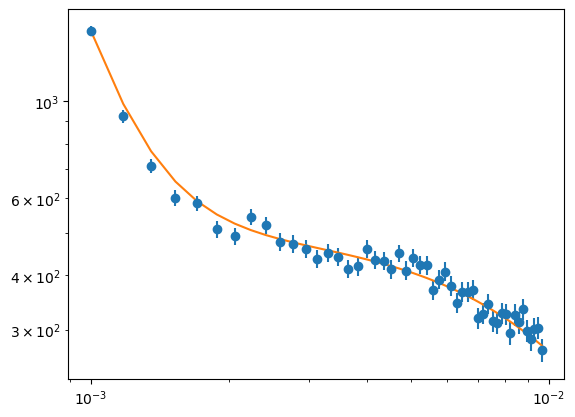

In [143]:

hst = np.histogram(events, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)

pcheck = np.array([0.011, 1.65, 8.0])

y_line = pmf(x_hist, pcheck)#porodobj.pdf(x_hist, xmin=0.001, alpha=4.0-1)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
y_int = porod_integral(x_hist[0], np.amax(x_hist), alpha=4.0)

yscale = y_hist[0] / y_line[0]

y_line = y_line * yscale

print(y_line)
print(y_int)

plt.errorbar(x_hist, y_hist/y_int, yerr=e_hist, ls='None', marker='o')
plt.plot(x_hist, y_line)
plt.yscale('log')
plt.xscale('log')

In [144]:
ndim, nwalkers = 3, 32

#p0 = np.array([0.02, -0.5])

p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location.
state = sampler.run_mcmc(p0, 100, progress=True)

# Run the production chain.
sampler.reset()
sampler.run_mcmc(state, 500, progress=True);

/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_2902/8863499.py:203: RuntimeWarning: invalid value encountered in log
  log_bg_weights = np.log(bg_weights)
  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/phillipbentley/anaconda3/envs/ess/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████████| 500/500 [00:27<00:00, 18.36it/s]


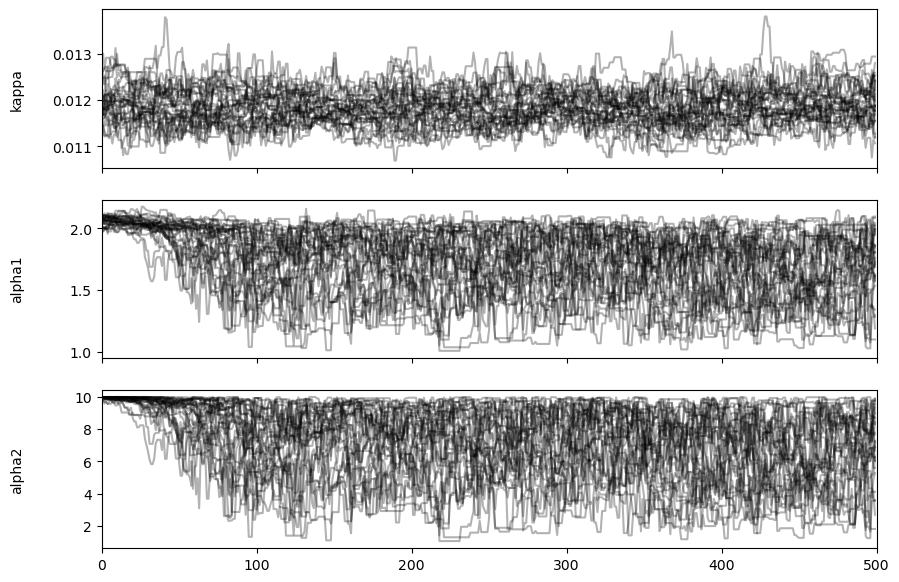

In [150]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa", "alpha1", "alpha2"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

0.10572078420857488
0.8942792157914251


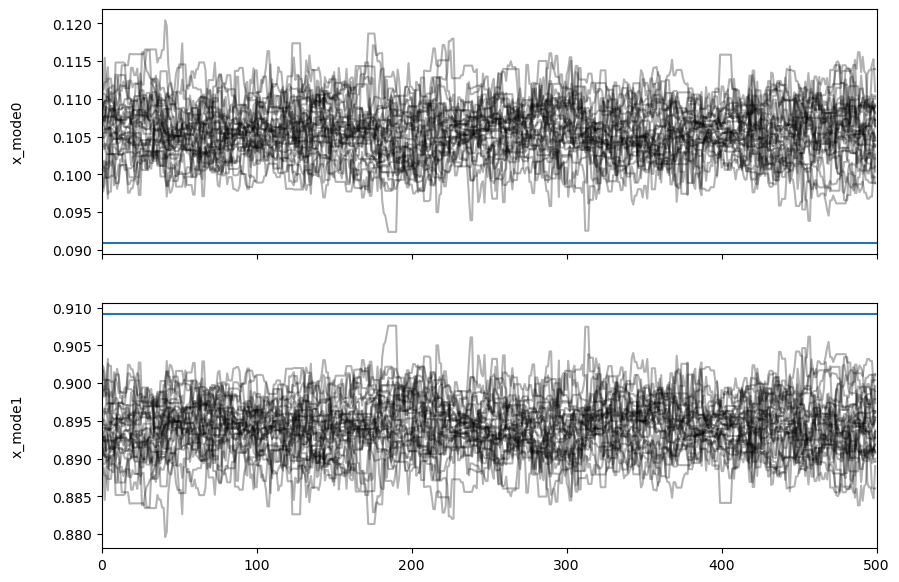

In [151]:
a1=samples[:, :, 1]
a2=samples[:, :, 2]

alpha0 = a1 + a2

K = 2.0

x_mode0 = (a1 - 1.0)/(alpha0 - K)
x_mode1 = (a2 - 1.0)/(alpha0 - K)

modsiz0 = np.mean(x_mode0)
modsiz1 = np.mean(x_mode1)

first_is_bigger = False

print(modsiz0)
print(modsiz1)

if modsiz0 > modsiz1:
    first_is_bigger = True
    
bigfrac = nsig / (nsig + nbg)
smallfrac =  nbg / (nsig + nbg)

if first_is_bigger:
    topfrac = bigfrac
    botfrac = smallfrac
else:
    topfrac = smallfrac
    botfrac = bigfrac

fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
labels = ["x_mode0", "x_mode1"]
ax = axes[0]
ax.plot(x_mode0, "k", alpha=0.3)
ax.set_xlim(0, len(x_mode0))
ax.set_ylabel(labels[0])
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.hlines(topfrac, 0, len(x_mode0))

ax = axes[1]
ax.plot(x_mode1, "k", alpha=0.3)
ax.set_xlim(0, len(x_mode1))
ax.set_ylabel(labels[1])
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.hlines(botfrac, 0, len(x_mode0))


Text(0.5, 0, 'Q (Å-1)')

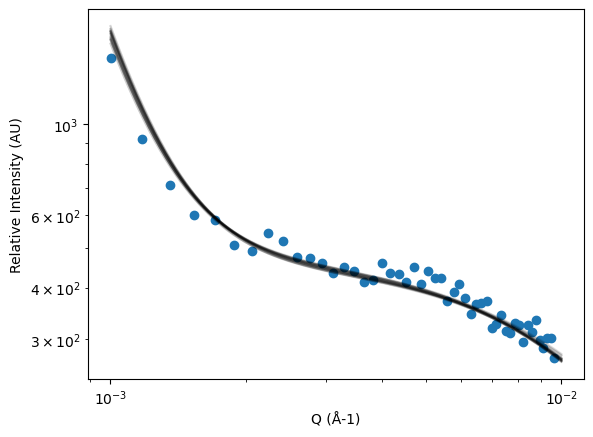

In [152]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(y_hist)

xfit_min = np.min(x_hist)
xfit_max = np.max(x_hist)
x_fit = np.linspace(xmin, xmax, 1000)

fig, ax = plt.subplots()
for ind in inds:
    sample = flat_samples[ind]
    y_fit = pmf(x_fit, sample)
    y_check = pmf(x_hist, sample)
    ysum = np.sum(y_check)
    scale = pt_sum / ysum
    y_fit = y_fit * scale
    plt.plot(x_fit, y_fit, color='black', alpha = 0.1)# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
sct=plt.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
#cbar = fig.colorbar(sct)
#cbar.ax.set_ylabel('Point Signal Weight')

Acceptance fraction 0.590875 (should be high)
kappa estimate       : 0.01184386480244635  (true value = 0.011111111111111112 )
kappa std.dev.       : 0.0003823335651810297


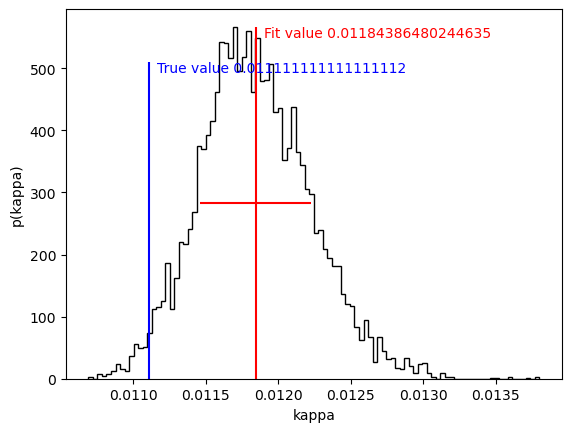

In [153]:
samples=sampler.get_chain(flat=True)

kappa_mean = np.mean(samples[:,0])
kappa_stddev = np.std(samples[:,0])

barmin = kappa_mean - kappa_stddev
barmax = kappa_mean + kappa_stddev



truetxt = "True value " + str(true_kappa)
fittxt = "Fit value " + str(kappa_mean)

hst=plt.hist(samples[:,0], 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("kappa")
plt.ylabel("p(kappa)")
plt.vlines(true_kappa, 0, ytop*0.9, color='blue')
plt.vlines(kappa_mean, 0, ytop, color="red")
plt.hlines(y=ytop*0.5, xmin=barmin, xmax=barmax, color="red")
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(true_kappa*1.005, ytop*0.87, truetxt, color="blue")
plt.text(kappa_mean*1.005, ytop*0.97, fittxt, color="red")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be high)")

print("kappa estimate       :", kappa_mean, " (true value =", true_kappa,")")
print("kappa std.dev.       :", kappa_stddev)

This is a sucessful result.

The porod term is essentially a systematic background generated by the sample itself.  Systematic backgrounds are not distributed normally.

In [245]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import emcee

import emtk.curves.lorentzian as lor
import emtk.curves.gaussian as gauss


nsig = 10000
nbg = 10000

ratio = float(nsig) / float(nbg)
nbins = 50

xrange = np.array([0.001, 0.1])

clength = 90.0 # correlation length in system
kappa = 1.0 / clength
curv = lor.LorentzianCurve()

pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])

curv.generate_test_samples(pvalues, xrange, nsig)


gau = gauss.GaussianCurve()
mu = 0.06
sigma = 0.005
gvalues = np.array([mu, sigma])

bg.generate_test_samples(gvalues, xrange, nbg)


events = np.concatenate((curv.data, bg.data))

np.random.shuffle(events)
curv.data = events

[0.0001]
Generated 10000 samples using parameters [0.01111111]
Generated 10000 samples using parameters [0.06  0.005]


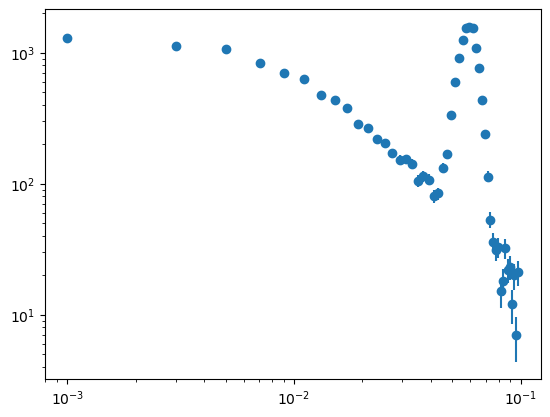

In [246]:
xmin = np.amin(events)
xmax = np.amax(events)
bins = np.linspace(xmin, xmax, nbins)
hst = np.histogram(events, bins=bins)
xvals = hst[1]
xvals = xvals[:-1]
yvals = hst[0]
evals = np.sqrt(yvals)

plt.errorbar(xvals, yvals, yerr=evals, ls='None', marker='o')
plt.yscale('log')
plt.xscale('log')

In [249]:
def log_prior(theta):
    # The main role of this function is to set 
    # parameter bounds of the bayesian search space
    kappa, Q, mu, sigma = theta
    
    lolim = 0.001
    hilim = 0.1
    
    if lolim < kappa < hilim and 0.0 < Q < 1.0 and lolim < mu < hilim and lolim < sigma < 0.03:
        return 0.0
    
    return -np.inf

def gaussian_integral(xmin, xmax, mu, sigma):
    erf = sp.special.erf
    root2 = np.sqrt(2.0)
    t1 = (xmax-mu)/(root2 * sigma)
    t2 = (xmin-mu)/(root2 * sigma)
    
    result = 0.5 * (erf(t1)-erf(t2))
    
    return result
    

def bg_integral(xmin, xmax):
    # Returns the integral over the range of x values
    
    # Assume y=1 over the range
    return xmax-xmin

def cauchy_integral(xmin, xmax, kappa):
    # Returns the integral over the range of x values
    t1 = np.arctan(xmax/kappa)
    t2 = np.arctan(xmin/kappa)
    
    return (t1 - t2)/np.pi



def get_weights(xvals, theta):
    # Figure out the color weight of the point based on its signal likelihood
    kappa, Q, mu, sigma = theta
    
    bg_int = gaussian_integral(xmin, xmax, mu, sigma)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    bg_y = gau.curve(np.array([mu, sigma]), dat=xvals)
     
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    
#   This is an extreme cut test to see if other functions are working properly
#    mask = xvals > 4.0E-02
#    yweight = np.ones_like(xvals)   
#    yweight[mask] = 0.0
    
    
    return yweight



def get_color(xvals, theta):
    # Figure out the color of the point based on its signal likelihood
    kappa, Q, mu, sigma = theta
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    Q = 10.0**logQ
     
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals/sig_int) / (1.0/bg_int + yvals/sig_int)
    
    color_r = np.full_like(yweight, 1.0)
    color_g = yweight
    color_b = 1.0-yweight
    
    color = np.stack((color_r, color_g, color_b), axis=1)
    
    print("yvals", yvals)
    print("Q", Q)
    print("yweight", yweight)
    
    return color
    

def pmf(xvals, theta, verbose=False):
    gaus = sp.stats.norm
    
    kappa, Q, mu, sigma = theta
    
    Q = 10.0**logQ
     
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    bgvals= gau.curve(np.array([mu, sigma]), dat=xvals)
    
    yweight = get_weights(xvals, theta)
    
    term1 = yvals * yweight
    term2 = bgvals * (1.0 - yweight) #* (1.0 - yweight) # ) * gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    if verbose:
        print("term 1:", term1)
        print("term 2:", term2)
    
    result = term1 + term2
    
    return result

                        
def log_gaussian(sigma):
    xvals = curv.data
    gaus = sp.stats.norm
    
    gvals = gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    log_gvals = np.log(gvals)
    
    slog_gvals = np.sum(log_gvals)
    
    return slog_gvals
    

def log_likelihood(theta, testing=True):
    kappa, Q, mu, sigma = theta
    
    if testing:
        verbose=True
        study_data = xvals
    else:
        verbose=False
        study_data = events
    
    lp = log_prior(theta)
    
    if np.isinf(lp):
        return -np.inf
    
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)

    if verbose:
        print("bg_int", bg_int)
        print("sig_int", sig_int)
    
        print("xvals", xvals)
        print("xrange", xmin, xmax)
    
    sig_Q = curv.curve(np.array([kappa]), dat=study_data) #/ sig_int
    bgQ = gau.curve(np.array([mu, sigma]), dat=study_data)

    
    if verbose:
        print("sig_Q", sig_Q)
        print("bgQ", bgQ)
    weights = (sig_Q/sig_int) / (bgQ/bg_int + sig_Q/sig_int)

    weights = get_weights(study_data, theta)
    
    if verbose:
        print("weights", weights)
        print("bg_weights", 1.0-weights)
        
    
    bg_weights = 1.0 - weights
    
    #log_weights = np.log(weights)
    #log_bg_weights = np.log(bg_weights) 
    ll = np.log(sig_Q)
    lbg = np.log(bgQ)
    
    weighted_ll = ll * weights# + log_weights
    weighted_lbg = lbg * (1.0-weights)
    
    weighted_ll_sum = np.sum( np.logaddexp(weighted_ll, weighted_lbg))
    
    #ll = curv.llcurve(np.array([kappa]))
    #if np.isnan(ll):
    #    print("NaN result for theta, prior", theta, lp)

    # bg in this case is a wide gaussian, if it's wide enough it's flat
    # also, Q=0 is zero background (never happens because logQ is of course 
    # on a log scale
    ##lbg = logQ + log_gaussian(sigma)
    
    result = lp + weighted_ll_sum#, arg1, lbg
    
    if np.isnan(result):
        print("nan encountered at", theta)
    
    return result


p0 = np.array([0.01, 0.5, 0.01, 0.01])
#print(log_likelihood(p0))

p1 = np.array([0.01496048, 0.50451563, 0.02575426, 0.00161801])
print(log_likelihood(p1))
#p_wrong_fit = np.array([0.026, 0.5])

#pmf(xvals, p_wrong_fit, verbose=True)

bg_int 0.09865832014740804
sig_int 0.43131864448899276
xvals [0.00100031 0.00301375 0.00502718 0.00704062 0.00905405 0.01106749
 0.01308092 0.01509436 0.01710779 0.01912123 0.02113466 0.0231481
 0.02516153 0.02717497 0.0291884  0.03120184 0.03321527 0.03522871
 0.03724214 0.03925558 0.04126901 0.04328245 0.04529588 0.04730932
 0.04932275 0.05133619 0.05334962 0.05536306 0.05737649 0.05938993
 0.06140336 0.0634168  0.06543023 0.06744367 0.06945711 0.07147054
 0.07348398 0.07549741 0.07751085 0.07952428 0.08153772 0.08355115
 0.08556459 0.08757802 0.08959146 0.09160489 0.09361833 0.09563176
 0.0976452 ]
xrange 0.001000311558738507 0.09965863170614654
sig_Q [21.18201682 20.4469587  19.11797749 17.41883041 15.57291068 13.75107346
 12.05811421 10.54358422  9.22001477  8.079008    7.10237172  6.26876357
  5.55720013  4.94865863  4.42662426  3.97710486  3.58840715  3.25082987
  2.95635011  2.69833659  2.47130179  2.27069413  2.09272666  1.93423746
  1.79257632  1.66551305  1.55116326  1.44792

/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_3981/2973732451.py:174: RuntimeWarning: divide by zero encountered in log
  lbg = np.log(bgQ)
/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_3981/2973732451.py:177: RuntimeWarning: invalid value encountered in multiply
  weighted_lbg = lbg * (1.0-weights)


In [238]:
ndim, nwalkers = 4, 32

p0 = np.array([0.02, 0.5, 0.01, 0.01])

p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location.
state = sampler.run_mcmc(p0, 100)

# Run the production chain.
sampler.reset()
sampler.run_mcmc(state, 500, progress=True);

nan encountered at [0.01496048 0.50451563 0.02575426 0.00161801]


/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_3981/2212396294.py:174: RuntimeWarning: divide by zero encountered in log
  lbg = np.log(bgQ)
/var/folders/th/9shc9qg10f7brtgj6hbfmnpw0000gn/T/ipykernel_3981/2212396294.py:177: RuntimeWarning: invalid value encountered in multiply
  weighted_lbg = lbg * (1.0-weights)


ValueError: Probability function returned NaN

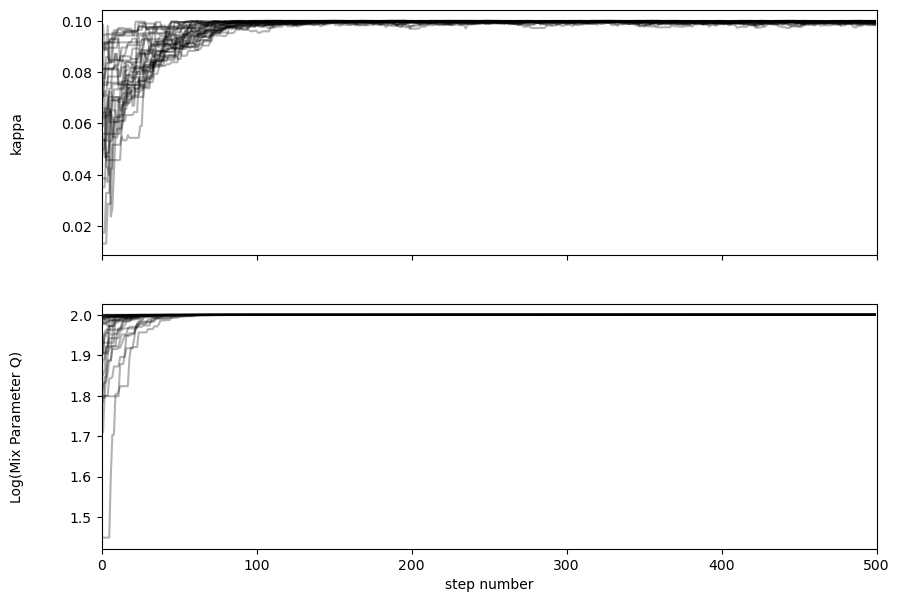

In [214]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa", "Log(Mix Parameter Q)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

Text(0, 0.5, 'Point Signal Weight')

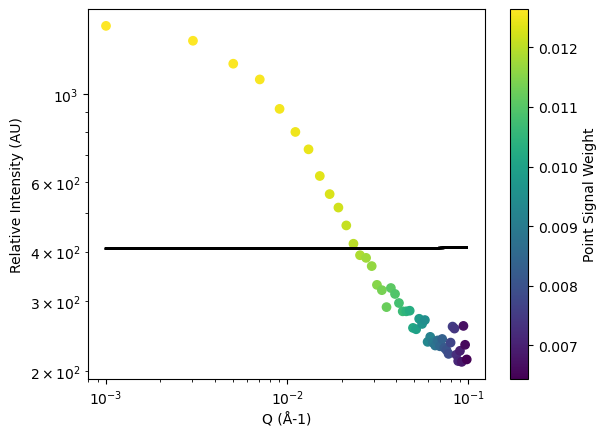

In [215]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=100)

pt_sum = np.sum(yvals)

fig, ax = plt.subplots()
for ind in inds:
    sample = flat_samples[ind]
    yplot = pmf(xvals, sample)
    ysum = np.sum(yplot)
    scale = pt_sum / ysum
    yplot = yplot * scale
    plt.plot(xvals, yplot, color='black', alpha = 0.4 )# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
sct=plt.scatter(xvals, yvals, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
cbar = fig.colorbar(sct)
cbar.ax.set_ylabel('Point Signal Weight')


Acceptance fraction 0.34481249999999997 (should be high)


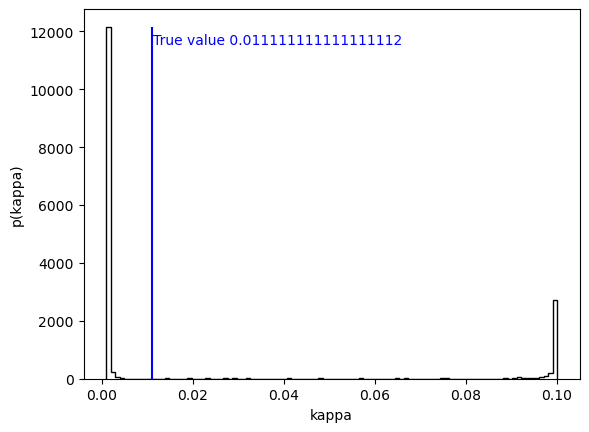

In [211]:
samples=sampler.get_chain(flat=True)

labeltxt = "True value " + str(true_kappa)

hst=plt.hist(samples[:,0], 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("kappa")
plt.ylabel("p(kappa)")
plt.vlines(true_kappa, 0, ytop, color='blue')
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(true_kappa*1.01, ytop*0.95, labeltxt, color="blue")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be high)")

## Dirichlet Mixing of Three Components

In [3]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import emcee

import emtk.curves.lorentzian as lor


class Porod:
    # Slightly modified so that alpha is actually the power of the pdf
    # This kind of follows the same modification as the wikipedia page on power laws

    def pdf(self, x, xmin, alpha):
        return ((alpha-1.0) / xmin) * (x/xmin)**(-alpha)
    
    def cdf(self, x, xmin, alpha):
        return 1.0 - (x/xmin)**(1.0-alpha)
    
    def quantile(self, p, xmin, alpha):
        return xmin * (1.0-p)**(1.0 / (1.0-alpha))
    
    def rvs(self, xmin, alpha, size=1):
        flat = np.random.uniform(size=size)
        return self.quantile(flat, xmin, alpha)


nsig = 20000
nbgp = 2000
nbgt = 5000

nbins = 50

xmin=0.001
xmax=0.01
xrange = np.array([xmin, xmax])


clength = 90.0 # correlation length in system
kappa = 1.0 / clength
true_kappa = kappa
curv = lor.LorentzianCurve()
pvalues = np.array([kappa])

curv.generate_test_samples(pvalues, xrange, nsig)

porodobj = Porod()

porod_alpha = 4.0
teubner_alpha = 6.0
bgp = porodobj.rvs(xmin=xrange[0], alpha=porod_alpha, size=nbgp)
bgt = porodobj.rvs(xmin=xrange[0], alpha=teubner_alpha, size=nbgt)

events = curv.data

events = np.concatenate((events, bgp))
events = np.concatenate((events, bgt))

np.random.shuffle(events)

study_data = events


[0.0001]
Generated 20000 samples using parameters [0.01111111]


0.9988861795105478


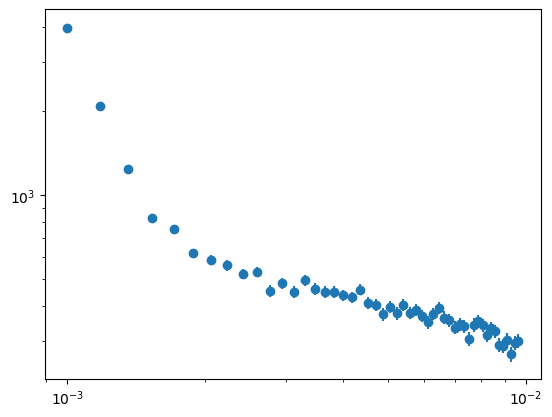

In [4]:
xmin = np.amin(study_data)

slic=(xmax-xmin)/(nbins+1)

hbins = np.arange(xmin, xmax, slic)


hst = np.histogram(study_data, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)

y_line = porodobj.pdf(x_hist, xmin=0.001, alpha=porod_alpha)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
y_int = porodobj.cdf(x=np.amax(x_hist), xmin=0.001, alpha=porod_alpha)
print(y_int)

yscale = y_hist[0] / y_line[0]

y_line = y_line * yscale


plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o')
#plt.plot(x_hist, y_line)
plt.yscale('log')
plt.xscale('log')




In [10]:
def log_prior(theta):
    # The main role of this function is to set 
    # parameter bounds of the bayesian search space
    kappa, a1, a2, a3 = theta
    
    alpha = np.array([a1, a2, a3])
    
    lolim = 0.001
    hilim = 0.1
    
    if lolim < kappa < hilim and\
    np.all(1.0 < alpha) and\
    np.all(alpha < 20.0):
        return 0.0
    
    return -np.inf

def porod_integral(xmin, xmax, alpha):\
    return 1.0 - (xmin / xmax)**(alpha-1.0)
    
def porod_pmf(xvals, alpha, xmin=None):
    xvals = np.asarray(xvals)

    if xmin==None:
        xmin = np.amin(xvals)

    return ((alpha-1.0)/xmin) * ((xvals/xmin) ** (-alpha))


def bg_integral(xmin, xmax):
    # Returns the integral over the range of x values
    
    # Assume y=1 over the range
    return xmax-xmin

def cauchy_integral(xmin, xmax, kappa):
    # Returns the integral over the range of x values
    t1 = np.arctan(xmax/kappa)
    t2 = np.arctan(xmin/kappa)
    
    return (t1 - t2)/np.pi

def get_weights(xvals, theta):
    # Figure out the color weight of the point based on its *signal* likelihood
    kappa, a1, a2 = theta
    
    xmin = np.amin(xvals)
    
    alpha = np.array([a1, a2])
    K = 2
    
    alpha0 = np.sum(alpha)
    x_mode = (alpha - 1.0) / (alpha0 - K)
    
    bg_int = porodobj.pdf(xmax, xmin=xmin, alpha=porod_alpha)#porod_integral(xmin, xmax, porod_alpha)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    
    #bg_y = 10.0**logQ
    bgQ = x_mode[0]
    sigQ = x_mode[1]
    
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    porodweight = porodobj.pdf(xvals, xmin=xmin, alpha=porod_alpha)#porod_pmf(xvals, xmin=xmin, alpha = porod_alpha)
    
    yweight = (yvals * sigQ) / (porodweight * bgQ)
    
    #yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    
    # if yweight = (yvals/sig_int) / (bg_y/bg_int + yvals/sig_int)
    # then signal / weight = bg_y/bg_int + yvals/sig_int
    # which is why that looks like it fits, because it's exactly the
    # function used to generate the data
    # The background term is so small it doesn't matter (I tried taking it out)
    # This is the wrong weighting function even though it seems right
    
#   This is an extreme cut test to see if other functions are working properly
#    mask = xvals > 4.0E-02
#    yweight = np.ones_like(xvals)   
#    yweight[mask] = 0.0
    
    
    return yweight

def get_color(xvals, theta):
    # Figure out the color of the point based on its signal likelihood
    kappa, logQ = theta
    
    bg_int = bg_integral(xmin, xmax)    
    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    Q = 10.0**logQ
     
    yvals = curv.curve(np.array([kappa]), dat=xvals)
    
    yweight = (yvals/sig_int) / (1.0/bg_int + yvals/sig_int)
    
    color_r = np.full_like(yweight, 1.0)
    color_g = yweight
    color_b = 1.0-yweight
    
    color = np.stack((color_r, color_g, color_b), axis=1)
    
    print("yvals", yvals)
    print("Q", Q)
    print("yweight", yweight)
    
    return color
    

def fitted_curve(xvals, kappa, mode1, mode2, mode3):
    
    # Same as PMF below, but we bypass the dirichlet part and use the 
    # dirichlet modes for each component weight directly
    
    bgp_int = porodobj.cdf(xmax, xmin=xmin, alpha=porod_alpha)
    bgt_int = porodobj.cdf(xmax, xmin=xmin, alpha=teubner_alpha)

    sig_int = cauchy_integral(xmin, xmax, kappa)
    
    cauchy_part  = curv.curve(np.array([kappa]), dat=xvals) / sig_int
    porod_part   = porodobj.pdf(xvals, xmin=xmin, alpha=porod_alpha) / bgp_int
    teubner_part = porodobj.pdf(xvals, xmin=xmin, alpha=teubner_alpha) / bgt_int
    
    result =  mode1 * porod_part + mode2 * teubner_part + mode3 * cauchy_part
    
    return result
    
    

def pmf(xx, theta, verbose=False):
    
    kappa, a1, a2, a3 = theta
    
    alpha = np.array([a1, a2, a3])
    K = 3.0
    
    alpha0 = np.sum(alpha)
    x_mode = (alpha - 1.0) / (alpha0 - K)
    
    bgp_int = porodobj.cdf(xmax, xmin=xmin, alpha=porod_alpha)
    bgt_int = porodobj.cdf(xmax, xmin=xmin, alpha=teubner_alpha)
    sig_int = cauchy_integral(xmin, xmax, kappa)

    
    #bg_y = 10.0**logQ
    bgpQ = x_mode[0]
    bgtQ = x_mode[1]
    sigQ = x_mode[2]
    
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=xx) / sig_int
    pbackground = bgpQ * porodobj.pdf(xx, xmin=xmin, alpha=porod_alpha) / bgp_int
    tbackground = bgtQ * porodobj.pdf(xx, xmin=xmin, alpha=teubner_alpha) / bgt_int

    term1 = signal # / yweight
    term2 = pbackground  # / (1.0 - yweight) #* (1.0 - yweight) # ) * gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    term3 = tbackground
    
    if verbose:
        print("term 1:", term1)
        print("term 2:", term2)
        print("term 3:", term3)
    
    result = term1 + term2 + term3
    
    return result

def log_gaussian(sigma):
    xvals = curv.data
    gaus = sp.stats.norm
    
    gvals = gaus.pdf(x=xvals, loc=0.0, scale=sigma)
    
    log_gvals = np.log(gvals)
    
    slog_gvals = np.sum(log_gvals)
    
    return slog_gvals
    

def log_likelihood(theta, testing=False):
    kappa, a1, a2, a3 = theta
    
    alpha = np.array([a1, a2, a3])
    K = 3.0
    
    alpha0 = np.sum(alpha)
    x_mode = (alpha - 1.0) / (alpha0 - K)
    
    if testing:
        verbose=True
        study_data = x_hist
    else:
        verbose=False
        study_data = events
    
    lp = log_prior(theta)
    
    if np.isinf(lp):
        return -np.inf
    
    
    bgp_int = porodobj.cdf(xmax, xmin=xmin, alpha=porod_alpha)
    bgt_int = porodobj.cdf(xmax, xmin=xmin, alpha=teubner_alpha)

    sig_int = cauchy_integral(xmin, xmax, kappa)

    
    #bg_y = 10.0**logQ
    bgpQ = x_mode[0]
    bgtQ = x_mode[1]
    sigQ = x_mode[2]
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=study_data) / sig_int
    pbackground = bgpQ * porodobj.pdf(study_data, xmin=xmin, alpha=porod_alpha) / bgp_int
    tbackground = bgtQ * porodobj.pdf(study_data, xmin=xmin, alpha=teubner_alpha) /bgt_int

    #weights = (sig_Q/sig_int) / (bgQ/bg_int + sig_Q/sig_int)

    #weights = get_weights(study_data, theta)
            
    #inv_weights = 1.0/weights   
    
    #bg_weights = 1.0 - weights
    
    #inv_bg_weights = 1.0/bg_weights
    
    #log_weights = np.log(weights)
    #log_bg_weights = np.log(bg_weights) 
    
    
    
    
    ll = np.log(signal)
    lbgp = np.log(pbackground)
    lbgt = np.log(tbackground)
    
    weighted_ll = ll #+ log_weights
    weighted_lbgp = lbgp #+ log_bg_weights#*0.3 #* (1.0-weights)
    weighted_lbgt = lbgt
    
    weighted_ll = np.logaddexp(weighted_ll, weighted_lbgp)
    weighted_ll = np.logaddexp(weighted_ll, weighted_lbgt)
    
    weighted_ll_sum = np.sum(weighted_ll)
    
    #ll = curv.llcurve(np.array([kappa]))
    #if np.isnan(ll):
    #    print("NaN result for theta, prior", theta, lp)

    # bg in this case is a wide gaussian, if it's wide enough it's flat
    # also, Q=0 is zero background (never happens because logQ is of course 
    # on a log scale
    ##lbg = logQ + log_gaussian(sigma)
    
    result = lp + weighted_ll_sum#, arg1, lbg
    
    if np.isnan(result):
        verbose=True
    
    if verbose:
        print("kappa", kappa)
        print("alpha", alpha)
        print("sigQ", sigQ)
        print("bgpQ", bgpQ)
        print("bgtQ", bgtQ)
        print("bgp_int", bgp_int)
        print("bgt_int", bgt_int)
        print("sig_int", sig_int)
    
        print("xvals", study_data)
        print("xrange", xmin, xmax)
    
        print("signal", signal)
        print("bgp", pbackground)
        print("bgt", tbackground)
        
        #print("weights", weights)
        #print("bg_weights", 1.0-weights)
        
        #print("inv weights", inv_weights)
        #print("inv bg weights", inv_bg_weights)
        
        #print("sig / wt", signal/weights)
        #print("bg / bgwt", background/(1.0-weights))
        
        print("weighted ll", weighted_ll)
        print("weighted lbgp", weighted_lbgp)
        print("weighted lbgt", weighted_lbgt)
    
    return result


p0 = np.array([0.02, 2.0, 5.0, 10.0])

print(log_likelihood(p0, testing=True))


kappa 0.02
alpha [ 2.  5. 10.]
sigQ 0.6428571428571429
bgpQ 0.07142857142857142
bgtQ 0.2857142857142857
bgp_int 0.9989999902373907
bgt_int 0.9999899998372893
sig_int 0.13168131473133263
xvals [0.001      0.00117647 0.00135294 0.00152941 0.00170589 0.00188236
 0.00205883 0.0022353  0.00241177 0.00258824 0.00276471 0.00294118
 0.00311765 0.00329412 0.00347059 0.00364706 0.00382353 0.004
 0.00417647 0.00435294 0.00452941 0.00470588 0.00488235 0.00505883
 0.0052353  0.00541177 0.00558824 0.00576471 0.00594118 0.00611765
 0.00629412 0.00647059 0.00664706 0.00682353 0.007      0.00717647
 0.00735294 0.00752941 0.00770588 0.00788235 0.00805882 0.00823529
 0.00841177 0.00858824 0.00876471 0.00894118 0.00911765 0.00929412
 0.00947059 0.00964706]
xrange 0.0010000032541924884 0.01
signal [77.50434728 77.43018344 77.34417121 77.24638995 77.1369296  77.01589039
 76.88338271 76.73952675 76.58445234 76.41829857 76.24121356 76.05335408
 75.85488525 75.64598014 75.42681948 75.1975912  74.95849011 74.70

[3983.         1685.69676793  866.46680113  527.97425523  371.4001816
  292.17854717  249.03884854  224.0463138   208.7675765   198.96721439
  192.3960492   187.80110322  184.45478767  181.918994    179.92136552
  178.28774069  176.90392512  175.69335771  174.60368248  173.59846255
  172.65194521  171.74568265  170.86630716  170.00403961  169.15167263
  168.30386665  167.45665542  166.60709402  165.7530051   164.89279377
  164.02531111  163.14975238  162.26558044  161.37246754  160.47025063
  159.55889686  158.63847664  157.70914243  156.77111198  155.82465491
  154.87008195  153.90773624  152.93798616  151.96121958  150.97783897
  149.9882575   148.99289564  147.99217841  146.98653302  145.97638689]
0.9988861686367536


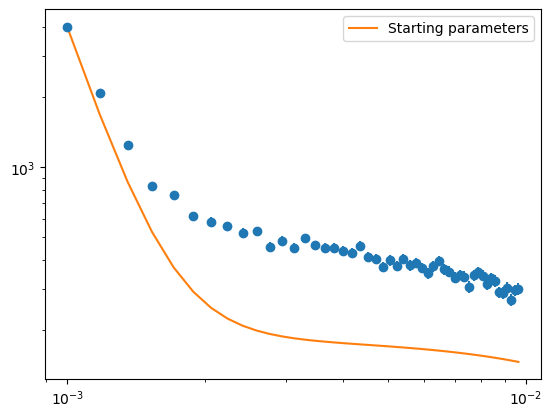

In [11]:

hst = np.histogram(events, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)


y_line = pmf(x_hist, p0)#porodobj.pdf(x_hist, xmin=0.001, alpha=4.0-1)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
y_int = porod_integral(x_hist[0], np.amax(x_hist), alpha=4.0)

yscale = y_hist[0] / y_line[0]

y_line = y_line * yscale

print(y_line)
print(y_int)

plt.errorbar(x_hist, y_hist/y_int, yerr=e_hist, ls='None', marker='o')
plt.plot(x_hist, y_line, label="Starting parameters")
plt.yscale('log')
plt.xscale('log')
plt.legend()

In [12]:
ndim, nwalkers = 4, 32

#p0 = np.array([0.02, -0.5])

p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location.
state = sampler.run_mcmc(p0, 200, progress=True)

# Run the production chain.
sampler.reset()
sampler.run_mcmc(state, 400, progress=True);

100%|█████████████████████████████████████████| 400/400 [00:37<00:00, 10.54it/s]


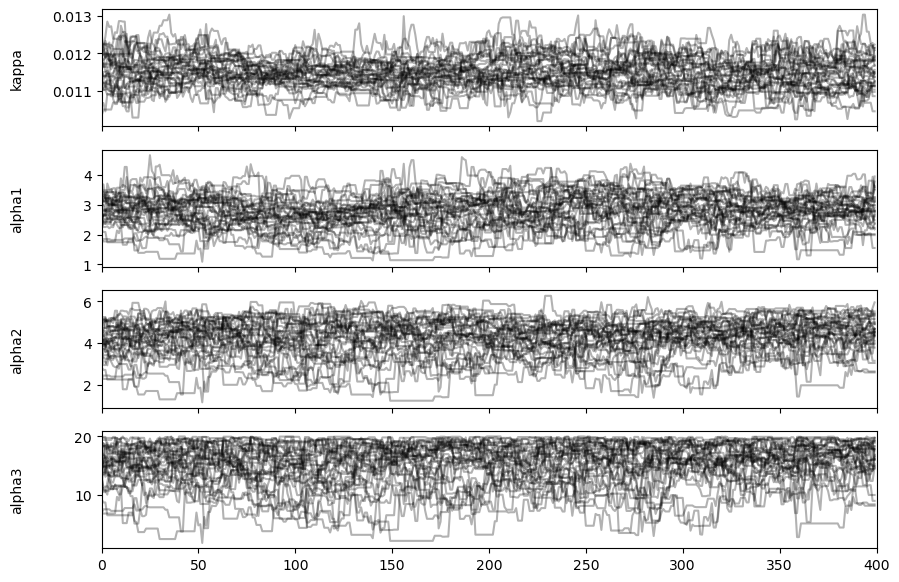

In [13]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa", "alpha1", "alpha2", "alpha3"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

0.09285136727413257
0.16963748200744008
0.7375111507184274


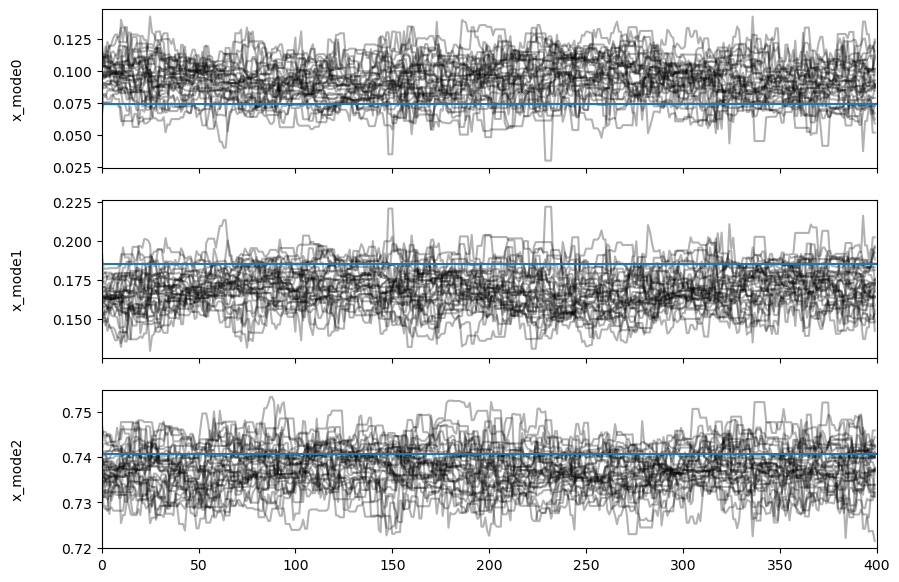

In [14]:
a1=samples[:, :, 1]
a2=samples[:, :, 2]
a3=samples[:, :, 3]

alpha0 = a1 + a2 + a3

K = 3.0

x_mode0 = (a1 - 1.0)/(alpha0 - K)
x_mode1 = (a2 - 1.0)/(alpha0 - K)
x_mode2 = (a3 - 1.0)/(alpha0 - K)

modsiz0 = np.mean(x_mode0)
modsiz1 = np.mean(x_mode1)
modsiz2 = np.mean(x_mode2)

print(modsiz0)
print(modsiz1)
print(modsiz2)

line1 = nbgp / (nbgp + nbgt + nsig)
line2 = nbgt / (nbgt + nbgp + nsig)
line3 = nsig / (nbgt + nbgp + nsig)


fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
labels = ["x_mode0", "x_mode1", "x_mode2"]
ax = axes[0]
ax.plot(x_mode0, "k", alpha=0.3)
ax.set_xlim(0, len(x_mode0))
ax.set_ylabel(labels[0])
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.hlines(line1, 0, len(x_mode0))


ax = axes[1]
ax.plot(x_mode1, "k", alpha=0.3)
ax.set_xlim(0, len(x_mode1))
ax.set_ylabel(labels[1])
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.hlines(line2, 0, len(x_mode0))

ax = axes[2]
ax.plot(x_mode2, "k", alpha=0.3)
ax.set_xlim(0, len(x_mode2))
ax.set_ylabel(labels[2])
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.hlines(line3, 0, len(x_mode0))

Text(0.5, 0, 'Q (Å-1)')

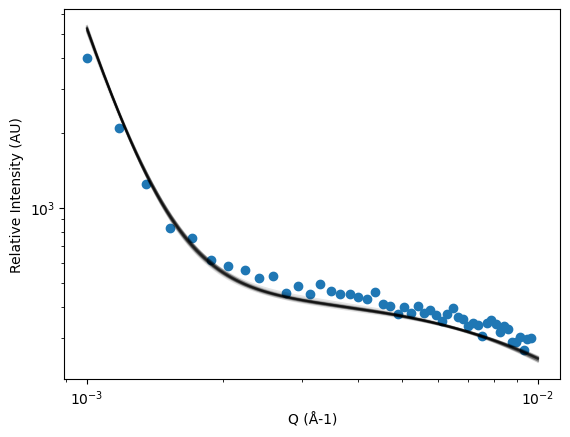

In [16]:
# Population based fit

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(y_hist)

xfit_min = np.min(x_hist)
xfit_max = np.max(x_hist)
x_fit = np.linspace(xmin, xmax, 1000)

fig, ax = plt.subplots()
for ind in inds:
    sample = flat_samples[ind]
    y_fit = pmf(x_fit, sample)
    y_check = pmf(x_hist, sample)
    ysum = np.sum(y_check)
    scale = pt_sum / ysum
    y_fit = y_fit * scale
    plt.plot(x_fit, y_fit, color='black', alpha = 0.1)# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
sct=plt.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
#cbar = fig.colorbar(sct)
#cbar.ax.set_ylabel('Point Signal Weight')

Text(0.5, 0, 'Q (Å-1)')

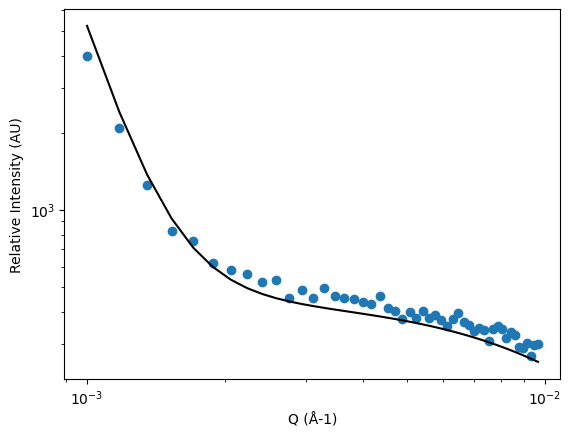

In [17]:
# Single line fit using mean actual parameters
samples = sampler.get_chain()

kappas = samples[:, :, 0]
a1=samples[:, :, 1]
a2=samples[:, :, 2]
a3=samples[:, :, 3]

alpha0 = a1 + a2 + a3

K = 3.0

x_mode0 = (a1 - 1.0)/(alpha0 - K)
x_mode1 = (a2 - 1.0)/(alpha0 - K)
x_mode2 = (a3 - 1.0)/(alpha0 - K)

kappa = np.mean(kappas)
modsiz0 = np.mean(x_mode0)
modsiz1 = np.mean(x_mode1)
modsiz2 = np.mean(x_mode2)



yline = fitted_curve(x_hist, kappa, modsiz0, modsiz1, modsiz2)

yscale = np.sum(y_hist) / np.sum(yline)

fig, ax = plt.subplots()
sct=plt.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
plt.plot(x_hist, yline * yscale, "k", label="Fit")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')


Acceptance fraction 0.545546875 (should be high)
kappa estimate       : 0.01149330104228831  (true value = 0.011111111111111112 )
kappa std.dev.       : 0.0004153530193296625


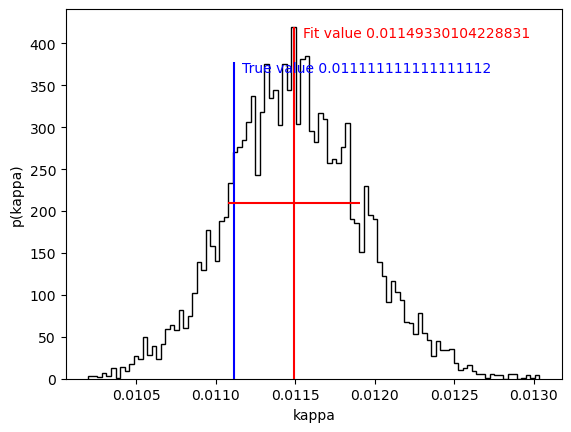

In [18]:
samples=sampler.get_chain(flat=True)

kappa_mean = np.mean(samples[:,0])
kappa_stddev = np.std(samples[:,0])

barmin = kappa_mean - kappa_stddev
barmax = kappa_mean + kappa_stddev



truetxt = "True value " + str(true_kappa)
fittxt = "Fit value " + str(kappa_mean)

hst=plt.hist(samples[:,0], 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("kappa")
plt.ylabel("p(kappa)")
plt.vlines(true_kappa, 0, ytop*0.9, color='blue')
plt.vlines(kappa_mean, 0, ytop, color="red")
plt.hlines(y=ytop*0.5, xmin=barmin, xmax=barmax, color="red")
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(true_kappa*1.005, ytop*0.87, truetxt, color="blue")
plt.text(kappa_mean*1.005, ytop*0.97, fittxt, color="red")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be high)")

print("kappa estimate       :", kappa_mean, " (true value =", true_kappa,")")
print("kappa std.dev.       :", kappa_stddev)

Initially, this is a sucessful result.  However, the small systematic deviations prevent this from working on the real data.  I need to fix this first before moving on.


## Simplex Weights

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import emcee
from sklearn.neighbors import KernelDensity

import emtk.curves.lorentzian as lor


class Porod:
    # Slightly modified so that alpha is actually the power of the pdf
    # This kind of follows the same modification as the wikipedia page on power laws

    def pdf(self, x, xmin, alpha):
        return ((alpha-1.0) * xmin **(alpha-1.0)) / (x**alpha)
    
    def cdf(self, x, xmin, alpha):
        return 1.0 - (x/xmin)**(1.0-alpha)
    
    def quantile(self, p, xmin, alpha):
        return xmin * (1.0-p)**(-1.0 / (alpha-1.0))
    
    def rvs(self, xmin, xmax, alpha, size=1):
        # It could be we generate events outside the xrange
        # we need to filter those out and keep generating until
        # we have enough
        flat = np.random.uniform(size=size)
        gens = self.quantile(flat, xmin, alpha)
        keep_mask = np.logical_and(xmin <= gens, gens <= xmax)
        keep = gens[keep_mask]
        got = keep.size
        need = size - got
        while need > 0:
            #print(need)
            newflat = np.random.uniform(size=need)
            newgens = self.quantile(newflat, xmin, alpha)
            gens = np.concatenate((gens, newgens))
            keep_mask = np.logical_and(xmin <= gens, gens <= xmax)
            keep = gens[keep_mask]
            got = keep.size
            need = size - got
            #print("new need", need)
            
        return keep
        
class RawPorod:
    # PDF and CDF are not normalised in any way, we need to do that separately

    def pdf(self, x, xmin, alpha):
        return 1.0 / (x**alpha)
    
    def cdf(self, x, xmin, alpha):
        return 1.0/(alpha + 1.0) * 1.0/xmin**(alpha + 1.0) - 1.0/x**(alpha + 1.0)
    
    def quantile(self, p, xmin, alpha):
        return xmin * (1.0-p)**(-1.0 / (alpha-1.0))
    
    def rvs(self, xmin, alpha, size=1):
        flat = np.random.uniform(size=size)
        return self.quantile(flat, xmin, alpha)



nsig = 50000
nbgp = nsig#int(nsig / 5.0)
nbgt = nsig

nbins = 50

fix_xmin=0.001
fix_xmax=0.01
xrange = np.array([fix_xmin, fix_xmax])


clength = 90.0 # correlation length in system
kappa = 1.0 / clength
true_kappa = kappa
true_mix = np.log10(nbgp / (nbgp + nsig))
curv = lor.LorentzianCurve()
pvalues = np.array([kappa])

porodobj = Porod()

porod_alpha = 4.0
teubner_alpha = 6.0

curv.generate_test_samples(pvalues, xrange, nsig)
print("Generating events over", xrange[0], xrange[1])
porod_events = porodobj.rvs(xmin=xrange[0], xmax=xrange[1], alpha=4.0, size=nbgp)
print("Porod background contains", porod_events.size, "points in range", np.amin(porod_events), "to", np.amax(porod_events))
teubner_events = porodobj.rvs(xmin=xrange[0], xmax=xrange[1], alpha=6.0, size=nbgt)
print("Tuebner background contains", teubner_events.size, "points in range", np.amin(teubner_events), "to", np.amax(teubner_events))


def log_prior(theta):
    # The main role of this function is to set 
    # parameter bounds of the bayesian search space
    kappa, q1 = theta
        
    if 0.001 < kappa < 0.1 and\
    q1 < 0.0 and\
    q1 > -9.0:
        return 0.0
    
    return -np.inf

def cauchy_integral(xmin, xmax, kappa):
    # Returns the integral over the range of x values
    t1 = np.arctan(xmax/kappa)
    t2 = np.arctan(xmin/kappa)
    
    return (t1 - t2)/np.pi


def simplex_weights(Qraw):
    # Raw Q values can run between 0-1 to keep things simple
    # The sum is assumed to be 1, preventing out of gamut values
    # due to likelihood maximisation is handled in the prior.
    # Note that Qraw has one dimension fewer
    # than the number of parameters, like this:
    # https://en.m.wikipedia.org/wiki/Ternary_plot
    
    Qraw = np.asarray(Qraw)
    
    Qsum = np.sum(Qraw)    
    Qlast = 1.0 - Qsum
    
    Qvals = np.append(Qraw, Qlast)
                
    return Qvals




def marginal(xx, theta, verbose=False, normalise=False):
    
    kappa, logQ = theta

    xmin = np.amin(xx)
    xmax = np.amax(xx)
        
    #bg_int = bg_integral(xmin, xmax)    
    bg_int = porodobj.cdf(xmax, xmin, 4.0)
    sig_int = sp.stats.halfcauchy.cdf(xmax, loc=0.0, scale=kappa)#cauchy_integral(xmin, xmax, kappa)

    
    #signal = sigQ * curv.curve(np.array([kappa]), dat=xx) / sig_int
    signal = sp.stats.halfcauchy.pdf(xx, loc=0.0, scale=kappa) #/ sig_int
    background = porodobj.pdf(xx, xmin, 4.0) #/ bg_int

    if normalise:
        signal = signal / sig_int
        background = background / bg_int
            
    if verbose:
        print("Signal:", signal)
        print("Background:", background)

    marg = signal + background
    
    return marg



def pmf(xx, theta, verbose=False):
    
    kappa, logQ = theta

    xmin = np.amin(xx)
    xmax = np.amax(xx)
    #cdf(self, x, xmin, alpha)
    bg_int = porodobj.cdf(x=xmax, xmin=xmin, alpha = 4.0)    
    #sig_int = #sp.stats.halfcauchy.cdf(xmax, loc=0.0, scale=kappa)# - sp.stats.halfcauchy.cdf(xmin, loc=0.0, scale=kappa)
    #cauchy_integral(xmin, xmax, kappa)
    sig_int = cauchy_integral(xmin, xmax, kappa)

    bgQ = 10.0**logQ
    sigQ = 1.0-bgQ
    
    signal = curv.curve(np.array([kappa]), dat=xx)
    background = porodobj.pdf(xx, xmin, alpha=4.0)

    term1 = sigQ * signal / sig_int
    term2 = bgQ * background / bg_int
            
    if verbose:
        print("xmin:", xmin)
        print("xmax:", xmax)
        print("Signal:", signal)
        print("Background:", background)
        print("sig_int:", sig_int)
        print("bg_int:", bg_int)
        print("sigQ:", sigQ)
        print("bgQ:", bgQ)
        print("Term1:", term1)
        print("Term2:", term2)
    
    result = term1 + term2
    
    return result

    

def log_likelihood(theta):
    kappa, logQ = theta
    
    lp = log_prior(theta)
    
    if np.isinf(lp):
        return -np.inf
    
    xmin = np.amin(study_data)
    xmax = np.amax(study_data)
    bg_int = porodobj.cdf(xmax, xmin, alpha=4.0)    
    sig_int = cauchy_integral(xmin, xmax, kappa)


    bgQ = 10.0**logQ
    sigQ = 1.0-bgQ
    
    signal = sigQ * curv.curve(np.array([kappa]), dat=study_data) / sig_int
    background = bgQ * porodobj.pdf(study_data, xmin, alpha=4.0) / bg_int
    

    ll = np.log(signal)
    lbg = np.log(background)

    # logaddexp is used to add the two components in linear space
    # in theory you can do it before taking the log above...
    weighted_ll_sum = np.sum( np.logaddexp(ll, lbg))
    
    #ll = curv.llcurve(np.array([kappa]))
    #if np.isnan(ll):
    #    print("NaN result for theta, prior", theta, lp)

    # bg in this case is a wide gaussian, if it's wide enough it's flat
    # also, Q=0 is zero background (never happens because logQ is of course 
    # on a log scale
    ##lbg = logQ + log_gaussian(sigma)
    
    result = lp + weighted_ll_sum#, arg1, lbg
    
    if np.isnan(result):
        print("NaN in log_likelihood at", theta)
        
    return result



# Make some unit tests of the code for consistency

def make_tests():
    print("Unit testing code...")
    pt = np.array([kappa, np.log10(0.5)])
    testpmf = pmf(study_data, pt)

    ll = log_likelihood(pt)

    lp = log_prior(pt)
    sumll = lp + np.sum(np.log(testpmf))
    assert np.isclose(sumll, ll), f"Inconsistency between sum log pmf and log_likelihood {sumll, ll}"

    # Check the CDF values
    porod_cdf_mathematica_check = porodobj.cdf(0.002, 0.001, 4.0)
    assert np.isclose(porod_cdf_mathematica_check, 0.875), f"Inconsistency between porod cdf and analytical {porod_cdf_mathematica_check, 0.875}"

    cauchy_cdf_mathematica_check = cauchy_integral(0.001, 0.002, 0.01)
    assert np.isclose(cauchy_cdf_mathematica_check, 0.0311074), f"Inconsistency between cauchy cdf and analytical {cauchy_cdf_mathematica_check, 0.0311074}"

    print("Unit testing complete.")


testx = np.array([0.001, 0.1])
study_data = testx

make_tests()






Loading ESS event mode toolkit (emtk)
Loading curves
Loading omega functions
[0.0001]
Generated 50000 samples using parameters [0.01111111]
Generating events over 0.001 0.01
Porod background contains 50000 points in range 0.001000009570059962 to 0.009879985067508862
Tuebner background contains 50000 points in range 0.001000000495255252 to 0.008838755534582235
Unit testing code...
Unit testing complete.


### Pure Lorentzian Check

This section should accurately determine the linewidth with no background contamination, and put the background weight to zero

0.9989450495953264


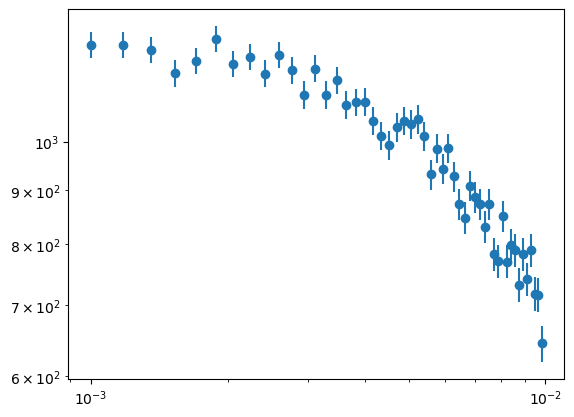

In [2]:
study_data = curv.data

event_xmin = np.amin(study_data)
event_xmax = np.amax(study_data)

slic=(event_xmax-event_xmin)/(nbins+1)

hbins = np.arange(fix_xmin, fix_xmax, slic)


hst = np.histogram(study_data, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)

y_line = porodobj.pdf(x_hist, xmin=0.001, alpha=porod_alpha)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
y_int = porodobj.cdf(x=np.amax(x_hist), xmin=0.001, alpha=porod_alpha)
print(y_int)

yscale = y_hist[0] / y_line[0]

y_line = y_line * yscale


plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o')
#plt.plot(x_hist, y_line)
plt.yscale('log')
plt.xscale('log')




[[Model]]
    Model(teubner_mix)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 51
    # variables        = 3
    chi-square         = 55.6977892
    reduced chi-square = 1.16037061
    Akaike info crit   = 10.4938559
    Bayesian info crit = 16.2893328
    R-squared          = 0.99996188
[[Variables]]
    aa:     8.64283922 +/- 0.04178819 (0.48%) (init = 50)
    kappa:  0.01115526 +/- 2.2668e-04 (2.03%) (init = 0.05)
    q1:    -2.98676664 +/- 0.59603147 (19.96%) (init = -0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(kappa, q1) = +0.4137
0.0010309399329999837


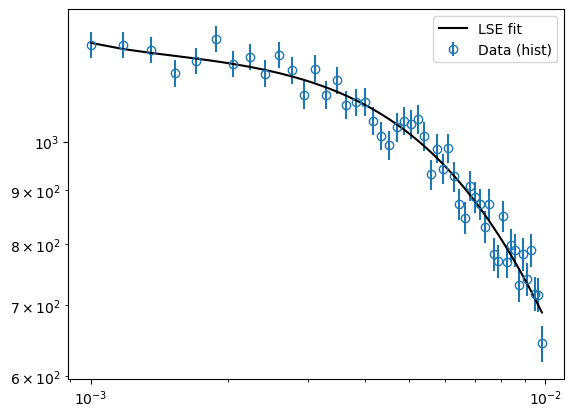

In [3]:
# Check with a LSE model

from lmfit import Model


def teubner_mix(x, aa, kappa, q1):
    theta = kappa, q1#, q2
    return aa * pmf(x, theta)

tmm = Model(teubner_mix)

params = tmm.make_params(
    aa=dict(value=50.0, min=0.0),\
    kappa=dict(value=0.05, min=0.001, max=0.1),\
    q1=dict(value=-0.3, min=-9.0, max=0.0),\
#    q2=dict(value=0.4, min=0.0, max=1.0)\
)


result = tmm.fit(y_hist, params, x=x_hist, weights = 1.0/e_hist)


print(result.fit_report())

fig, ax = plt.subplots()
ax.errorbar(x_hist, y_hist, e_hist, fmt='o', mfc='none', label="Data (hist)")
#ax.plot(spec[0], result.init_fit, '--', color='black', label="LSE initial")
ax.plot(x_hist, result.best_fit, color='black', label="LSE fit")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

lsq1 = result.best_values['q1']
#lsq2 = result.best_values['q2']
lskappa = result.best_values['kappa']

lsmix = 10.0**lsq1
print(lsmix)

0.5 -2.986766637846067
236257.24620548604
xmin: 0.001
xmax: 0.009823267840414724
Signal: [28.30703068 28.22062501 28.12086838 28.00804883 27.8824884  27.74454089
 27.59458947 27.43304408 27.26033878 27.076929   26.88328869 26.67990752
 26.46728806 26.24594296 26.01639224 25.7791606  25.53477493 25.28376181
 25.02664525 24.76394453 24.49617222 24.22383231 23.94741858 23.66741308
 23.38428483 23.09848865 22.81046417 22.52063499 22.22940803 21.93717297
 21.64430185 21.35114885 21.05805008 20.76532359 20.47326943 20.18216977
 19.8922892  19.60387495 19.31715734 19.03235016 18.74965115 18.46924251
 18.19129143 17.91595066 17.64335911 17.37364238 17.10691346 16.84327325
 16.58281119 16.32560587 16.07172563]
Background: [3.00000000e+03 1.56604660e+03 8.95404001e+02 5.48329201e+02
 3.54279692e+02 2.38968780e+02 1.66982611e+02 1.20174137e+02
 8.86771361e+01 6.68556069e+01 5.13521203e+01 4.00932177e+01
 3.17576561e+01 2.54800747e+01 2.06797628e+01 1.69585049e+01
 1.40378806e+01 1.17197923e+01 9.

array([143.53166725, 141.62311424, 140.4360837 , 139.51817722,
       138.69498773, 137.89160453, 137.07338042, 136.22362094,
       135.33429731, 134.4018524 , 133.42517265, 132.40454755,
       131.34110681, 130.23650071, 129.09270981, 127.91192633,
       126.69647683, 125.44876936, 124.17125584, 122.86640412,
       121.53667655, 120.18451293, 118.81231689, 117.42244458,
       116.01719537, 114.59880418, 113.16943509, 111.73117618,
       110.28603537, 108.83593719, 107.38272035, 105.92813612,
       104.47384729, 103.02142784, 101.57236305, 100.12805016,
        98.68979945,  97.25883565,  95.83629974,  94.42325099,
        93.02066926,  91.62945745,  90.25044417,  88.88438652,
        87.53197294,  86.19382613,  84.87050604,  83.56251286,
        82.27028998,  80.99422701,  79.73466264])

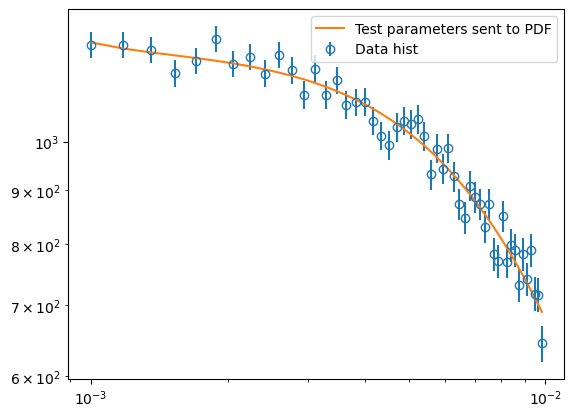

In [4]:



# Run a check with the correct parameters to see that we recover EXACTLY
# a perfect fit of the data

qsum = nsig + nbgp #+ nbgt

#qt = nbgt / qsum
qp = nbgp / qsum


#  LSE results
#     aa:     17.4619985 +/- 0.39272742 (2.25%) (init = 100)
#    kappa:  0.01155678 +/- 4.2164e-04 (3.65%) (init = 0.05)
#    bb:     0.50690746 +/- 0.05910729 (11.66%) (init = 300)
#    cc:     0.39551595 +/- 0.04095460 (10.35%) (init = 300)

#aa:     17.2444786 +/- 0.47556588 (2.76%) (init = 100)
#    kappa:  0.01146933 +/- 5.1693e-04 (4.51%) (init = 0.05)
#    bb:     0.50669511 +/- 0.07263683 (14.34%) (init = 300)
#    cc:     0.40889283 +/- 0.05022875 (12.28%) (init = 300)


#print(qt, lsq1)
print(qp, lsq1)

p0 = np.array([lskappa, lsq1])

print(log_likelihood(p0))


hst = np.histogram(study_data, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)


y_line = pmf(x_hist, p0)#porodobj.pdf(x_hist, xmin=0.001, alpha=4.0-1)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
#y_int = porod_integral(x_hist[0], np.amax(x_hist), alpha=4.0)

y_rescale = np.sum(y_hist) / np.sum(y_line)

y_line = y_line * y_rescale

plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o', mfc='None', label='Data hist')
plt.plot(x_hist, y_line, label="Test parameters sent to PDF")
plt.yscale('log')
plt.xscale('log')
plt.legend()

pmf(x_hist, p0, verbose=True)


0.011111111111111112 -0.3010299956639812
Xrange: 0.0010000422335930436 0.009999895076130404


Text(0.5, 1.0, 'CDF of various components')

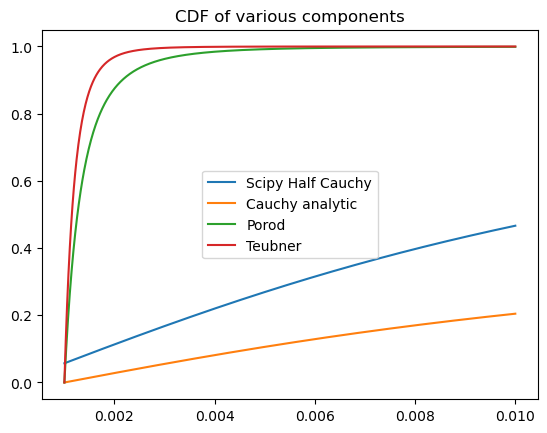

In [164]:
print(true_kappa, true_mix)

xmin = np.amin(study_data)
xmax = np.amax(study_data)
print("Xrange:", xmin, xmax)
x_line = np.linspace(xmin, xmax, 1000)

spcintegraly = sp.stats.halfcauchy.cdf(x_line, loc=0.0, scale=true_kappa)

cintegraly = np.zeros_like(x_line)

for i in range(x_line.size):
    cintegraly[i] = cauchy_integral(xmin, x_line[i], true_kappa)
pintegraly = porodobj.cdf(x_line, xmin=xmin, alpha=4.0)
tintegraly = porodobj.cdf(x_line, xmin=xmin, alpha=6.0)


#print(pintegraly)
plt.plot(x_line, spcintegraly, label="Scipy Half Cauchy")
plt.plot(x_line, cintegraly, label="Cauchy analytic")
plt.plot(x_line, pintegraly, label="Porod")
plt.plot(x_line, tintegraly, label="Teubner")

#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.title("CDF of various components")



Burn in:


100%|█████████████████████████████████████████| 200/200 [00:14<00:00, 13.88it/s]


Sampling:


100%|█████████████████████████████████████████| 200/200 [00:13<00:00, 14.65it/s]

[ 0.01114499 -2.80725402]
[ 0.01114499 -2.80725402]


Text(0.5, 0, 'Q (Å-1)')

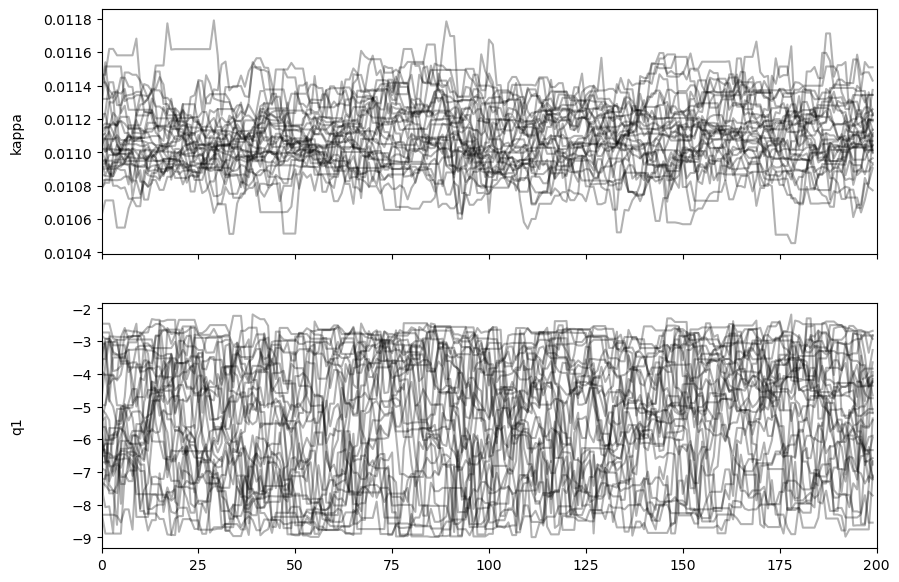

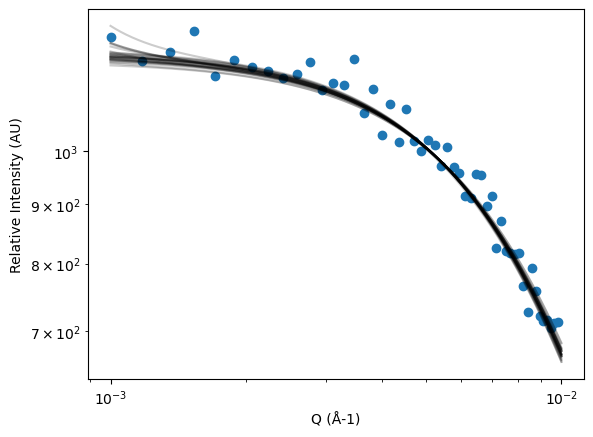

In [165]:
ndim, nwalkers = 2, 32



p0 = np.array([true_kappa, true_mix])
p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location
print("Burn in:")
state = sampler.run_mcmc(p0, 200, progress=True)

# Run the production chain.
sampler.reset()
print("Sampling:")
sampler.run_mcmc(state, 200, progress=True);





# Plot the theta curves during sampling 
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa", "q1", "q2"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


# Population based fit of the data

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(y_hist)

xfit_min = np.amin(study_data)
xfit_max = np.amax(study_data)

x_fit = np.linspace(xfit_min, xfit_max, 1000)

fig, ax = plt.subplots()


for ind in inds:
    sample = flat_samples[ind]
    y_fit = pmf(x_fit, sample)
    #pt_sum = np.sum(y_fit)
    y_check = pmf(x_hist, sample)
    ysum = np.sum(y_check)
    scale = pt_sum / ysum
    y_fit = y_fit * scale
    if ind == inds[0]:
        print(sample)

    ax.plot(x_fit, y_fit, color='black', alpha = 0.2)# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
ax.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
#cbar = fig.colorbar(sct)
#cbar.ax.set_ylabel('Point Signal Weight')




0.00033302882725953575
0.9996669711727405


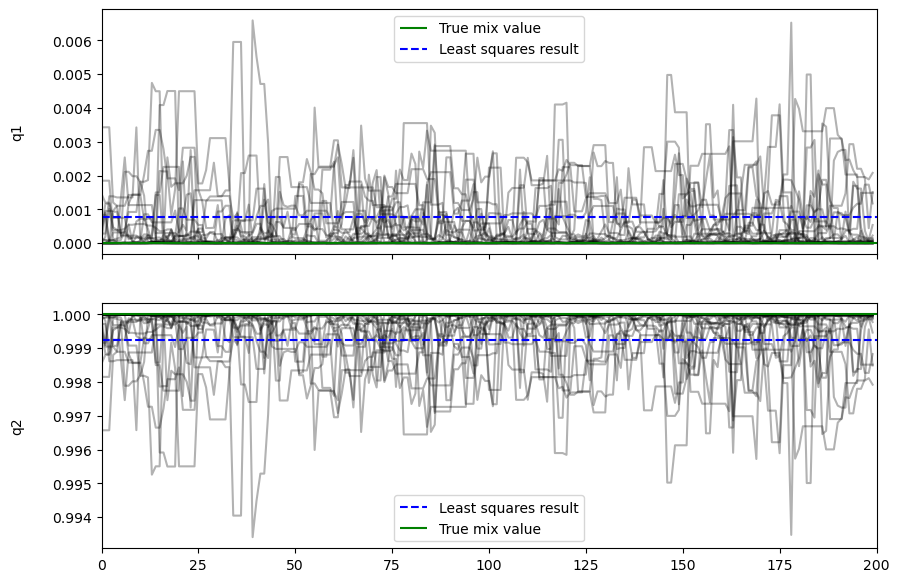

In [166]:
q1=10.0**samples[:, :, 1]
q2=1.0-q1#samples[:, :, 2]
#q3= 1.0 - q1 - q2

modsiz0 = np.mean(q1)
modsiz1 = np.mean(q2)
#modsiz2 = np.mean(q3)

print(modsiz0)
print(modsiz1)
#print(modsiz2)

line1 = 0.0
line2 = 1.0


fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
labels = ["q1", "q2", "q3"]
ax = axes[0]
ax.plot(q1, "k", alpha=0.3)
ax.set_xlim(0, len(q1))
ax.set_ylabel(labels[0])
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.hlines(line1, 0, len(q1), color='g', label='True mix value')
ax.hlines(lsmix, 0, len(q1), color='b', ls='--', label='Least squares result')
ax.legend()

ax = axes[1]
ax.plot(q2, "k", alpha=0.3)
ax.set_xlim(0, len(q2))
ax.set_ylabel(labels[1])
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.hlines(1.0-lsmix, 0, len(q1), color='b', ls='--', label='Least squares result')
ax.hlines(line2, 0, len(q2), color='g', label='True mix value')
ax.legend()

#ax = axes[2]
#ax.plot(q3, "k", alpha=0.3)
#ax.set_xlim(0, len(q3))
#ax.set_ylabel(labels[2])
#ax.yaxis.set_label_coords(-0.1, 0.5)
#ax.hlines(line3, 0, len(q3))

0.011093862404917281 -5.35553940085539
0.01103560981082171 -3.1131228597847187


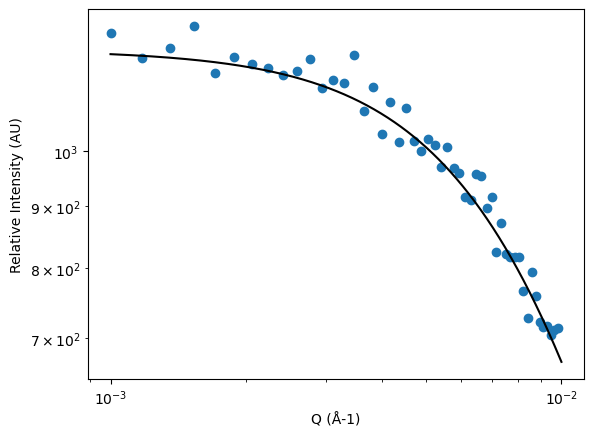

In [167]:
# Single line fit using mean of parameters
samples = sampler.get_chain()

kappas = samples[:, :, 0]
q1=samples[:, :, 1]
q2=1.0-q1#samples[:, :, 2]
#q3= 1.0 - q1 - q2

kappa_fit = np.mean(kappas)
q1_fit = np.mean(q1)
q2_fit = np.mean(q2)

theta_fit = kappa_fit, q1_fit#, q2_fit


y_fit = pmf(x_fit, theta_fit)
y_check = pmf(x_hist, theta_fit)
ysum = np.sum(y_check)
scale = pt_sum / ysum
y_fit = y_fit * scale

fig, ax = plt.subplots()
sct=plt.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
plt.plot(x_fit, y_fit, "k", label="Fit")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
print(kappa_fit, q1_fit)
print(lskappa, lsq1)

In [168]:
# Are these points really so far off?!

p0 = np.array([lskappa, lsq1])
p1 = np.array([kappa_fit, q1_fit])

llp0 = log_likelihood(p0)
llp1 = log_likelihood(p1)

print(llp0)
print(llp1)


236283.9209863216
236283.77008956484


Acceptance fraction 0.6659375000000001 (should be at high end of range 0.0--1.0)
kappa estimate       : 0.011093862404917281  (true value = 0.011111111111111112 )
kappa std.dev.       : 0.00019567177496437727


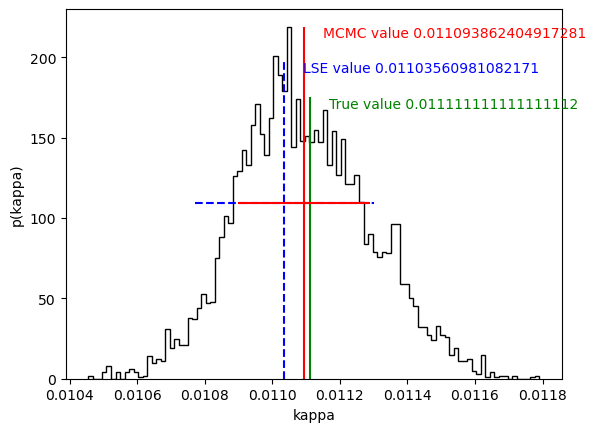

In [169]:
samples=sampler.get_chain(flat=True)

kappa_mean = np.mean(samples[:,0])
kappa_stddev = np.std(samples[:,0])

barmin = kappa_mean - kappa_stddev
barmax = kappa_mean + kappa_stddev



truetxt = "True value " + str(true_kappa)
lstxt   = "LSE value " + str(lskappa)
fittxt = "MCMC value " + str(kappa_mean)

hst=plt.hist(samples[:,0], 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("kappa")
plt.ylabel("p(kappa)")
plt.vlines(true_kappa, 0, ytop*0.8, color='g')
plt.vlines(lskappa, 0, ytop*0.9, ls='--', color='b')
plt.hlines(y=ytop*0.5, xmin=lskappa-lskappae, xmax=lskappa+lskappae, ls='--', color='b')
plt.vlines(kappa_mean, 0, ytop, color="red")
plt.hlines(y=ytop*0.5, xmin=barmin, xmax=barmax, color="red")
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(true_kappa*1.005, ytop*0.77, truetxt, color="g")
plt.text(lskappa*1.005, ytop*0.87, lstxt, color="b")
plt.text(kappa_mean*1.005, ytop*0.97, fittxt, color="red")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be at high end of range 0.0--1.0)")

print("kappa estimate       :", kappa_mean, " (true value =", true_kappa,")")
print("kappa std.dev.       :", kappa_stddev)

### Pure Porod Check

This section should poorly determine the linewidth with no signal, and put the signal weight to zero with the background weight at 1.

0.9989405379388056


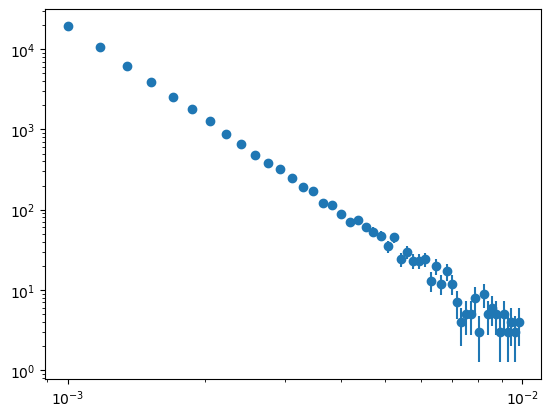

In [170]:
study_data = porod_events

event_xmin = np.amin(study_data)
event_xmax = np.amax(study_data)

slic=(event_xmax-event_xmin)/(nbins+1)

hbins = np.arange(fix_xmin, fix_xmax, slic)


hst = np.histogram(study_data, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)

y_line = porodobj.pdf(x_hist, xmin=0.001, alpha=porod_alpha)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
y_int = porodobj.cdf(x=np.amax(x_hist), xmin=0.001, alpha=porod_alpha)
print(y_int)

yscale = y_hist[0] / y_line[0]

y_line = y_line * yscale


plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o')
#plt.plot(x_hist, y_line)
plt.yscale('log')
plt.xscale('log')

[[Model]]
    Model(teubner_mix)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 940
    # data points      = 51
    # variables        = 3
    chi-square         = 130.069333
    reduced chi-square = 2.70977778
    Akaike info crit   = 53.7483424
    Bayesian info crit = 59.5438193
    R-squared          = 0.99999974
[[Variables]]
    aa:     6.80589119 +/- 0.05284030 (0.78%) (init = 50)
    kappa:  0.00100000 +/- 0.01818550 (1818.55%) (init = 0.05)
    q1:    -0.00814246 +/- 0.01007720 (123.76%) (init = -0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(kappa, q1) = -0.9830
    C(aa, q1)    = -0.3116
    C(aa, kappa) = +0.2992
0.9814259614042695


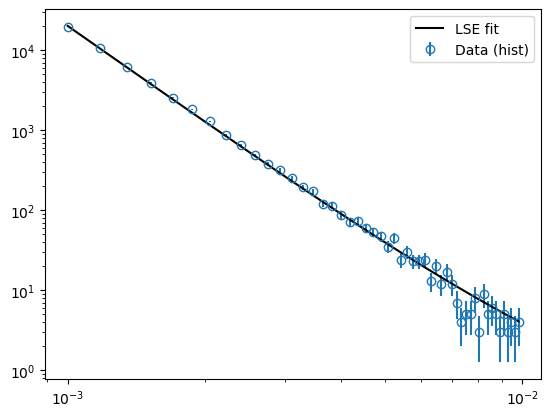

In [171]:


# Check with a LSE model

from lmfit import Model


def teubner_mix(x, aa, kappa, q1):
    theta = kappa, q1#, q2
    return aa * pmf(x, theta)

tmm = Model(teubner_mix)

params = tmm.make_params(
    aa=dict(value=50.0, min=0.0),\
    kappa=dict(value=0.05, min=0.001, max=0.1),\
    q1=dict(value=-0.3, min=-9.0, max=0.0),\
#    q2=dict(value=0.4, min=0.0, max=1.0)\
)


result = tmm.fit(y_hist, params, x=x_hist, weights = 1.0/e_hist)


print(result.fit_report())

fig, ax = plt.subplots()
ax.errorbar(x_hist, y_hist, e_hist, fmt='o', mfc='none', label="Data (hist)")
#ax.plot(spec[0], result.init_fit, '--', color='black', label="LSE initial")
ax.plot(x_hist, result.best_fit, color='black', label="LSE fit")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

lsq1 = result.best_values['q1']
#lsq2 = result.best_values['q2']
lskappa = result.best_values['kappa']

lsmix = 10.0**lsq1
print(lsmix)

0.5 -0.008142457924810387
334486.7943890804
xmin: 0.001
xmax: 0.009809304065295368
Signal: [159.15494309 133.55209235 112.52031133  95.40261093  81.48935002
  70.14476808  60.84220581  53.16115652  46.77151516  41.41578703
  36.89319573  33.04671261  29.75290581  26.91415575  24.45273867
  22.30634168  20.42465893  18.76679944  17.29930337  15.99461545
  14.82990292  13.78613455  12.84735845  12.00013211  11.23306991
  10.53648161   9.90208182   9.32275526   8.79236599   8.30560157
   7.85784516   7.4450699    7.06375149   6.7107953    6.38347547
   6.07938379   5.79638656   5.53258811   5.28629982   5.05601374
   4.84037997   4.63818731   4.44834658   4.26987624   4.10188991
   3.94358558   3.79423618   3.65318137   3.51982033   3.3936055
   3.27403701]
Background: [3.00000000e+03 1.56753451e+03 8.96884181e+02 5.49532381e+02
 3.55209229e+02 2.39679200e+02 1.67527348e+02 1.20595469e+02
 8.90064982e+01 6.71159419e+01 5.15601417e+01 4.02611672e+01
 3.18945779e+01 2.55927178e+01 2.0773216

array([2.96098193e+03, 1.55144727e+03, 8.90760822e+02, 5.48038466e+02,
       3.55935132e+02, 2.41462626e+02, 1.69781996e+02, 1.23017523e+02,
       9.14371505e+01, 6.94733771e+01, 5.38043868e+01, 4.23752818e+01,
       3.38743102e+01, 2.74406987e+01, 2.24956552e+01, 1.86414382e+01,
       1.55993390e+01, 1.31705901e+01, 1.12111554e+01, 9.61513031e+00,
       8.30360396e+00, 7.21705533e+00, 6.31008003e+00, 5.54767932e+00,
       4.90261317e+00, 4.35348866e+00, 3.88336331e+00, 3.47871353e+00,
       3.12866510e+00, 2.82441348e+00, 2.55878349e+00, 2.32589181e+00,
       2.12088646e+00, 1.93974401e+00, 1.77911078e+00, 1.63617758e+00,
       1.50858026e+00, 1.39432038e+00, 1.29170146e+00, 1.19927753e+00,
       1.11581138e+00, 1.04024050e+00, 9.71649218e-01, 9.09245729e-01,
       8.52343109e-01, 8.00343584e-01, 7.52725403e-01, 7.09031865e-01,
       6.68862103e-01, 6.31863329e-01, 5.97724269e-01])

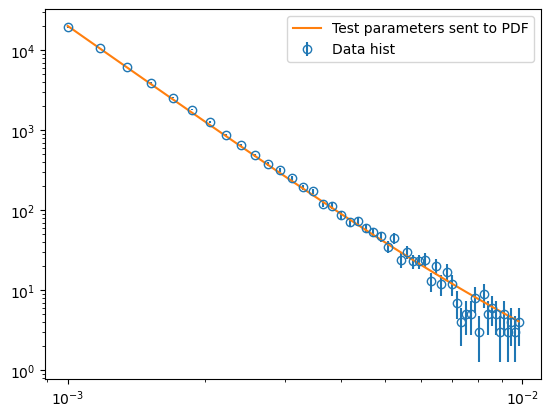

In [172]:



# Run a check with the correct parameters to see that we recover EXACTLY
# a perfect fit of the data

qsum = nsig + nbgp #+ nbgt

#qt = nbgt / qsum
qp = nbgp / qsum


#  LSE results
#     aa:     17.4619985 +/- 0.39272742 (2.25%) (init = 100)
#    kappa:  0.01155678 +/- 4.2164e-04 (3.65%) (init = 0.05)
#    bb:     0.50690746 +/- 0.05910729 (11.66%) (init = 300)
#    cc:     0.39551595 +/- 0.04095460 (10.35%) (init = 300)

#aa:     17.2444786 +/- 0.47556588 (2.76%) (init = 100)
#    kappa:  0.01146933 +/- 5.1693e-04 (4.51%) (init = 0.05)
#    bb:     0.50669511 +/- 0.07263683 (14.34%) (init = 300)
#    cc:     0.40889283 +/- 0.05022875 (12.28%) (init = 300)


#print(qt, lsq1)
print(qp, lsq1)

p0 = np.array([lskappa, lsq1])

print(log_likelihood(p0))


hst = np.histogram(study_data, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)


y_line = pmf(x_hist, p0)#porodobj.pdf(x_hist, xmin=0.001, alpha=4.0-1)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
#y_int = porod_integral(x_hist[0], np.amax(x_hist), alpha=4.0)

y_rescale = np.sum(y_hist) / np.sum(y_line)

y_line = y_line * y_rescale

plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o', mfc='None', label='Data hist')
plt.plot(x_hist, y_line, label="Test parameters sent to PDF")
plt.yscale('log')
plt.xscale('log')
plt.legend()

pmf(x_hist, p0, verbose=True)


Burn in:


100%|█████████████████████████████████████████| 200/200 [00:10<00:00, 19.28it/s]


Sampling:


100%|█████████████████████████████████████████| 200/200 [00:10<00:00, 19.32it/s]


[ 0.02908156 -0.00026367]


Text(0.5, 0, 'Q (Å-1)')

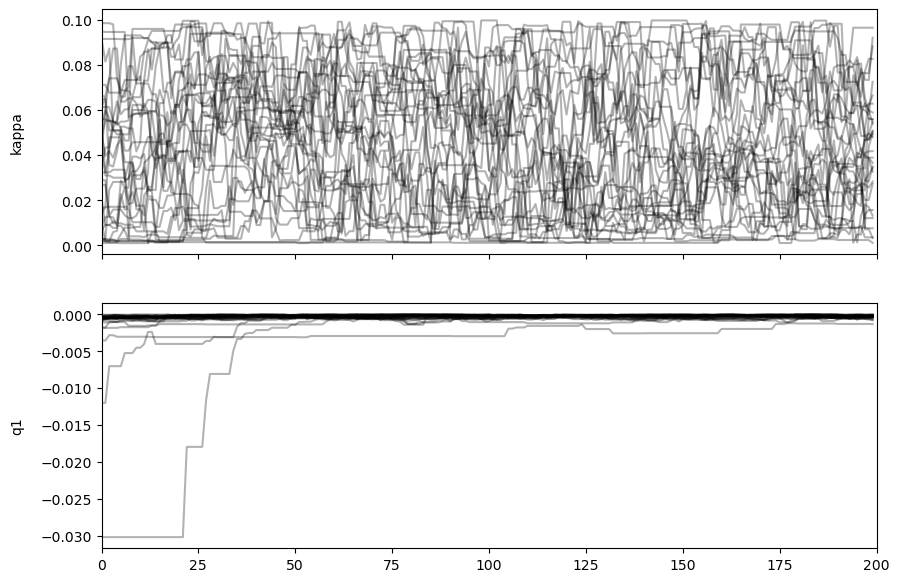

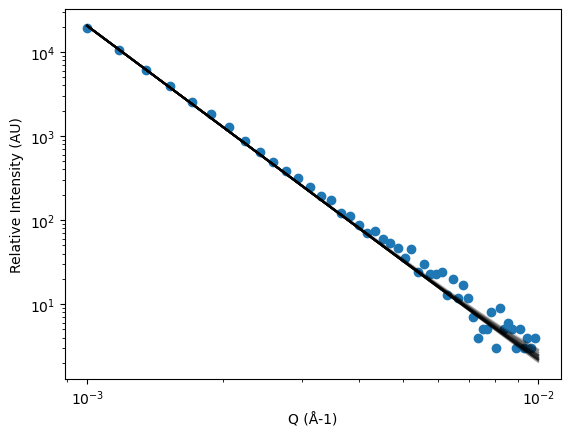

In [173]:
ndim, nwalkers = 2, 32



p0 = np.array([true_kappa, true_mix])
p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location
print("Burn in:")
state = sampler.run_mcmc(p0, 200, progress=True)

# Run the production chain.
sampler.reset()
print("Sampling:")
sampler.run_mcmc(state, 200, progress=True);





# Plot the theta curves during sampling 
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa", "q1", "q2"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


# Population based fit of the data

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(y_hist)

xfit_min = np.amin(study_data)
xfit_max = np.amax(study_data)

x_fit = np.linspace(xfit_min, xfit_max, 1000)

fig, ax = plt.subplots()


for ind in inds:
    sample = flat_samples[ind]
    y_fit = pmf(x_fit, sample)
    #pt_sum = np.sum(y_fit)
    y_check = pmf(x_hist, sample)
    ysum = np.sum(y_check)
    scale = pt_sum / ysum
    y_fit = y_fit * scale
    if ind == inds[0]:
        print(sample)

    ax.plot(x_fit, y_fit, color='black', alpha = 0.2)# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
ax.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
#cbar = fig.colorbar(sct)
#cbar.ax.set_ylabel('Point Signal Weight')




### 50:50 Check

This section should nail both!

0.998945100864058


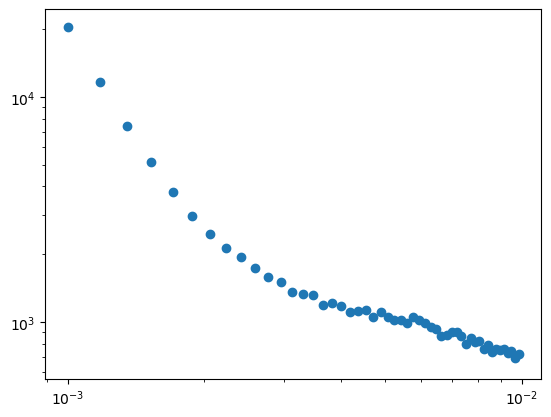

In [2]:
study_data = np.concatenate((porod_events, curv.data))
np.random.shuffle(study_data)

event_xmin = np.amin(study_data)
event_xmax = np.amax(study_data)

slic=(event_xmax-event_xmin)/(nbins+1)

hbins = np.arange(fix_xmin, fix_xmax, slic)


hst = np.histogram(study_data, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)

y_line = porodobj.pdf(x_hist, xmin=0.001, alpha=porod_alpha)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
y_int = porodobj.cdf(x=np.amax(x_hist), xmin=0.001, alpha=porod_alpha)
print(y_int)

yscale = y_hist[0] / y_line[0]

y_line = y_line * yscale


plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o')
#plt.plot(x_hist, y_line)
plt.yscale('log')
plt.xscale('log')

[[Model]]
    Model(teubner_mix)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 51
    # variables        = 3
    chi-square         = 109.938423
    reduced chi-square = 2.29038382
    Akaike info crit   = 45.1728341
    Bayesian info crit = 50.9683110
    R-squared          = 0.99999979
[[Variables]]
    aa:     15.5023581 +/- 0.07519944 (0.49%) (init = 50)
    kappa:  0.00996460 +/- 2.8332e-04 (2.84%) (init = 0.05)
    q1:    -0.37102541 +/- 0.00328690 (0.89%) (init = -0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(kappa, q1) = +0.3986
    C(aa, q1)    = -0.1598
0.4255735128123834


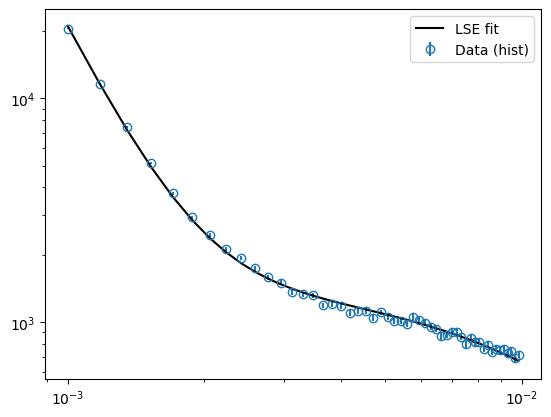

In [3]:


# Check with a LSE model

from lmfit import Model


def teubner_mix(x, aa, kappa, q1):
    theta = kappa, q1#, q2
    return aa * pmf(x, theta)

tmm = Model(teubner_mix)

params = tmm.make_params(
    aa=dict(value=50.0, min=0.0),\
    kappa=dict(value=0.05, min=0.001, max=0.1),\
    q1=dict(value=-0.3, min=-9.0, max=0.0),\
#    q2=dict(value=0.4, min=0.0, max=1.0)\
)


result = tmm.fit(y_hist, params, x=x_hist, weights = 1.0/e_hist)


print(result.fit_report())

fig, ax = plt.subplots()
ax.errorbar(x_hist, y_hist, e_hist, fmt='o', mfc='none', label="Data (hist)")
#ax.plot(spec[0], result.init_fit, '--', color='black', label="LSE initial")
ax.plot(x_hist, result.best_fit, color='black', label="LSE fit")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

lsq1 = result.best_values['q1']
lsq1e = result.result.uvars["q1"].std_dev
#lsq2 = result.best_values['q2']
lskappa = result.best_values['kappa']
lskappae = result.result.uvars["kappa"].std_dev

lsmix = 10.0**lsq1
print(lsmix)

0.5 -0.371025409842213
532089.54370729
xmin: 0.001
xmax: 0.009823426976742267
Signal: [31.62556443 31.50491472 31.36585185 31.2088741  31.03453592 30.84344322
 30.63624829 30.41364448 30.17636077 29.92515618 29.66081422 29.38413735
 29.09594159 28.79705127 28.48829404 28.17049612 27.84447781 27.51104948
 27.1710077  26.82513194 26.47418147 26.11889277 25.75997726 25.39811933
 25.03397485 24.66816988 24.3012998  23.93392866 23.56658886 23.19978099
 22.833974   22.46960551 22.10708228 21.74678086 21.38904838 21.03420344
 20.68253704 20.33431371 19.98977253 19.64912833 19.31257284 18.98027587
 18.65238652 18.32903436 18.01033059 17.69636919 17.38722806 17.08297009
 16.78364426 16.48928659 16.19992118]
Background: [3.00000000e+03 1.56602966e+03 8.95387150e+02 5.48315508e+02
 3.54269116e+02 2.38960699e+02 1.66976416e+02 1.20169346e+02
 8.86733914e+01 6.68526473e+01 5.13497557e+01 4.00913087e+01
 3.17561000e+01 2.54787946e+01 2.06787008e+01 1.69576169e+01
 1.40371327e+01 1.17191581e+01 9.860

array([1362.21543194,  750.99017932,  464.91108998,  316.63294116,
        233.50086533,  183.86839293,  152.65015105,  132.11698083,
        118.06763731,  108.10311594,  100.79518969,   95.26267451,
         90.9448773 ,   87.47533892,   84.6088735 ,   82.17803627,
         80.0664008 ,   78.19173223,   76.49514598,   74.93397639,
         73.47699625,   72.10115656,   70.78932761,   69.52871094,
         68.30970806,   67.12510437,   65.96947408,   64.83874146,
         63.72985458,   62.64054031,   61.56911924,   60.51436457,
         59.4753942 ,   58.45158752,   57.44252116,   56.44791916,
         55.46761421,   54.50151751,   53.54959535,   52.61185092,
         51.68831023,   50.77901128,   49.88399581,   49.00330308,
         48.13696524,   47.28500398,   46.44742825,   45.62423271,
         44.8153968 ,   44.02088439,   43.24064371])

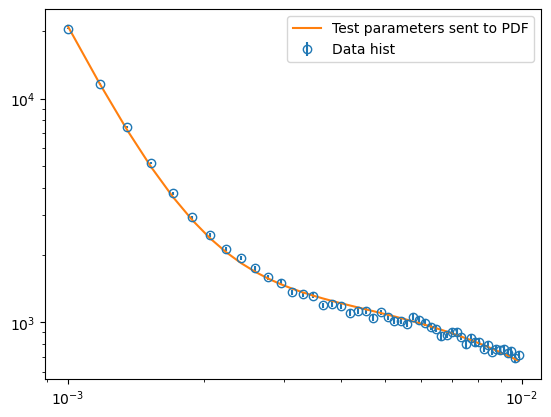

In [4]:



# Run a check with the correct parameters to see that we recover EXACTLY
# a perfect fit of the data

qsum = nsig + nbgp #+ nbgt

#qt = nbgt / qsum
qp = nbgp / qsum


#  LSE results
#     aa:     17.4619985 +/- 0.39272742 (2.25%) (init = 100)
#    kappa:  0.01155678 +/- 4.2164e-04 (3.65%) (init = 0.05)
#    bb:     0.50690746 +/- 0.05910729 (11.66%) (init = 300)
#    cc:     0.39551595 +/- 0.04095460 (10.35%) (init = 300)

#aa:     17.2444786 +/- 0.47556588 (2.76%) (init = 100)
#    kappa:  0.01146933 +/- 5.1693e-04 (4.51%) (init = 0.05)
#    bb:     0.50669511 +/- 0.07263683 (14.34%) (init = 300)
#    cc:     0.40889283 +/- 0.05022875 (12.28%) (init = 300)


#print(qt, lsq1)
print(qp, lsq1)

p0 = np.array([lskappa, lsq1])

print(log_likelihood(p0))


hst = np.histogram(study_data, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)


y_line = pmf(x_hist, p0)#porodobj.pdf(x_hist, xmin=0.001, alpha=4.0-1)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
#y_int = porod_integral(x_hist[0], np.amax(x_hist), alpha=4.0)

y_rescale = np.sum(y_hist) / np.sum(y_line)

y_line = y_line * y_rescale

plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o', mfc='None', label='Data hist')
plt.plot(x_hist, y_line, label="Test parameters sent to PDF")
plt.yscale('log')
plt.xscale('log')
plt.legend()

pmf(x_hist, p0, verbose=True)


Burn in:


100%|█████████████████████████████████████████| 200/200 [00:54<00:00,  3.69it/s]


Sampling:


100%|█████████████████████████████████████████| 200/200 [00:54<00:00,  3.67it/s]

[ 0.01143527 -0.29860497]


Text(0.5, 0, 'Q (Å-1)')

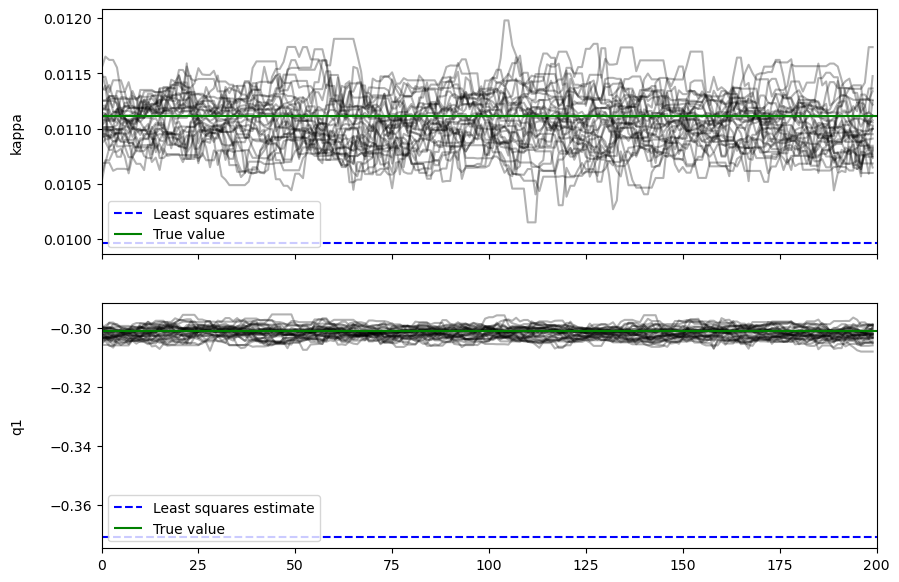

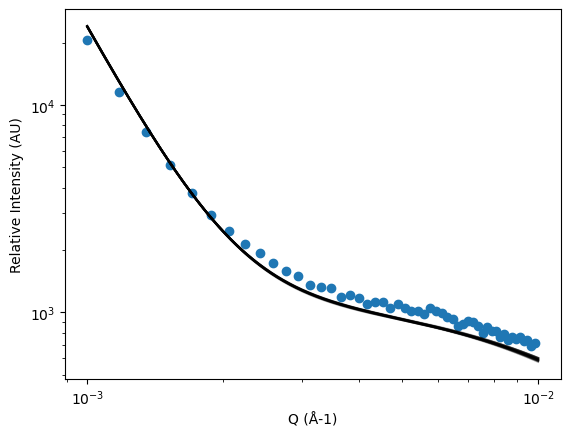

In [5]:
ndim, nwalkers = 2, 32



p0 = np.array([true_kappa, true_mix])
p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

# Run a burn-in chain and save the final location
print("Burn in:")
state = sampler.run_mcmc(p0, 200, progress=True)

# Run the production chain.
sampler.reset()
print("Sampling:")
sampler.run_mcmc(state, 200, progress=True);



# Plot the theta curves during sampling 
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["kappa", "q1", "q2"]
lsvals=np.array([lskappa, np.log10(lsmix)])
truevals=np.array([true_kappa, np.log10(porod_events.size / (porod_events.size + curv.data.size))])
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.hlines(lsvals[i], 0, samples[:,:,i].size, color='b', ls='--', label='Least squares estimate')
    ax.hlines(truevals[i], 0, samples[:,:,i].size, color='g', ls='-', label='True value')
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.legend()




# Population based fit of the data

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(y_hist)

xfit_min = np.amin(study_data)
xfit_max = np.amax(study_data)

x_fit = np.linspace(xfit_min, xfit_max, 1000)

fig, ax = plt.subplots()


for ind in inds:
    sample = flat_samples[ind]
    y_fit = pmf(x_fit, sample)
    #pt_sum = np.sum(y_fit)
    y_check = pmf(x_hist, sample)
    ysum = np.sum(y_check)
    scale = pt_sum / ysum
    y_fit = y_fit * scale
    if ind == inds[0]:
        print(sample)

    ax.plot(x_fit, y_fit, color='black', alpha = 0.2)# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

#plt.errorbar(xvals, yvals, color=get_color(xvals, flat_samples[inds[0]]), yerr=np.sqrt(yvals), fmt=".k", markersize=10, capsize=3)
ax.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Q (Å-1)')
#cbar = fig.colorbar(sct)
#cbar.ax.set_ylabel('Point Signal Weight')




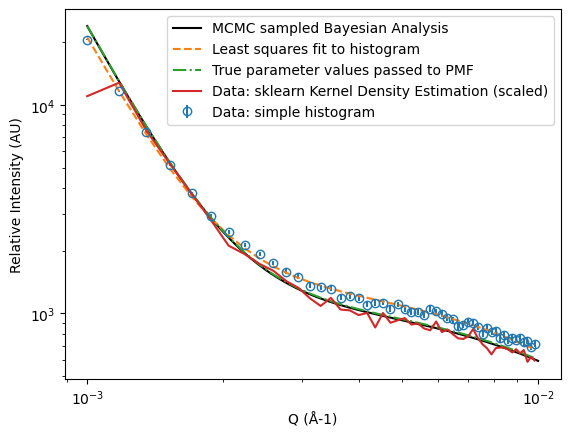

In [55]:
# Single line fit using mean of parameters
samples = sampler.get_chain()

kappas = samples[:, :, 0]
q1=samples[:, :, 1]

kappa_fit = np.mean(kappas)
mixes = 10.0**q1
meanmixes = np.mean(mixes)
logmeanmixes = np.log10(meanmixes)

theta_fit = kappa_fit, logmeanmixes#, q2_fit


y_fit = pmf(x_fit, theta_fit)
y_check = pmf(x_hist, theta_fit)
ysum = np.sum(y_check)
scale = pt_sum / ysum
y_fit = y_fit * scale

fig, ax = plt.subplots()
#sct=plt.scatter(x_hist, y_hist)#, c=get_weights(xvals, flat_samples[inds[0]]), cmap='viridis')
plt.plot(x_fit, y_fit, "k", label="MCMC sampled Bayesian Analysis")
#plt.legend(fontsize=14)
plt.ylabel("Relative Intensity (AU)")
ax.set_xlabel('Q (Å-1)')



# Least squares result
hst = np.histogram(study_data, bins=hbins)
x_hist = hst[1]
x_hist = x_hist[:-1]
y_hist = hst[0]
e_hist = np.sqrt(y_hist)

lstheta=lskappa, lsq1

y_line = pmf(x_hist, lstheta)#porodobj.pdf(x_hist, xmin=0.001, alpha=4.0-1)
    #porod_pmf(x_hist, alpha=4.0, xmin=x_hist[0])
#y_int = porod_integral(x_hist[0], np.amax(x_hist), alpha=4.0)

y_rescale = np.sum(y_hist) / np.sum(y_line)

y_line = y_line * y_rescale


# Histogram
plt.errorbar(x_hist, y_hist, yerr=e_hist, ls='None', marker='o', mfc='None', label='Data: simple histogram')
plt.plot(x_hist, y_line, ls='--',label="Least squares fit to histogram")
plt.yscale('log')
plt.xscale('log')


y_true = pmf(x_hist, truevals)
y_truescale = np.sum(y_hist) / np.sum(y_true)
y_true = y_true * y_truescale
plt.plot(x_hist, y_true, ls='-.', label="True parameter values passed to PMF")


# Kernel density estimation

from sklearn.neighbors import KernelDensity
reshaped = study_data.reshape(-1, 1) # sklearn needs this reshaped data for some reason
kde = KernelDensity(kernel="epanechnikov", bandwidth=0.00005).fit(reshaped)
x_hist_reshape = x_hist.reshape(-1, 1)
log_dens = kde.score_samples(x_hist_reshape)
kde_line = np.exp(log_dens)
kde_line = kde_line * 15.0
plt.plot(x_hist, kde_line, label="Data: sklearn Kernel Density Estimation (scaled)")


from scipy.stats import gaussian_kde
kdeobject = gaussian_kde(study_data, bw_method="silverman")
kdevals = kdeobject.evaluate(x_hist) * 15.0
#plt.plot(x_hist, kdevals, label="Data: Scipy Kernel Density Estimation")

plt.legend()


Firstly, note the well-known boundary bias on the first KDE data point, which we must ignore.  That is now work in progress.

**The histogram itself is systematically distorting the analysis process**.  KDE matches the PMF of the MCMC fits much better than the histogrammed points.  This is why the MCMC gives more accurate results whilst at the same time a "worse" fit to the data when only plotting a histogram of the data.

In [154]:
# Are these points really so far off?!

p0 = np.array([lskappa, lsq1])
p1 = np.array([kappa_fit, q1_fit])

llp0 = log_likelihood(p0)
llp1 = log_likelihood(p1)

print(llp0)
print(llp1)


532607.5884003568
533193.9986793087


Acceptance fraction 0.7151562499999999 (should be at high end of range 0.0--1.0)
kappa estimate       : 0.011244415987482976  (true value = 0.011111111111111112 )
kappa std.dev.       : 0.00023483027165392787


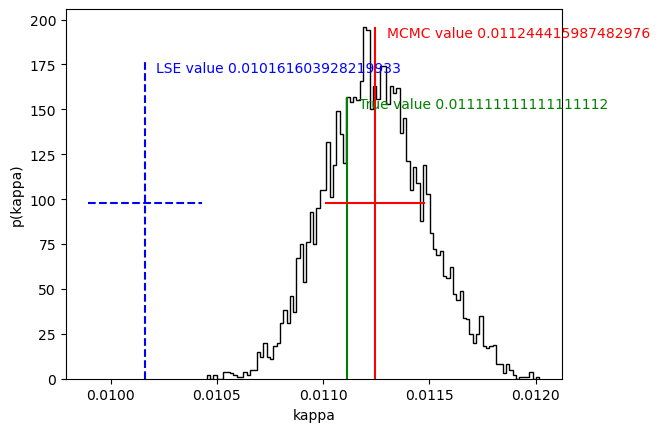

In [179]:
samples=sampler.get_chain(flat=True)

kappa_mean = np.mean(samples[:,0])
kappa_stddev = np.std(samples[:,0])

barmin = kappa_mean - kappa_stddev
barmax = kappa_mean + kappa_stddev



truetxt = "True value " + str(true_kappa)
lstxt   = "LSE value " + str(lskappa)
fittxt = "MCMC value " + str(kappa_mean)

hst=plt.hist(samples[:,0], 100, color='k', histtype="step")
ytop = np.amax(hst[0])
plt.xlabel("kappa")
plt.ylabel("p(kappa)")
plt.vlines(true_kappa, 0, ytop*0.8, color='g')
plt.vlines(lskappa, 0, ytop*0.9, ls='--', color='b')
plt.vlines(kappa_mean, 0, ytop, color="red")
plt.hlines(y=ytop*0.5, xmin=lskappa-lskappae, xmax=lskappa+lskappae, ls='--', color='b')
plt.hlines(y=ytop*0.5, xmin=barmin, xmax=barmax, color="red")
#plt.xlim([true_kappa*0.7, true_kappa*1.3])
plt.text(true_kappa*1.005, ytop*0.77, truetxt, color="g")
plt.text(lskappa*1.005, ytop*0.87, lstxt, color="b")
plt.text(kappa_mean*1.005, ytop*0.97, fittxt, color="red")

print("Acceptance fraction", np.mean(sampler.acceptance_fraction), "(should be at high end of range 0.0--1.0)")

print("kappa estimate       :", kappa_mean, " (true value =", true_kappa,")")
print("kappa std.dev.       :", kappa_stddev)

Even though the *fit looks worse* in the case of MCMC, it is producing a more accurate result ;)

I think the problem here is not the analysis, but the "fit" plotting where I scale the line by the integral of the data points.  I think I need to have a correction factor for the distribution weights.


### Three Component Model

## Gaussian Mixture Model Tests vs Standard Tools

Generated 1000 samples using parameters [2. 1.]
Generated 5000 samples using parameters [8.  1.5]


<ErrorbarContainer object of 3 artists>

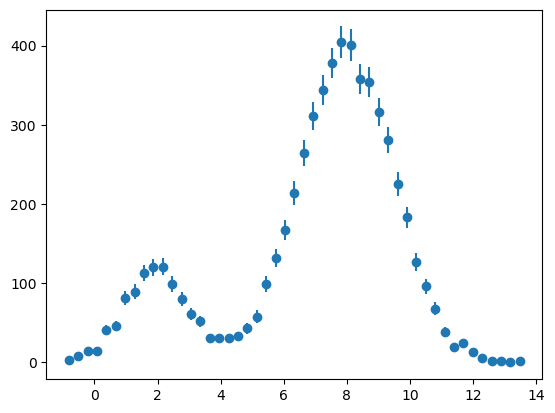

In [13]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import emcee

import emtk.curves.gaussian as gauss

import sklearn.mixture as skm


nsig = 1000
nbg = 5000
nbins = 50

xrange = np.array([-5.0, 15.0])

tru_mu = [2.0, 8.0]
tru_sig = [1.0, 1.5]

sig_curv = gauss.GaussianCurve()
bg_curv = gauss.GaussianCurve()

sig_curv.generate_test_samples([2.0, 1.0], xrange, nsig)

sig_events = sig_curv.data

bg_curv.generate_test_samples([8.0, 1.5], xrange, nbg)

bg_events = bg_curv.data

events = np.concatenate((sig_events, bg_events))


#sig_dist = sp.stats.halfcauchy
#signal = sig_dist.rvs(scale=kappa, loc=0.0, size=nsig)

#bg = np.random.uniform(xrange[0], xrange[1], nbg)


qmin = np.amin(events)
qmax = np.amax(events)
bins = np.linspace(qmin, qmax, nbins)
hst = np.histogram(events, bins=bins)
all_xhist = hst[1]
all_xhist = all_xhist[:-1]
dx = all_xhist[1] - all_xhist[0]
all_xhist = all_xhist + 0.5*dx
all_yhist = hst[0]
all_ehist = np.sqrt(all_yhist)

plt.errorbar(all_xhist, all_yhist, yerr=all_ehist, ls='None', marker='o')

### Scikit Learn

[1.96791766 7.99274304] [2.0, 8.0]
[1.0194876 1.4863798] [1.0, 1.5]


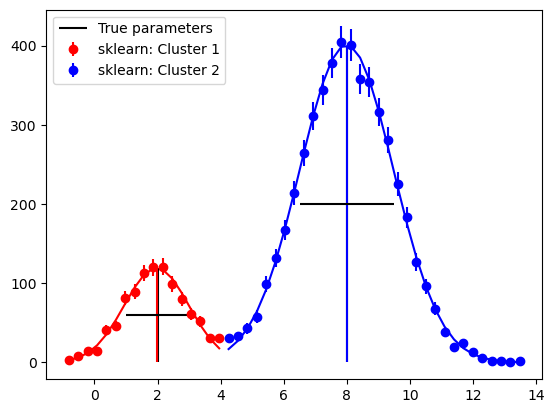

In [15]:

rshp = events.reshape(-1, 1) # need to do this apparently
gm = skm.GaussianMixture(n_components=2, covariance_type='full').fit(rshp)
mu = gm.means_.flatten()
sigma = np.sqrt(gm.covariances_.flatten())
print(mu, tru_mu)
print(sigma, tru_sig)

cats = gm.fit_predict(rshp)

ind1 = cats==0
ind2 = cats==1

cluster1 = events[ind1]
cluster2 = events[ind2]

dmeans = [np.mean(cluster1), np.mean(cluster2)]

# The labels might be swapped round, in which case the data and mu arrays might
# need swapping about to make sure they are the right order
if dmeans[0] > dmeans[1]:
    if mu[1] > mu[0]:
        tmp = mu[1]
        mu[1] = mu[0]
        mu[0] = tmp
        
        tmp = sigma[1]
        sigma[1] = sigma[0]
        sigma[0] = tmp
        
    if tru_mu[1] > tru_mu[0]:
        tmp = tru_mu[1]
        tru_mu[1] = tru_mu[0]
        tru_mu[0] = tmp
        tmp = tru_sig[1]
        tru_sig[1] = tru_sig[0]
        tru_sig[0] = tmp
        
else:
    if mu[0] > mu[1]:
        tmp = mu[1]
        mu[1] = mu[0]
        mu[0] = tmp
    if tru_mu[0] > tru_mu[1]:
        tmp = tru_mu[1]
        tru_mu[1] = tru_mu[0]
        tru_mu[0] = tmp
        tmp = tru_sig[1]
        tru_sig[1] = tru_sig[0]
        tru_sig[0] = tmp

cluster1_hst = np.histogram(cluster1, bins=bins)
xvals = cluster1_hst[1]
xvals = xvals[:-1]
dx = xvals[1] - xvals[0]
xvals = xvals + 0.5 * dx

yvals = cluster1_hst[0]
evals = np.sqrt(yvals)

keep = yvals > 0.0

xvals = xvals[keep]
yvals = yvals[keep]
evals = evals[keep]

liney1 = sp.stats.norm.pdf(x=xvals, loc = mu[0], scale = sigma[0])

liney1sum = np.sum(liney1)
data1sum = np.sum(yvals)
sf = data1sum / liney1sum
liney1 = liney1 * sf

fig, ax = plt.subplots()
plt.errorbar(xvals, yvals, yerr=evals, ls='None', marker='o', label='sklearn: Cluster 1', color='r')
plt.plot(xvals, liney1, color='r')
plt.vlines(x=tru_mu[0], ymin=0, ymax=np.amax(liney1), color='k', label='True parameters')
plt.vlines(x=mu[0], ymin=0, ymax=np.amax(liney1), color='r')
plt.hlines(y=0.5*np.amax(liney1), xmin=tru_mu[0]-tru_sig[0], xmax=tru_mu[0]+tru_sig[0], color='k')

           
cluster2_hst = np.histogram(cluster2, bins=bins)
xvals = cluster2_hst[1]
xvals = xvals[:-1]
dx = xvals[1] - xvals[0]
xvals = xvals + 0.5 * dx
yvals = cluster2_hst[0]
evals = np.sqrt(yvals)

keep = yvals > 0.0

xvals = xvals[keep]
yvals = yvals[keep]
evals = evals[keep]

liney2 = sp.stats.norm.pdf(x=xvals, loc = mu[1], scale = sigma[1])

liney2sum = np.sum(liney2)
data2sum = np.sum(yvals)
sf = data2sum / liney2sum
liney2 = liney2 * sf

plt.errorbar(xvals, yvals, yerr=evals, ls='None', marker='o', color='b', label='sklearn: Cluster 2')
plt.plot(xvals, liney2, color='b')
plt.vlines(x=tru_mu[1], ymin=0, ymax=np.amax(liney2), color='k')
plt.vlines(x=mu[1], ymin=0, ymax=np.amax(liney2), color='b')
plt.hlines(y=0.5*np.amax(liney2), xmin=tru_mu[1]-tru_sig[1], xmax=tru_mu[1]+tru_sig[1], color='k')
plt.legend()

### Least Squares (Histograms)

2.0
8.0
[[Model]]
    Model(double_gauss)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 49
    # variables        = 6
    chi-square         = 24.7804184
    reduced chi-square = 0.57628880
    Akaike info crit   = -21.4065603
    Bayesian info crit = -10.0556385
    R-squared          = 0.99996737
[[Variables]]
    aa:  294.934808 +/- 7.33308850 (2.49%) (init = 100)
    m1:  1.95944229 +/- 0.02742902 (1.40%) (init = 2)
    s1:  1.00954012 +/- 0.02284629 (2.26%) (init = 1)
    bb:  1484.81159 +/- 16.0536129 (1.08%) (init = 300)
    m2:  7.98425433 +/- 0.01663347 (0.21%) (init = 8)
    s2:  1.48457912 +/- 0.01262282 (0.85%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(m1, s1) = +0.2352
    C(s1, s2) = -0.1930
    C(m1, s2) = -0.1720
    C(aa, s1) = +0.1373
    C(s1, m2) = +0.1370
    C(m2, s2) = -0.1323
    C(m1, m2) = +0.1164
    C(aa, s2) = -0.1013


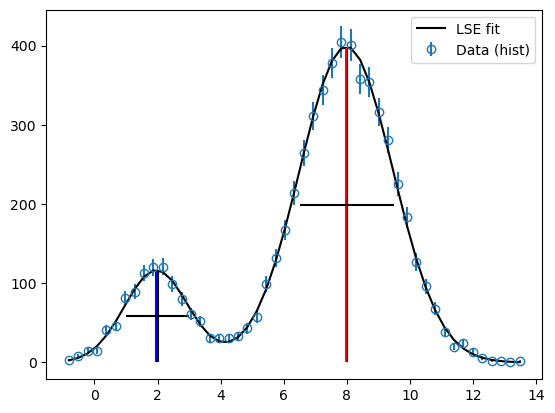

In [16]:
from lmfit import Model

def double_gauss(x, aa, m1, s1, bb, m2, s2):
    first = aa*sp.stats.norm.pdf(x, loc=m1, scale=s1)
    second = bb*sp.stats.norm.pdf(x, loc=m2, scale=s2)
    return first + second

gmodel = Model(double_gauss)

params = gmodel.make_params(\
    aa=dict(value=100.0, min=0.0),\
    m1=dict(value=2.0, min=0.0, max=10.0),\
    s1=dict(value=1.0, min=0.0, max=5.0),\
    bb=dict(value=300.0, min=0.0),\
    m2=dict(value=8.0, min=0.0),\
    s2=dict(value=2.0, min=0.0, max=5.0)\
           )

result = gmodel.fit(all_yhist, params, x=all_xhist, weights = 1.0/all_ehist)

lsm1 = result.params["m1"].value
lss1 = result.params["s1"].value
lsaa = result.params["aa"].value

lsm2 = result.params["m2"].value
lss2 = result.params["s2"].value
lsbb = result.params["bb"].value

if lsm1 > lsm2:
        tmp = lsm1
        lsm1 = lsm2
        lsm2 = tmp
        
        tmp = lss1
        lss1 = lss2
        lss2 = tmp
        
        tmp = lsbb
        lsbb = lsaa
        lsaa = tmp

if tru_mu[0] > tru_mu[1]:
    tmp = tru_mu[1]
    tru_mu[1] = tru_mu[0]
    tru_mu[0] = tmp
    
    tmp = tru_sig[1]
    tru_sig[1] = tru_sig[0]
    tru_sig[0] = tmp

print(tru_mu[0])
print(tru_mu[1])

print(result.fit_report())

t1 = lsaa*sp.stats.norm.pdf(all_xhist, loc=lsm1, scale=lss1)
t2 = lsbb*sp.stats.norm.pdf(all_xhist, loc=lsm2, scale=lss2)

fig, ax = plt.subplots()
ax.errorbar(all_xhist, all_yhist, all_ehist, fmt='o', mfc='none', label="Data (hist)")
#ax.plot(spec[0], result.init_fit, '--', color='black', label="LSE initial")
ax.plot(all_xhist, result.best_fit, color='black', label="LSE fit")

plt.vlines(x=tru_mu[0], ymin=0, ymax=np.amax(t1), color='k')
plt.vlines(x=lsm1, ymin=0, ymax=np.amax(t1), color='b')
plt.hlines(y=0.5*np.amax(t1), xmin=tru_mu[0]-tru_sig[0], xmax=tru_mu[0]+tru_sig[0], color='k')

plt.vlines(x=tru_mu[1], ymin=0, ymax=np.amax(t2), color='k')
plt.vlines(x=lsm2, ymin=0, ymax=np.amax(t2), color='r')
plt.hlines(y=0.5*np.amax(t2), xmin=tru_mu[1]-tru_sig[1], xmax=tru_mu[1]+tru_sig[1], color='k')

ax.legend()

### PyMC - Fails because of numpy version error "get info"

In [8]:
import arviz as az
import pymc as pm
import scipy as sp
import scipy.stats
import seaborn as sns
az.style.use("arviz-darkgrid")

ncomponents=2

with pm.Model(coords={"cluster": range(ncomponents)}) as model:
    mu = pm.Normal(
        "mu",
        mu=0,
        sigma=5,
        transform=pm.distributions.transforms.univariate_ordered,
        initval=[2, 7],
        dims="cluster",
    )
    sigma = pm.HalfNormal("sigma", sigma=1, dims="cluster")
    weights = pm.Dirichlet("w", np.ones(ncomponents), dims="cluster")
    pm.NormalMixture("x", w=weights, mu=mu, sigma=sigma, observed=events)
    



AttributeError: module 'numpy.__config__' has no attribute 'get_info'

In [306]:
# MAP model is "maximum a posteriori", i.e. find the peak in the
# posterior likelihood like you do for MLE.
map_estimate=pm.find_MAP(model=model)
map_estimate

{'mu_ordered__': array([2.04517777, 1.78583901]),
 'sigma_log__': array([0.04877838, 0.38533623]),
 'w_simplex__': array([-0.79223062]),
 'mu': array([2.04517777, 8.00975995]),
 'sigma': array([1.04998763, 1.47010853]),
 'w': array([0.17016459, 0.82983541])}

In [307]:
with model:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, w]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


Exception: Version mismatch: this is the 'cffi' package version 1.15.1, located in '/Users/phillipbentley/anaconda3/envs/ess/lib/python3.10/site-packages/cffi/api.py'.  When we import the top-level '_cffi_backend' extension module, we get version 1.16.0, located in '/Users/phillipbentley/anaconda3/envs/ess/lib/python3.10/site-packages/_cffi_backend.cpython-310-darwin.so'.  The two versions should be equal; check your installation.

### Kasakh Mixture_Models - Fails because of a legacy numpy issue from 2021 regarding numpy int alias

In [9]:
import Mixture_Models as kmm

my_model = kmm.GMM(data)

### STEP 2 - Initialize your model with some parameters    
init_params = my_model.init_params(num_components = 2)

### STEP 3 - Learn the parameters using some optimization routine
params_store = my_model.fit(init_params,"Newton-CG")

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### Emcee - Agrees with lS and SKLearn

In [17]:
study_data = events

def log_prior(theta):
    # The main role of this function is to set 
    # parameter bounds of the bayesian search space
    u1, s1, u2, s2, q = theta
        
    if 0.0 < q < 1.0 and\
        0.0 < u1 < 10.0 and \
        0.0 < s1 < 2.0 and \
        0.0 < u2 < 10.0 and \
        0.0 < s2 < 2.0:
        return 0.0
    
    return -np.inf


def pmf(xx, theta, verbose=False, components=False):
    
    u1, s1, u2, s2, q = theta
    
        
    x_min = np.amin(xx)
    x_max = np.amax(xx)
    
    w1 = q
    w2 = 1.0 - q
    
    t1 = w1 * sp.stats.norm.pdf(xx, loc=u1, scale=s1)
    t2 = w2 * sp.stats.norm.pdf(xx, loc=u2, scale=s2)
    
    if verbose:
        print("term 1:", t1)
        print("term 2:", t2)
    
    result = t1 + t2
    
    if components:
        return t1, t2, result
    
    return result


def log_likelihood(theta, testing=False):
    u1, s1, u2, s2, q = theta
        
    lp = log_prior(theta)
    
    if np.isinf(lp):
        return -np.inf
    
    w1 = q
    w2 = 1.0 - q
    
    signal =  sp.stats.norm.pdf(study_data, loc=u1, scale=s1)
    background = sp.stats.norm.pdf(study_data, loc=u2, scale=s2)
    
    # Add the terms in linear space
    
    like = w1 * signal + w2 * background
    
    # Switch to log space to compute the product
    
    llike = np.log(like)
    
    llsum = np.sum(llike)
        
    if testing:
        print(signal)
        print(background)
        print(llike)
            
    return lp + llsum

In [18]:
p0 = np.array([2.0, 1.0, 7.0, 1.0, 0.5])

log_likelihood(p0, testing=True)

[3.58521075e-01 7.24202369e-02 3.37446503e-01 ... 1.85795719e-05
 8.57832602e-11 9.91115617e-09]
[1.32467461e-07 2.77092592e-03 2.26994751e-05 ... 3.46010655e-01
 9.85344803e-02 2.61795236e-01]
[-1.71891464 -3.28086875 -1.7794282  ... -1.75437919 -3.01049592
 -2.03333976]


-18013.96496529957

In [21]:
    ndim, nwalkers = 5, 32
    #    aa=dict(value=0.25, min=0.0),\
    #    kk=dict(value=0.24, min=0.001, max=0.5),\
    #    bb=dict(value=4.5E-07, min=0.0),\
    #    cc=dict(value=1.7E-10, min=0.0),\
    #    bg=dict(value=1.0, min=0.0)\

    p0 = np.array([2.0, 1.0, 7.0, 1.0, 0.5])
    
    #check = log_likelihood(p0, test=True, title="")
    
    seed_p0 = np.copy(p0)
    p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

    # Set up the sampler.
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)

    print("Burn in")
    # Run a burn-in chain and save the final location.
    state = sampler.run_mcmc(p0, 400, progress=True)

    print("MCMC sampling")
    # Run the production chain.
    sampler.reset()
    sampler.run_mcmc(state, 300, progress=True);

Burn in


100%|███████████████████████████████████████████| 400/400 [00:04<00:00, 99.29it/s]


MCMC sampling


100%|███████████████████████████████████████████| 300/300 [00:03<00:00, 98.94it/s]


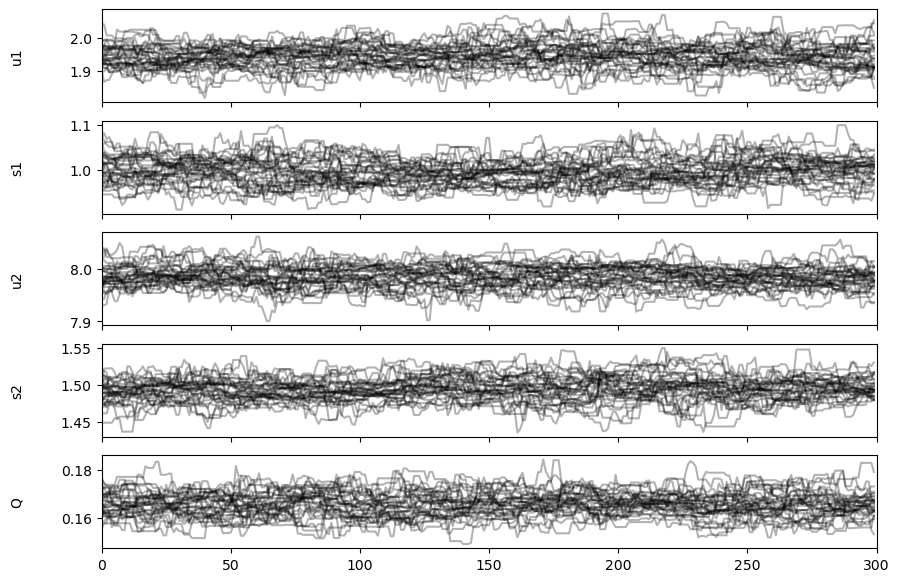

In [22]:
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["u1", "s1", "u2", "s2", "Q"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

Mu: 1.9459083989432724 7.985401768989802 (true: 2.0 8.0 )
Sig: 0.9971741195899904 1.4942670469900274 (true: 1.0 1.5 )
Mix: 0.16562569609298933 (true: 0.16666666666666666 )


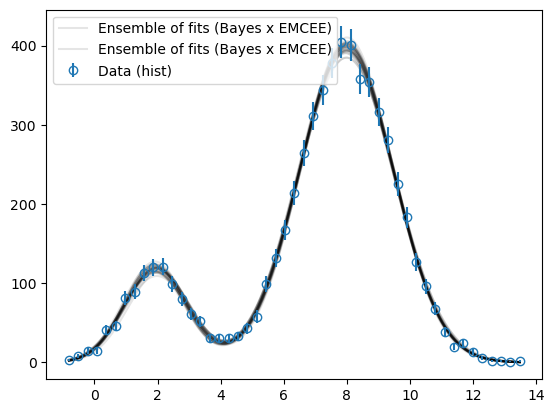

In [23]:
samples = sampler.get_chain()
#u1, s1, u2, s2, q = theta
u1samp=np.mean(samples[:, :, 0])
u1samp_err = np.std(samples[:, :, 0])
s1samp=np.mean(samples[:, :, 1])
s1samp_err = np.std(samples[:, :, 1])
u2samp=np.mean(samples[:, :, 2])
u2samp_err = np.std(samples[:, :, 2])
s2samp=np.mean(samples[:, :, 3])
s2samp_err = np.std(samples[:, :, 3])
qsamp=np.mean(samples[:, :, 4])
qsamp_err = np.std(samples[:, :, 4])

print("Mu:", u1samp, u2samp, "(true:", tru_mu[0], tru_mu[1], ")")
print("Sig:", s1samp, s2samp, "(true:", tru_sig[0], tru_sig[1], ")")

print("Mix:", qsamp, "(true:", nsig/(nsig+nbg), ")")

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

inds = np.random.randint(len(flat_samples), size=30)

pt_sum = np.sum(all_yhist)

xfit_min = np.min(all_xhist)
xfit_max = np.max(all_xhist)
x_fit = np.linspace(xfit_min, xfit_max, 1000)

fig, ax = plt.subplots()
for ind in inds:
    sample = flat_samples[ind]
    y_fit = pmf(x_fit, sample)
    y_check = pmf(all_xhist, sample)
    ysum = np.sum(y_check)
    scale = pt_sum / ysum
    y_fit = y_fit * scale
    if ind == inds[0]:
        plt.plot(x_fit, y_fit, color='black', alpha = 0.1, label="Ensemble of fits (Bayes x EMCEE)")
    else:
        plt.plot(x_fit, y_fit, color='black', alpha = 0.1)# np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)


ax.errorbar(all_xhist, all_yhist, all_ehist,fmt='o', mfc='none', label="Data (hist)")
plt.legend()

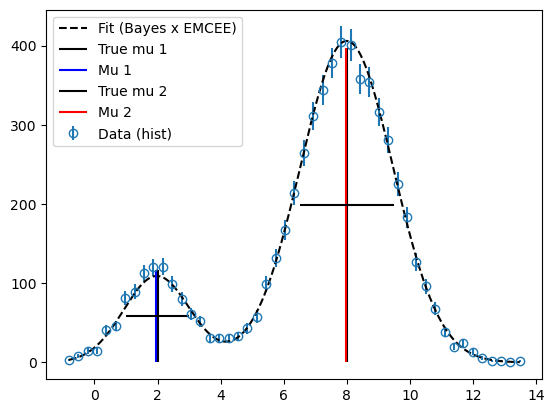

In [36]:

param_means = u1samp, s1samp, u2samp, s2samp, qsamp

yfit = pmf(x_fit, param_means)


fig, ax = plt.subplots()
ax.errorbar(all_xhist, all_yhist, all_ehist,fmt='o', mfc='none', label="Data (hist)")

plt.plot(x_fit, y_fit, color='black', ls='--', label="Fit (Bayes x EMCEE)")

plt.vlines(x=tru_mu[0], ymin=0, ymax=np.amax(t1), color='k', label='True mu 1')
plt.vlines(x=u1samp, ymin=0, ymax=np.amax(t1), color='b', label='Mu 1')
plt.hlines(y=0.5*np.amax(t1), xmin=tru_mu[0]-tru_sig[0], xmax=tru_mu[0]+tru_sig[0], color='k')

plt.vlines(x=tru_mu[1], ymin=0, ymax=np.amax(t2), color='k', label='True mu 2')
plt.vlines(x=u2samp, ymin=0, ymax=np.amax(t2), color='r', label='Mu 2')
plt.hlines(y=0.5*np.amax(t2), xmin=tru_mu[1]-tru_sig[1], xmax=tru_mu[1]+tru_sig[1], color='k')


plt.legend()